<a href="https://colab.research.google.com/github/SanePai/SSA/blob/main/Circulant_SSA_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from numpy import pi
import pandas as pd
import random
from numpy import linalg
from scipy import linalg as la
import matplotlib.pyplot as plt
import math
import scipy.signal as signal

Text(0, 0.5, '$F(t)$')

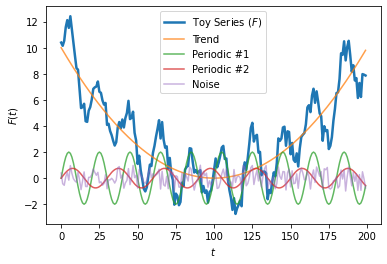

In [ ]:
#Generate a time series(https://www.kaggle.com/jdarcy/introducing-ssa-for-time-series-decomposition)
K = 200 # The number of time 'moments' in our toy series
t = np.arange(0,K)
trend = 0.001 * (t - 100)**2
p1, p2 = 20, 30
periodic1 = 2 * np.sin(2*pi*t/p1)
periodic2 = 0.75 * np.sin(2*pi*t/p2)

np.random.seed(123) # So we generate the same noisy time series every time.
noise = 2 * (np.random.rand(K) - 0.5)
F = trend + periodic1 + periodic2 + noise
ts = F
# Plot everything
plt.plot(t, F, lw=2.5)
plt.plot(t, trend, alpha=0.75)
plt.plot(t, periodic1, alpha=0.75)
plt.plot(t, periodic2, alpha=0.75)
plt.plot(t, noise, alpha=0.5)
plt.legend(["Toy Series ($F$)", "Trend", "Periodic #1", "Periodic #2", "Noise"])
plt.xlabel("$t$")
plt.ylabel("$F(t)$")

In [ ]:
#Window Length
L = 95
T = len(ts)
N = T-L+1

In [ ]:
#Trajectory Matrix
X = np.column_stack([ts[i:i+L] for i in range(N)])
X

array([[10.39293837, 10.14724643, 10.53832589, ...,  1.19387637,
         1.71800801,  2.34812867],
       [10.14724643, 10.53832589, 11.57050247, ...,  1.71800801,
         2.34812867,  2.47519172],
       [10.53832589, 11.57050247, 12.11440959, ...,  2.34812867,
         2.47519172,  1.4684962 ],
       ...,
       [-1.09468829, -0.60309942, -1.12240058, ...,  7.29680072,
         6.22234907,  7.97547484],
       [-0.60309942, -1.12240058, -0.94207735, ...,  6.22234907,
         7.97547484,  7.93341656],
       [-1.12240058, -0.94207735, -1.87056574, ...,  7.97547484,
         7.93341656,  7.8691161 ]])

In [ ]:
#Gamma
gamma = []

for m in range(L):
  sum = 0
  for t in range(1,T-m+1):
    sum += ts[t-1]*ts[t+m-1]
  gamma.append((1/(T-m))*sum)
gamma

[23.25757104965384,
 22.537452821876844,
 21.87227228193196,
 21.00761709671169,
 20.013686183767046,
 18.84425980714291,
 17.712135391889916,
 16.48936436797962,
 15.490973346353723,
 14.65698806524872,
 14.005164061155781,
 13.583921416212695,
 13.302492641425257,
 13.314388838289108,
 13.546436558917318,
 13.830107580594287,
 14.037615329086448,
 14.29831220553071,
 14.587721669870083,
 14.670001249899675,
 14.527812784018915,
 14.183110494645495,
 13.717366140264362,
 13.091535094402543,
 12.363389373104706,
 11.509051595150076,
 10.645469191032085,
 9.775346697823066,
 9.06708432903821,
 8.584432743044335,
 8.064111318200869,
 7.938038781381602,
 7.911491495769205,
 8.009623777984958,
 8.287534516905612,
 8.566510245494058,
 8.85789306574296,
 9.217070262230168,
 9.272231869949273,
 9.153970972762552,
 8.992865806016146,
 8.526251164159255,
 7.939237588521558,
 7.10503416515349,
 6.203340335719343,
 5.176396278683554,
 4.224654274647656,
 3.3574637157414875,
 2.6139470749010667,
 

In [ ]:
#Circulant Matrix
sc = []
Sc = []
for m in range(L):
    c = ((L-m)/L)*gamma[m] + (m/L)*gamma[L-m-1]
    sc.append(c)
for m in range(L):
    sc1 = sc[-m:] + sc[:-m]
    Sc.append(sc1)
Sc = np.array(Sc)
Sc.resize(L,L)
Sc

array([[23.25757105, 22.31502683, 21.42979655, ..., 21.20855868,
        22.09260083, 23.03378299],
       [23.03378299, 23.25757105, 22.31502683, ..., 20.1504737 ,
        21.20855868, 22.09260083],
       [22.09260083, 23.03378299, 23.25757105, ..., 18.98880112,
        20.1504737 , 21.20855868],
       ...,
       [20.36475955, 19.19377813, 17.87810694, ..., 23.25757105,
        22.31502683, 21.42979655],
       [21.42979655, 20.36475955, 19.19377813, ..., 23.03378299,
        23.25757105, 22.31502683],
       [22.31502683, 21.42979655, 20.36475955, ..., 22.09260083,
        23.03378299, 23.25757105]])

In [ ]:
lam, u = np.linalg.eig(Sc)
# lam = []
# u = []
wk = []
Xk = []
# for k in range(1,L+1):
#     t = 0
#     for m in range(L):
#         z = complex(0,2*3.14*m*(k-1)/L)
#         t += sc[m]*np.exp(z)
#     lam.append(t)
for k in range(1,L+1):
    wk.append(k-1/L)
    uk = np.matrix(u[:,k-1])
    Xk.append(np.outer(uk,uk.getH())@X)
# wk,Xk

In [ ]:
# lm1, u1 = la.eig(Sc)
# print(np.imag(lm1))
lam

array([9.96095649e+02+0.00000000e+00j, 3.03629289e+02+6.89431084e+00j,
       3.03629289e+02-6.89431084e+00j, 7.95973406e+01+1.18184412e+01j,
       7.95973406e+01-1.18184412e+01j, 7.76318036e+01+3.71298473e+00j,
       7.76318036e+01-3.71298473e+00j, 7.15064973e+01+6.27408244e+00j,
       7.15064973e+01-6.27408244e+00j, 3.45810332e+01+4.18967426e+00j,
       3.45810332e+01-4.18967426e+00j, 6.68444156e+00+6.49956490e-01j,
       6.68444156e+00-6.49956490e-01j, 4.23237930e+00+4.51035620e-01j,
       4.23237930e+00-4.51035620e-01j, 3.06951839e+00+3.71969458e-01j,
       3.06951839e+00-3.71969458e-01j, 2.35432204e+00+3.16745593e-01j,
       2.35432204e+00-3.16745593e-01j, 1.98526886e+00+3.15401519e-01j,
       1.98526886e+00-3.15401519e-01j, 1.82013241e+00+3.50165651e-01j,
       1.82013241e+00-3.50165651e-01j, 1.70070147e+00+3.94960835e-01j,
       1.70070147e+00-3.94960835e-01j, 1.35788334e+00+8.26267610e-01j,
       1.35788334e+00-8.26267610e-01j, 1.37116066e+00+7.63704313e-01j,
      

In [ ]:
#Groups by frequency
XB = []
lam1 = []
XB.append(Xk[0])
lam1.append(lam[0])
m = int(np.floor((L-1)/2))
for k in range(0,m,2):
    XB.append(Xk[k+1] + Xk[k+2])
    lam1.append(lam[k+1] + lam[k+2])
if L%2==0:
    XB.append(Xk[-1])
    lam1.append(lam[-1])

XB

[array([[3.67054396+0.j, 3.55122801+0.j, 3.42472472+0.j, ...,
         3.2758094 +0.j, 3.34675193+0.j, 3.41150044+0.j],
        [3.67054396+0.j, 3.55122801+0.j, 3.42472472+0.j, ...,
         3.2758094 +0.j, 3.34675193+0.j, 3.41150044+0.j],
        [3.67054396+0.j, 3.55122801+0.j, 3.42472472+0.j, ...,
         3.2758094 +0.j, 3.34675193+0.j, 3.41150044+0.j],
        ...,
        [3.67054396+0.j, 3.55122801+0.j, 3.42472472+0.j, ...,
         3.2758094 +0.j, 3.34675193+0.j, 3.41150044+0.j],
        [3.67054396+0.j, 3.55122801+0.j, 3.42472472+0.j, ...,
         3.2758094 +0.j, 3.34675193+0.j, 3.41150044+0.j],
        [3.67054396+0.j, 3.55122801+0.j, 3.42472472+0.j, ...,
         3.2758094 +0.j, 3.34675193+0.j, 3.41150044+0.j]]),
 array([[1.20619869+0.j, 1.17299077+0.j, 1.12083215+0.j, ...,
         0.75310746+0.j, 0.68872633+0.j, 0.6086624 +0.j],
        [1.41110094+0.j, 1.37328556+0.j, 1.316779  +0.j, ...,
         0.54715148+0.j, 0.47944851+0.j, 0.39643993+0.j],
        [1.6098328 +0.j, 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


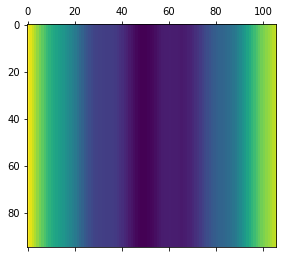

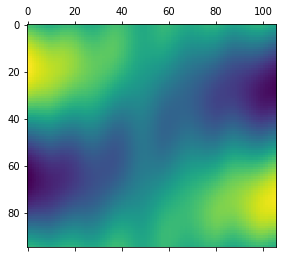

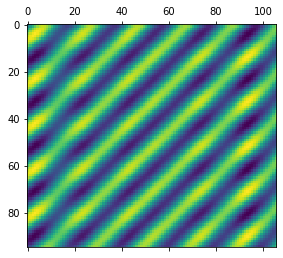

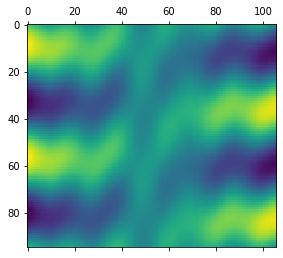

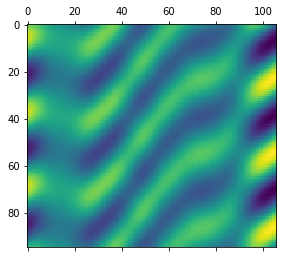

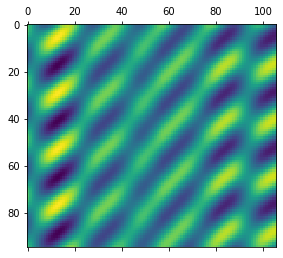

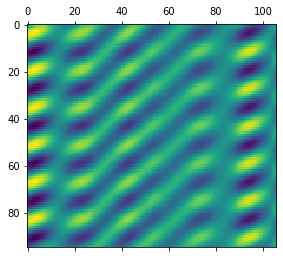

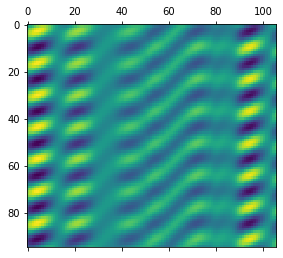

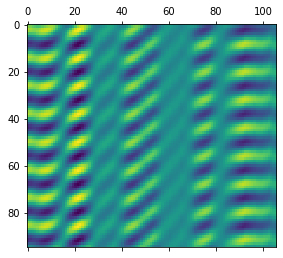

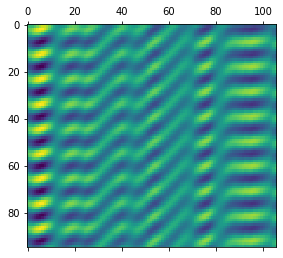

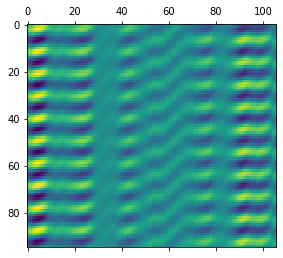

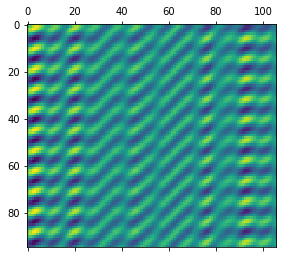

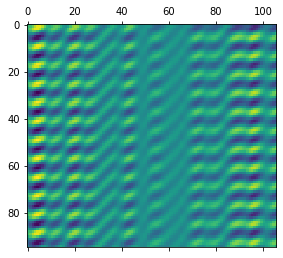

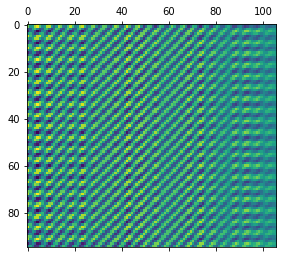

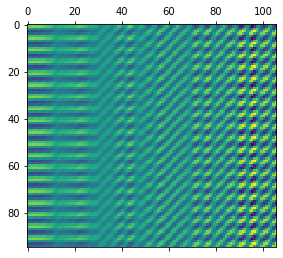

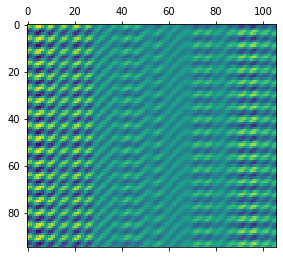

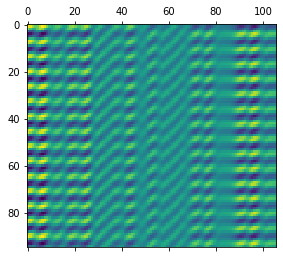

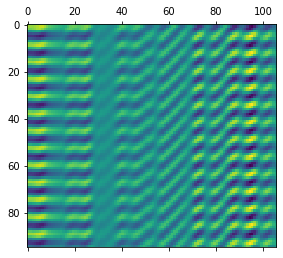

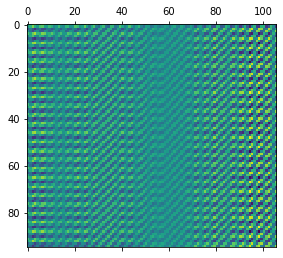

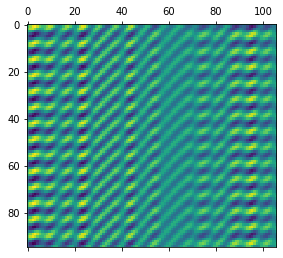

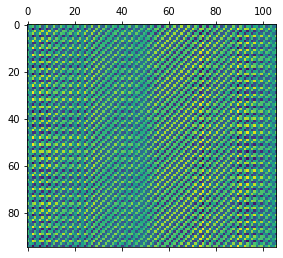

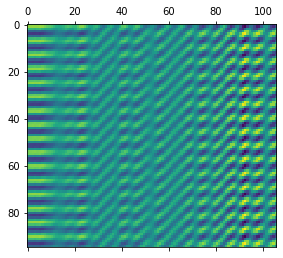

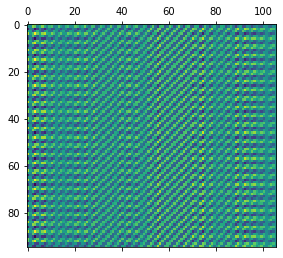

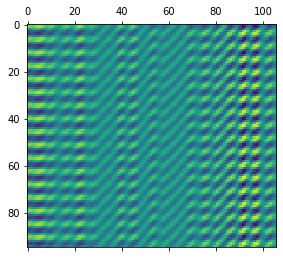

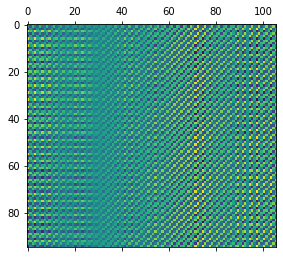

In [ ]:
XB_real = np.real(XB)
np.shape(XB_real)
for i in range(len(XB_real)):
    plt.matshow(XB_real[i])

In [ ]:
def X_to_TS(X):
    X_rev = np.fliplr(X)
    m,n = np.shape(X)
    x = np.array([X_rev.diagonal(i).mean() for i in range(-m+1, n)])
    return x[::-1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matp

<Figure size 2880x1440 with 0 Axes>

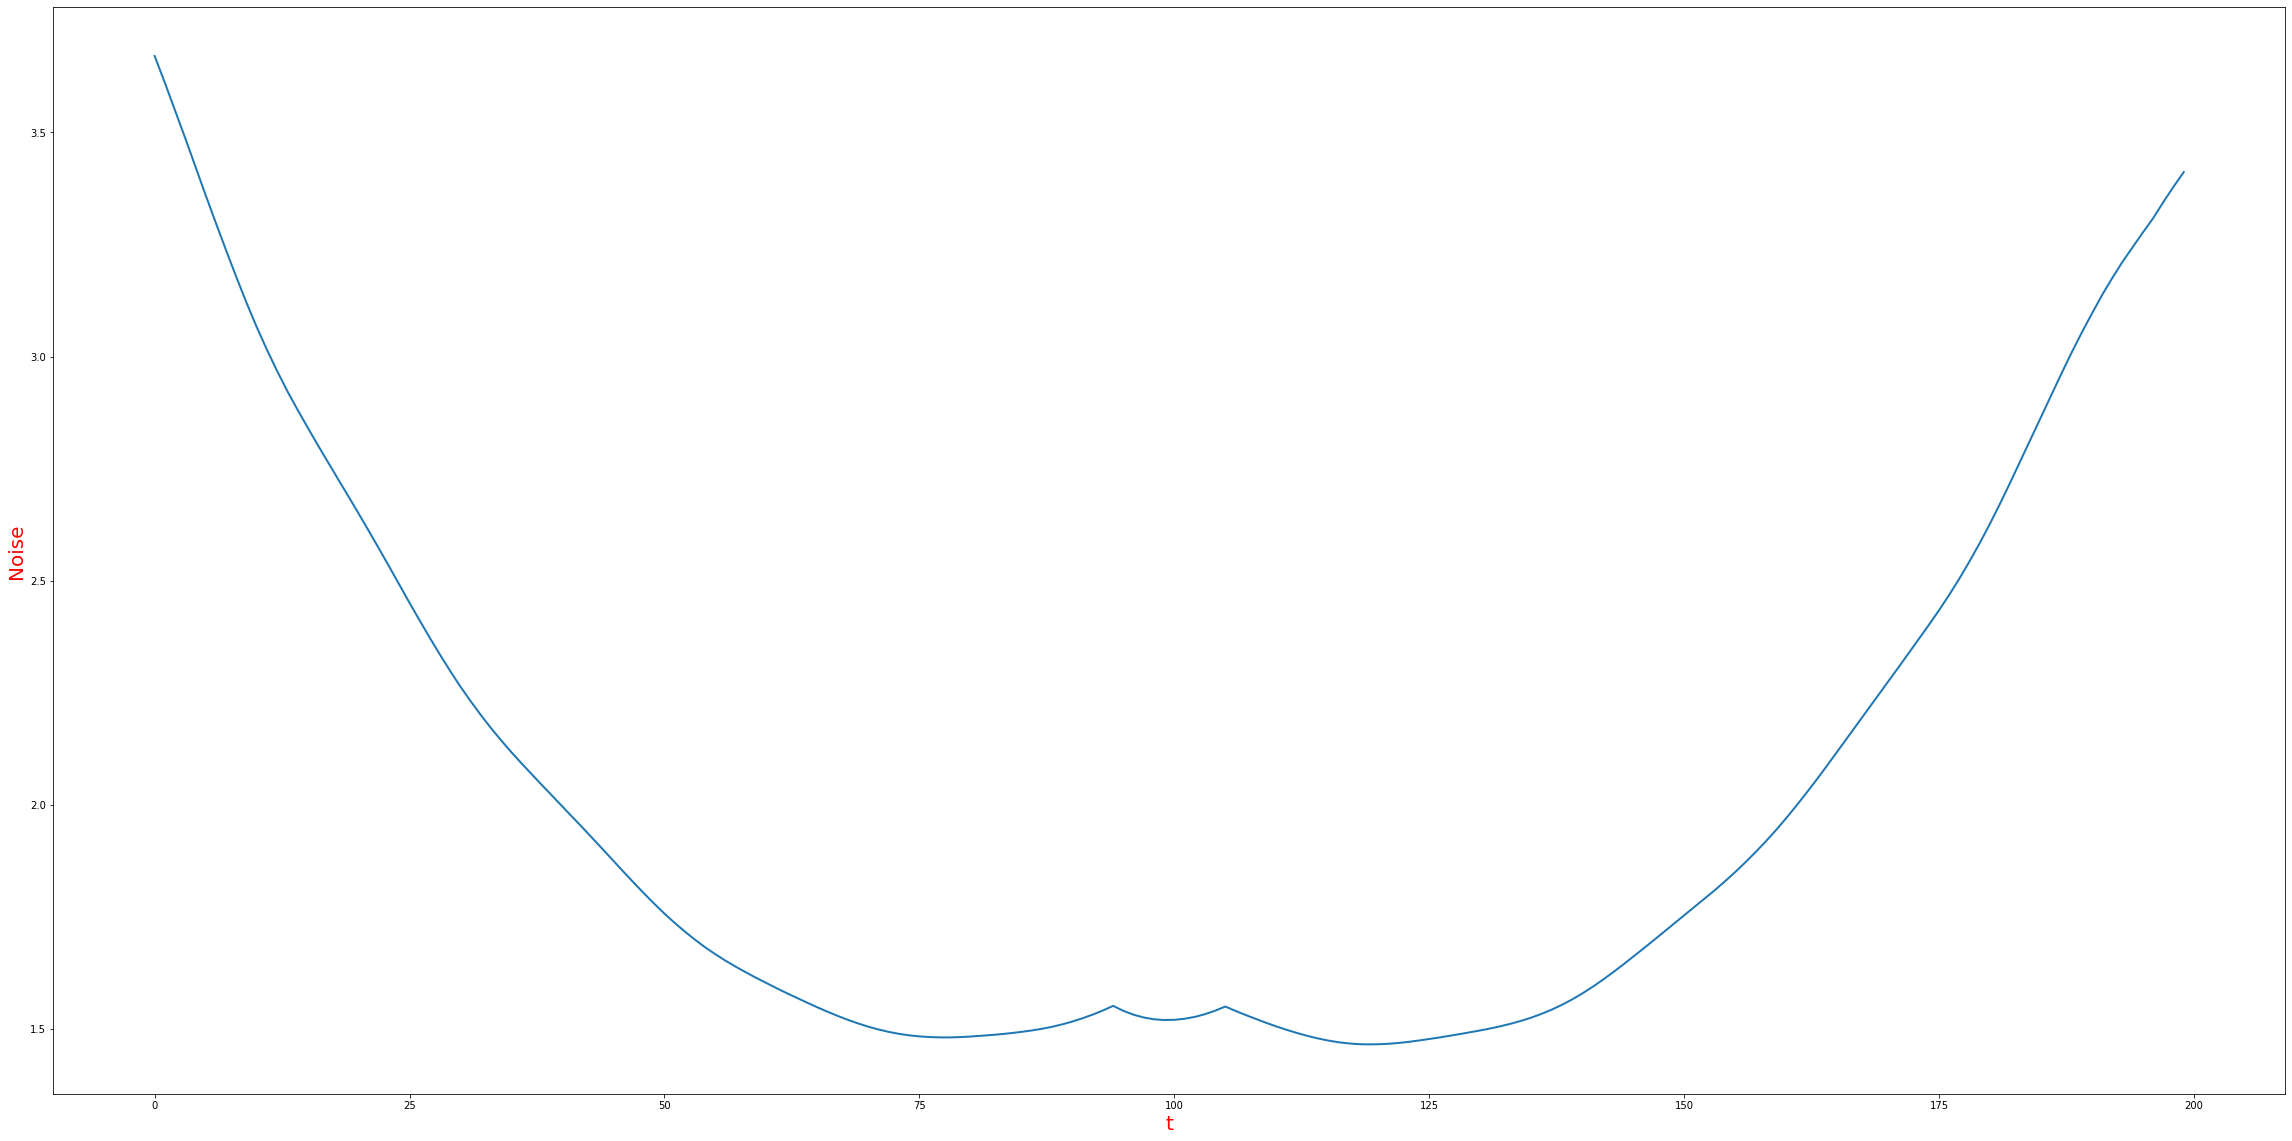

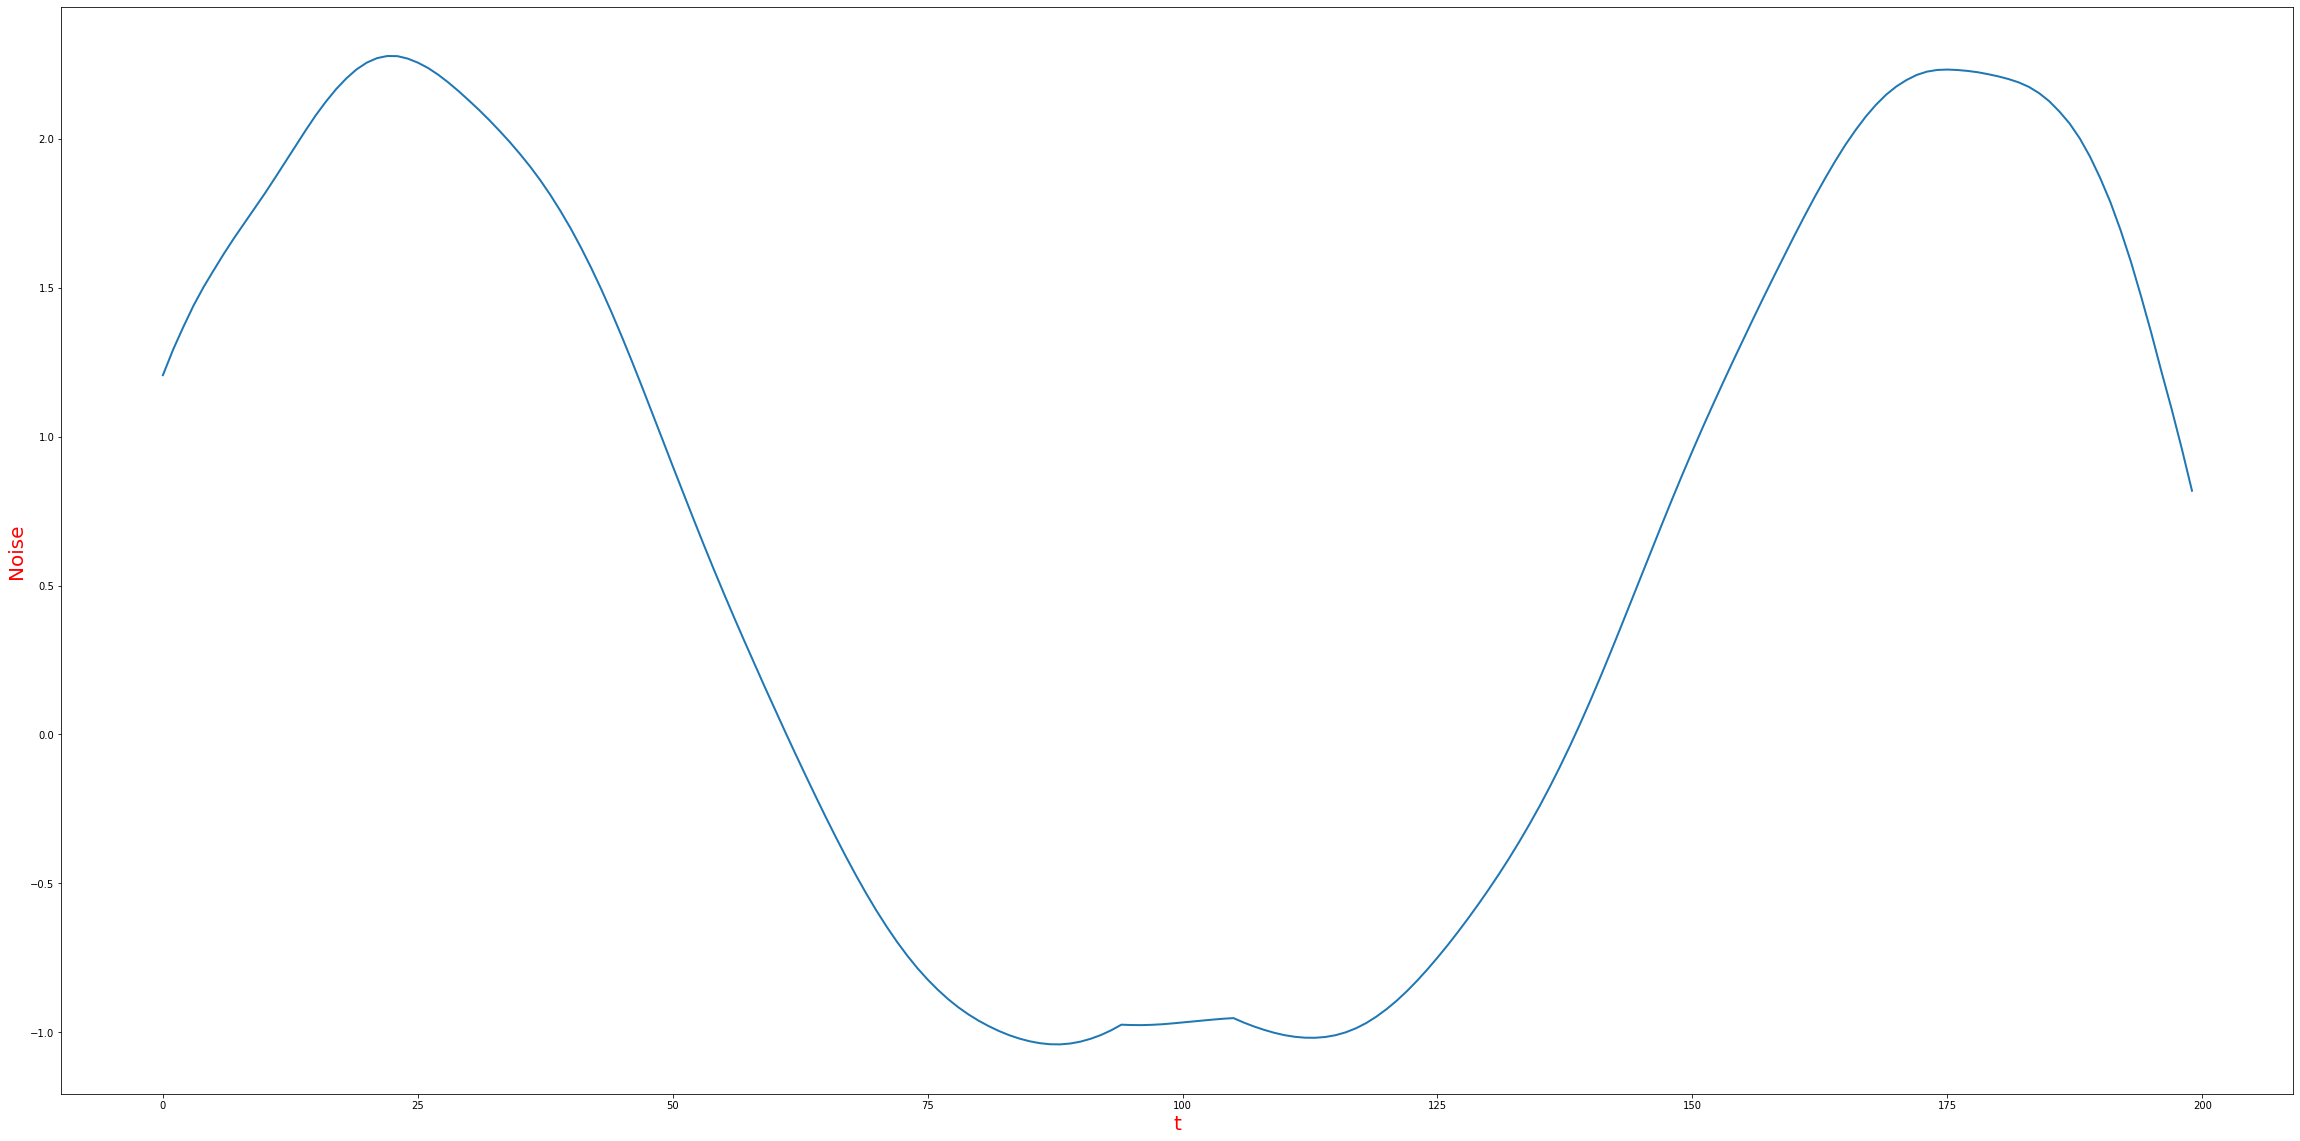

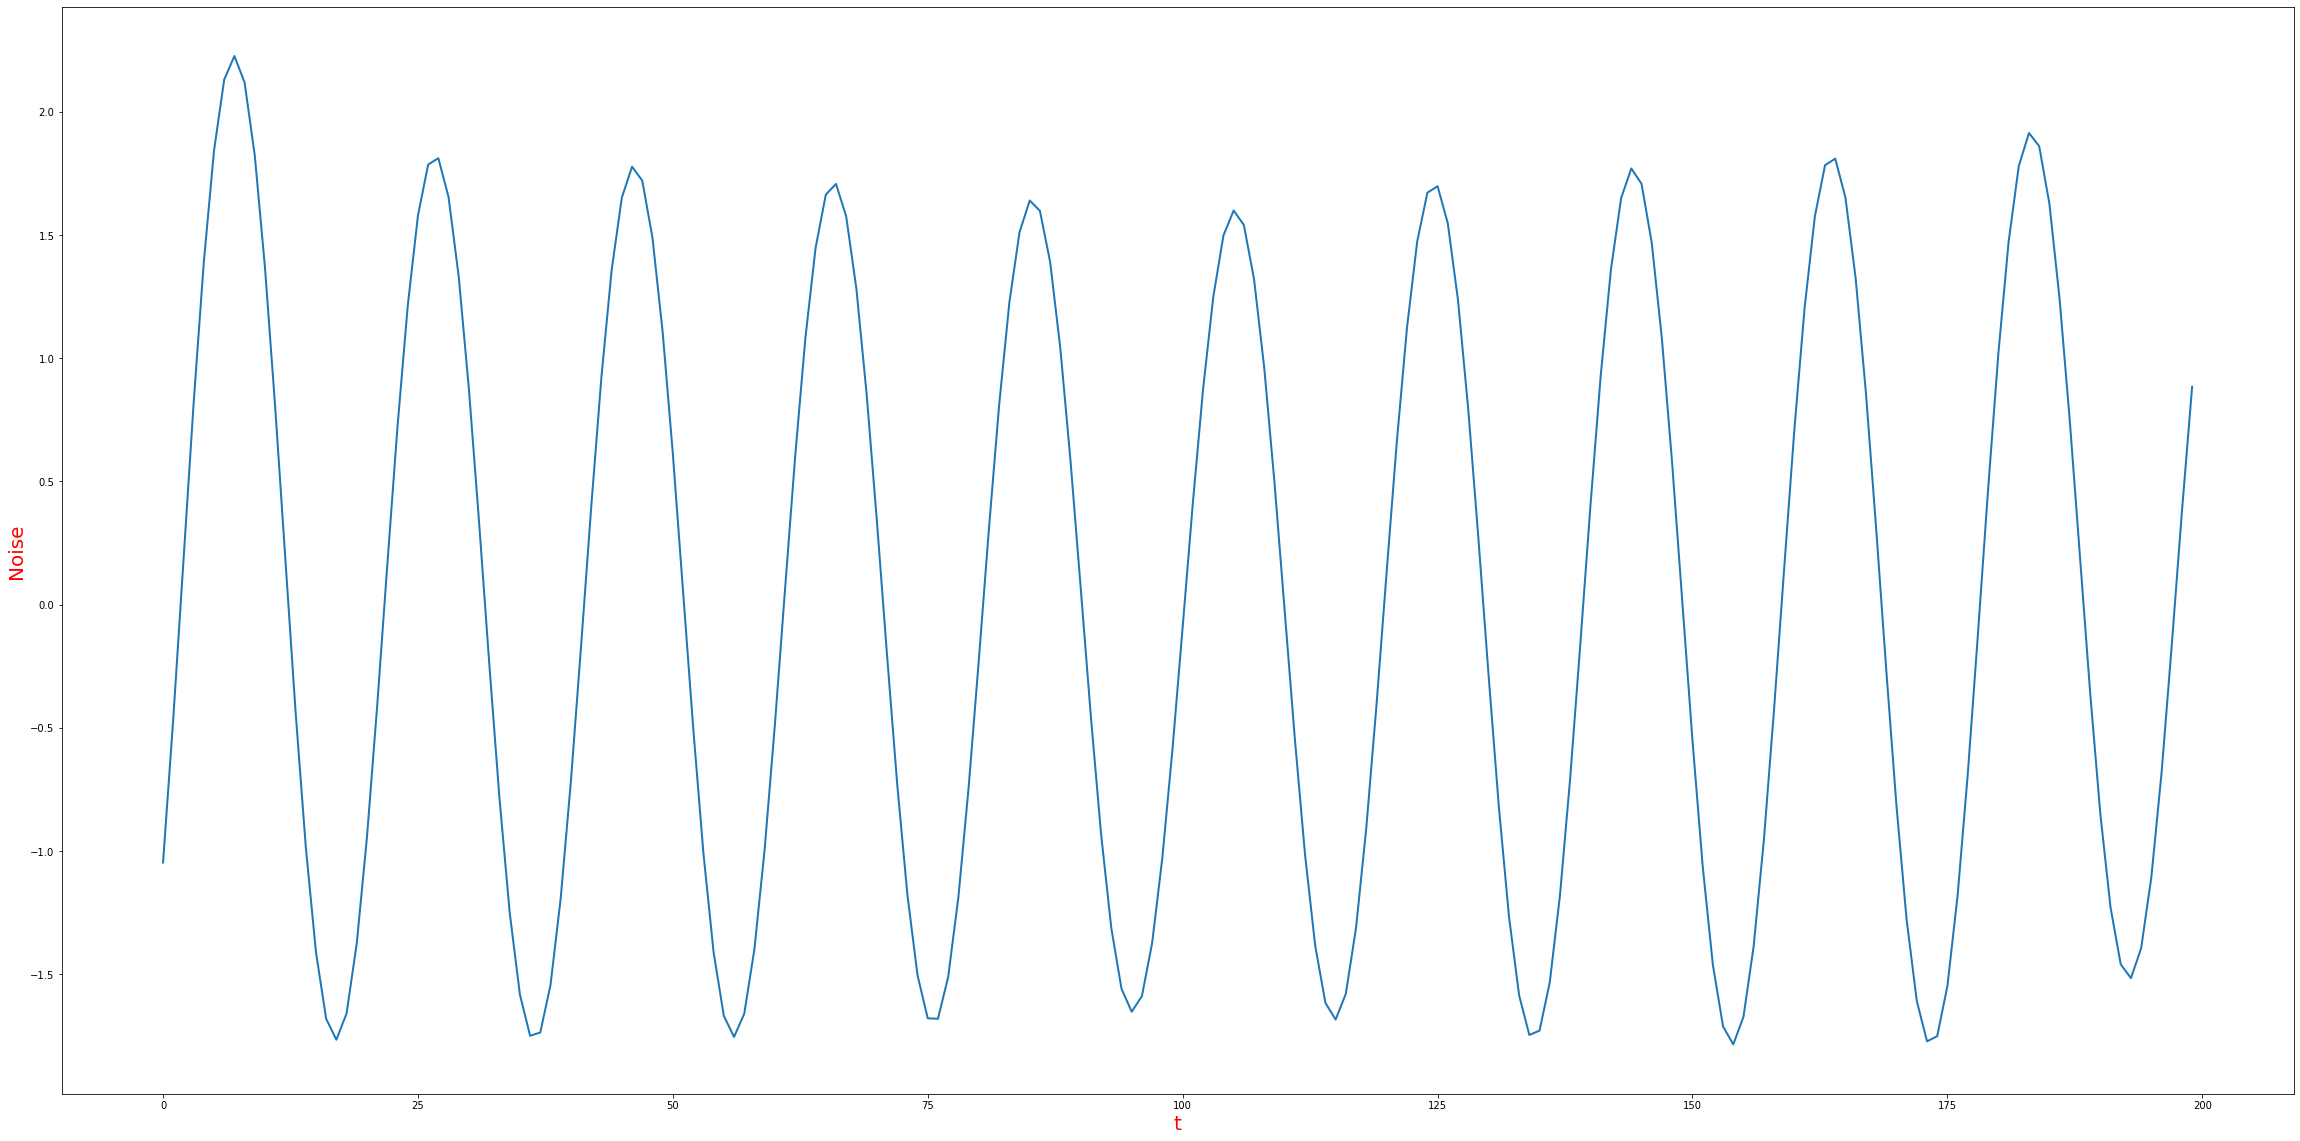

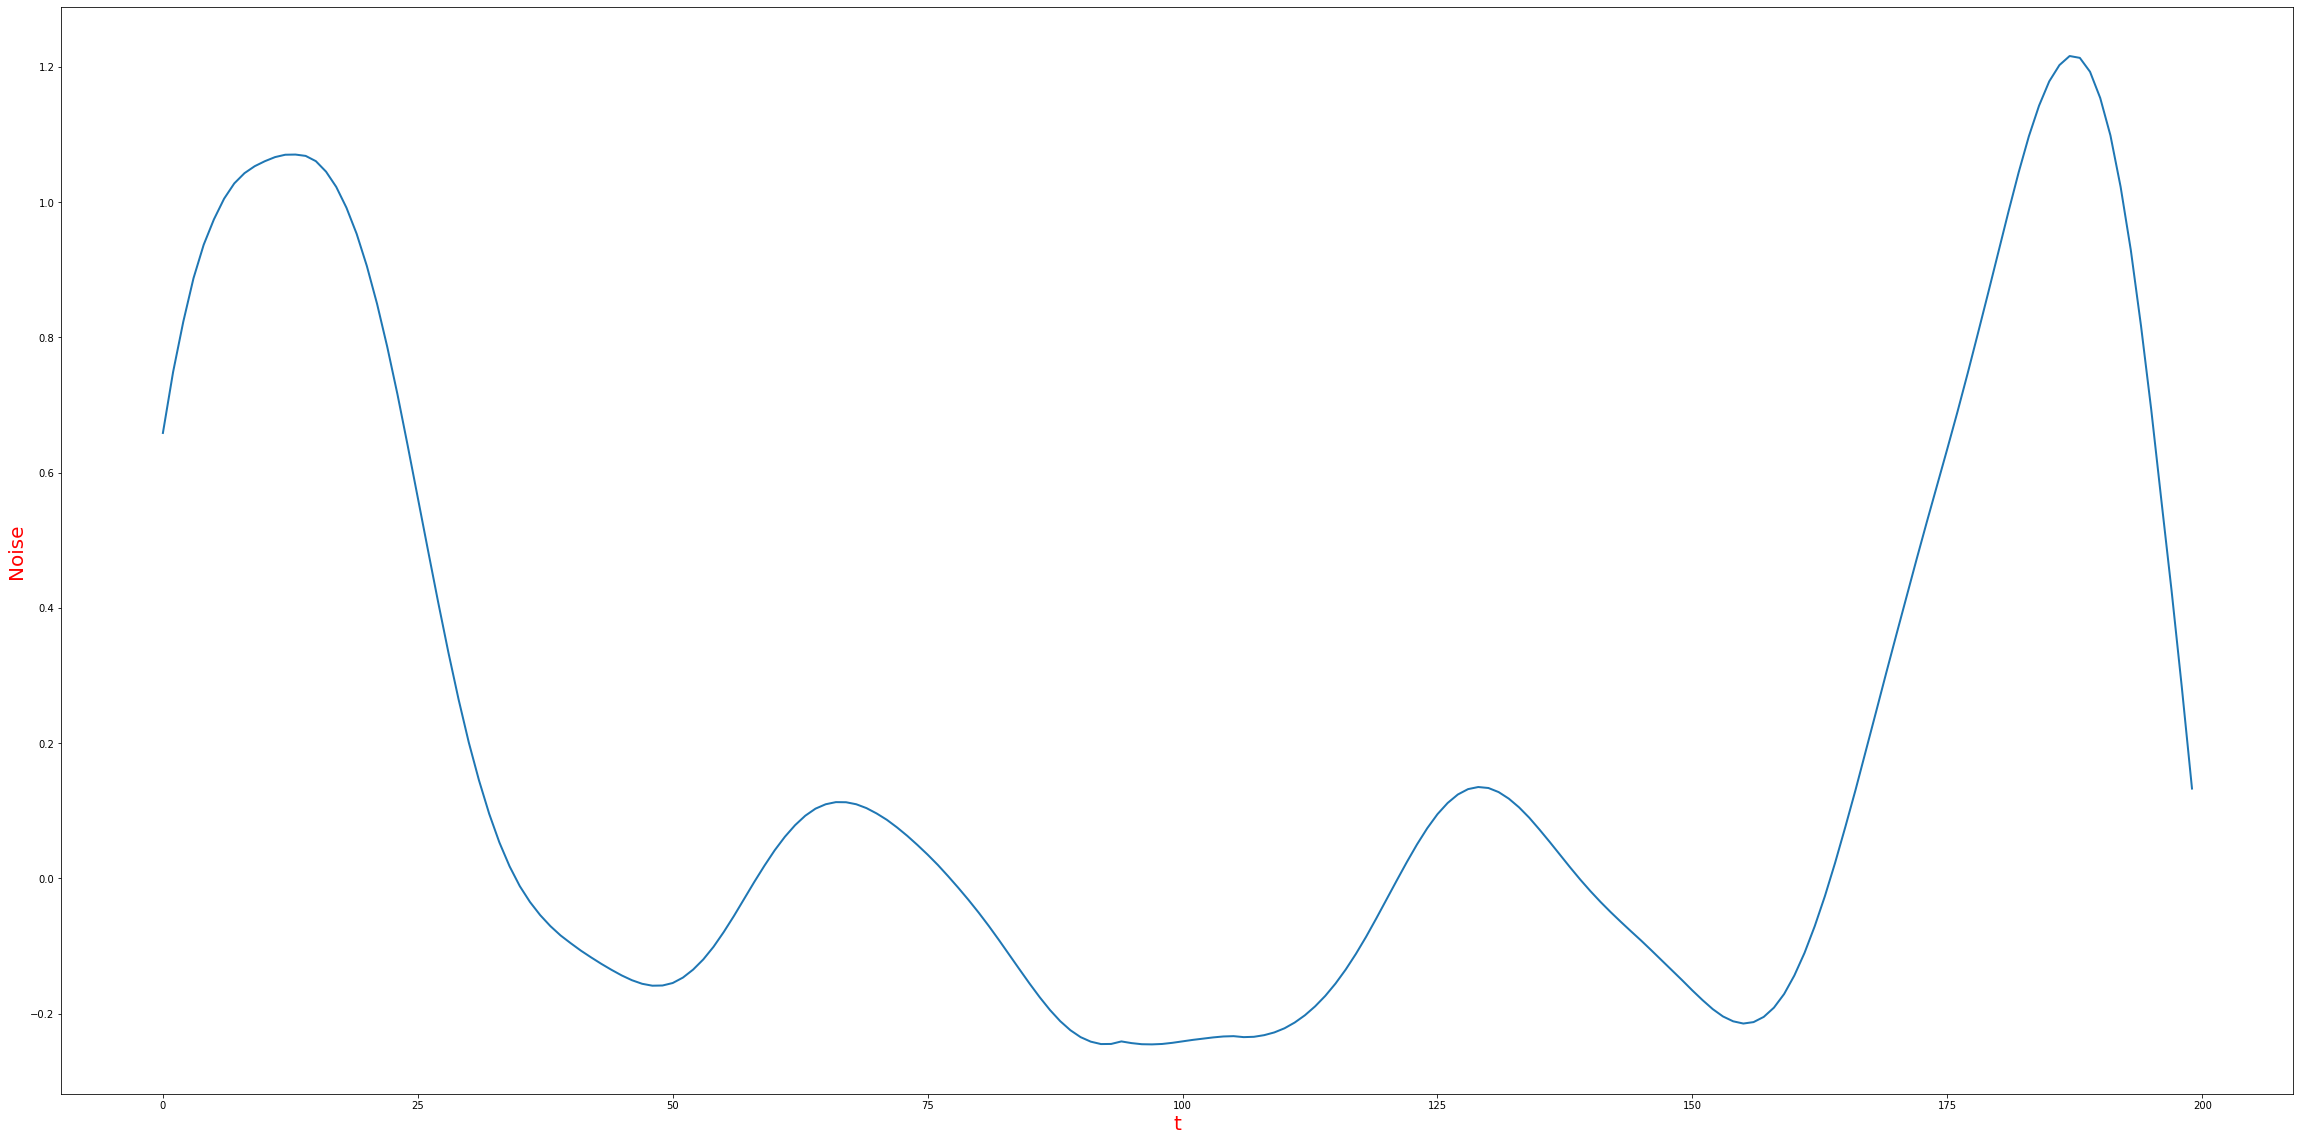

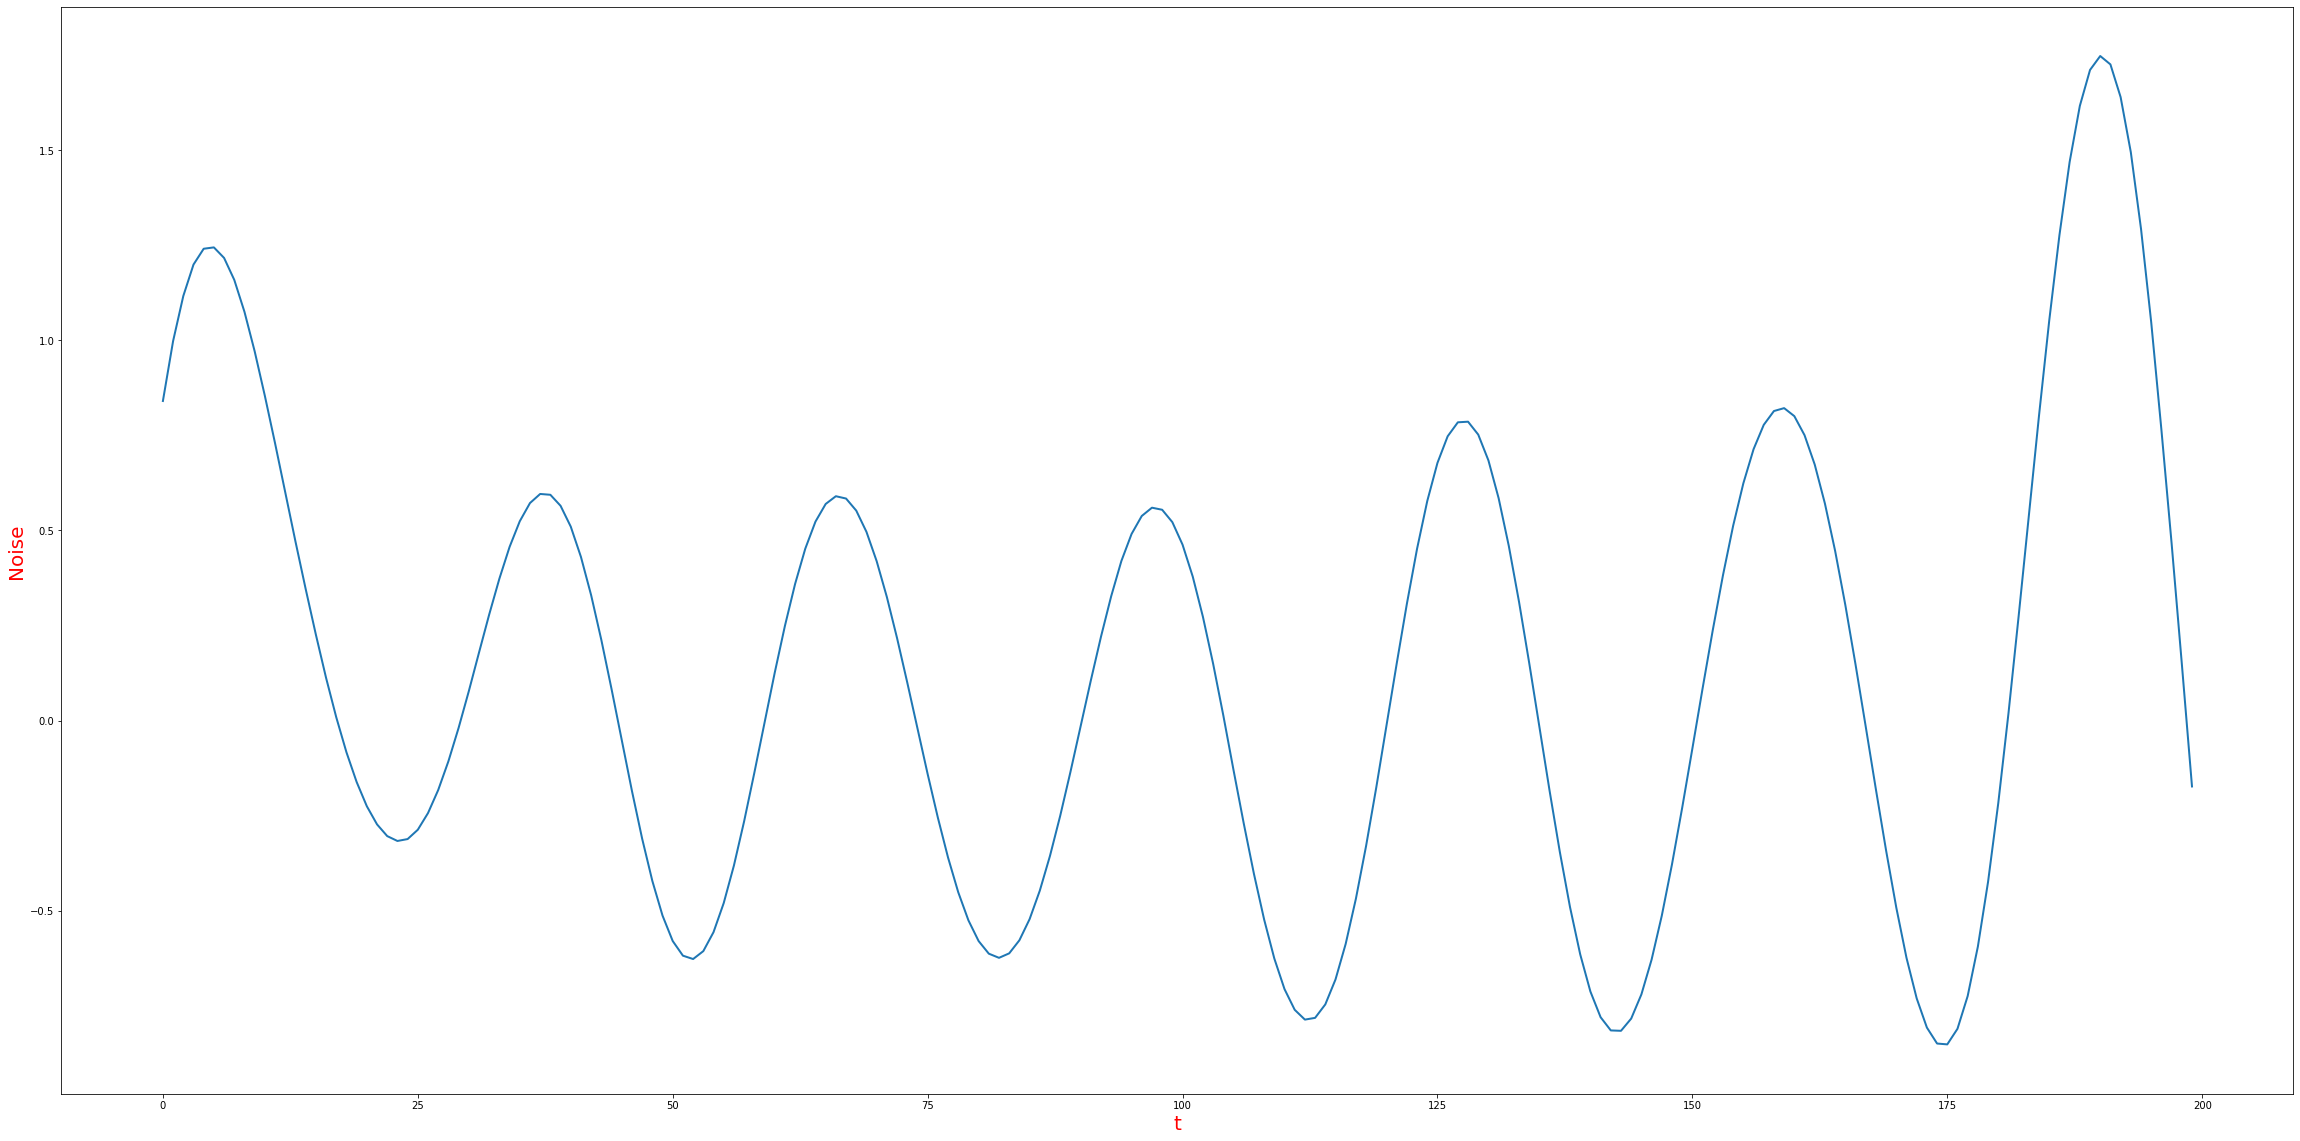

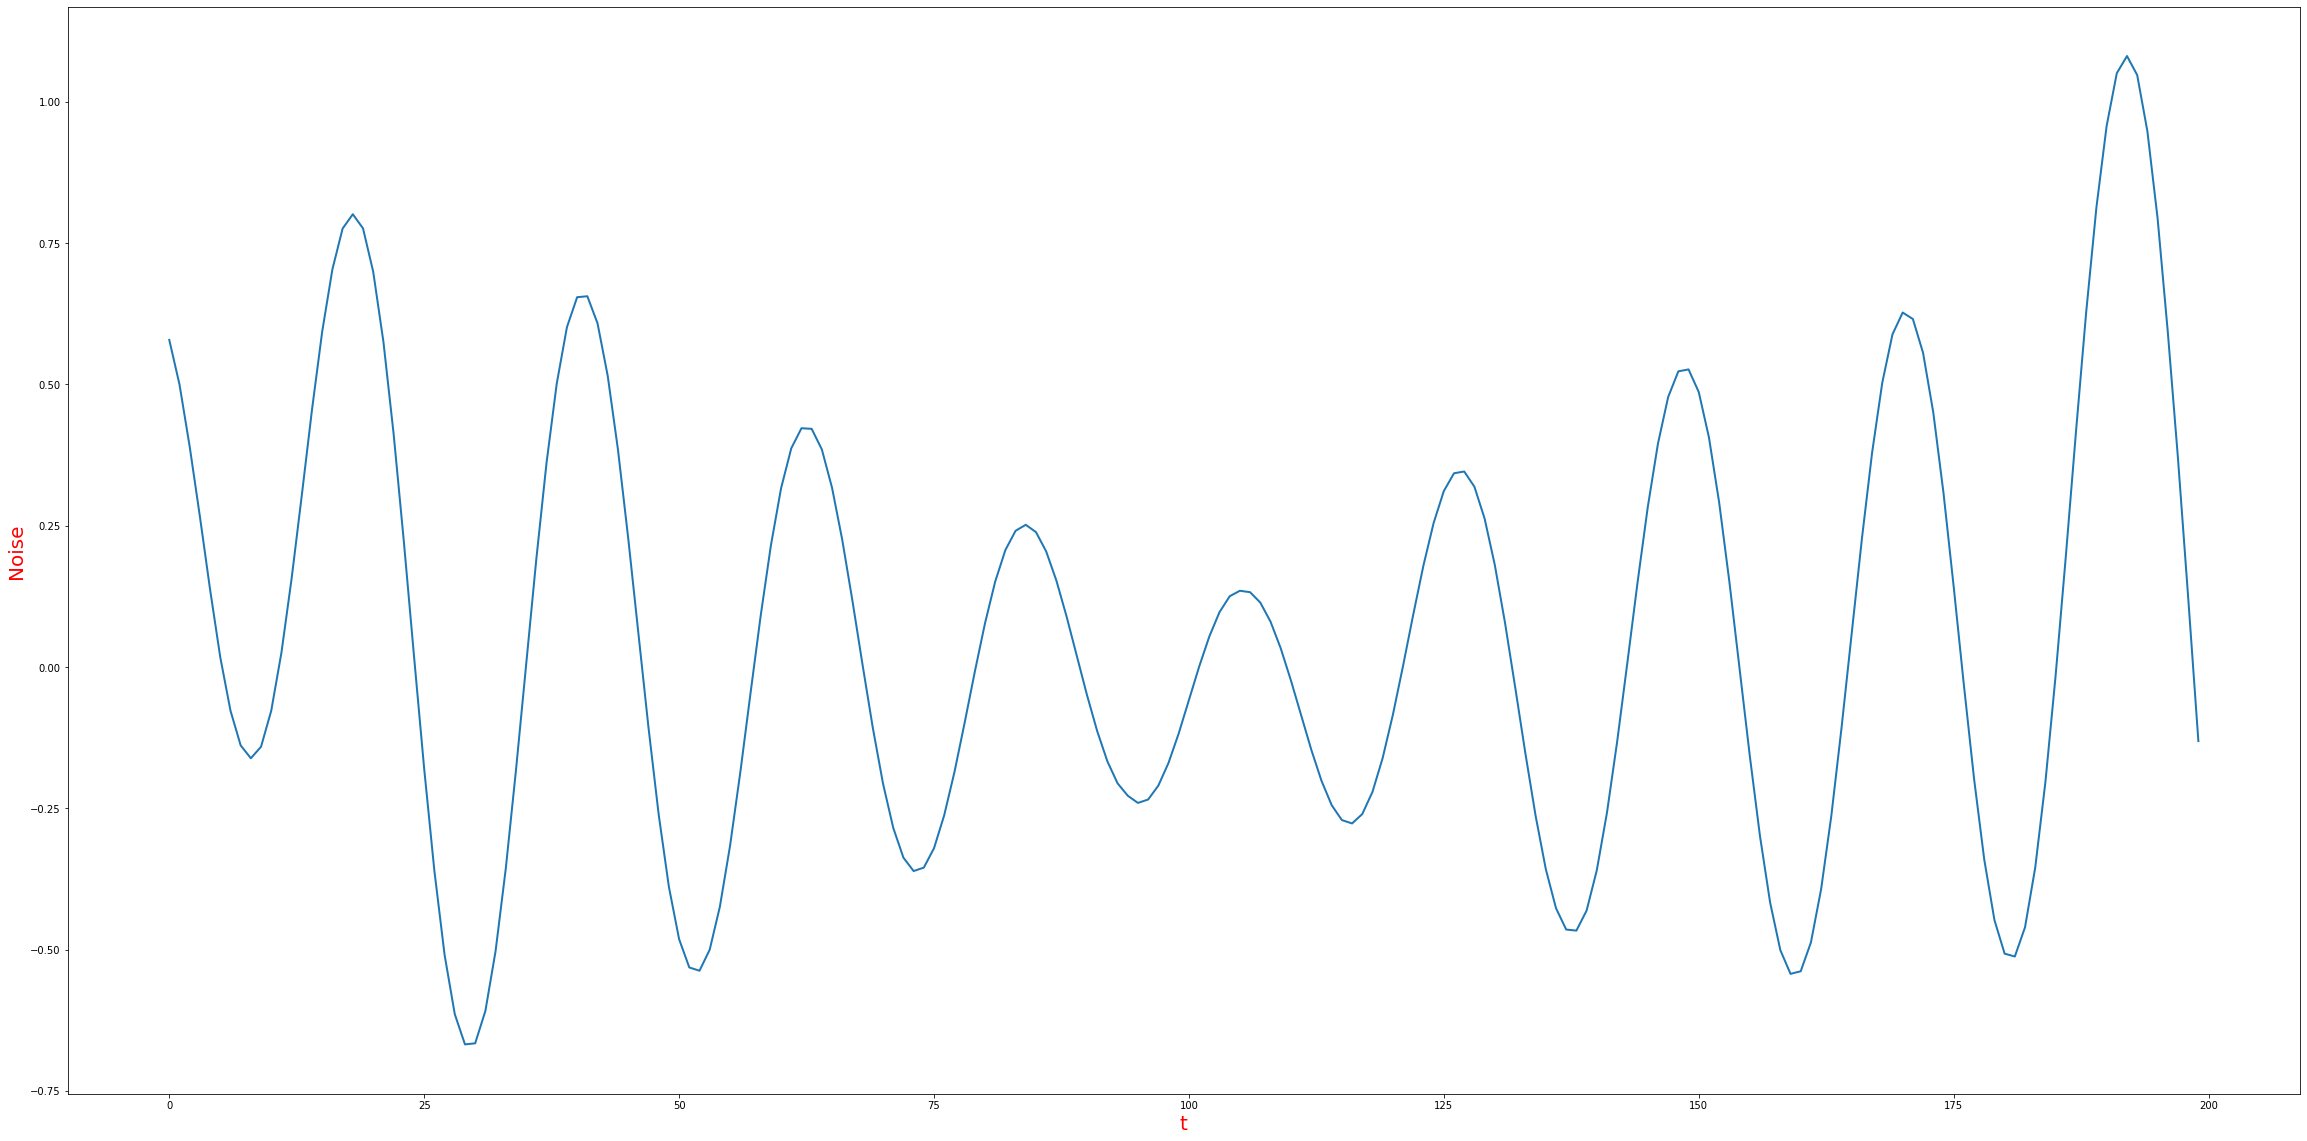

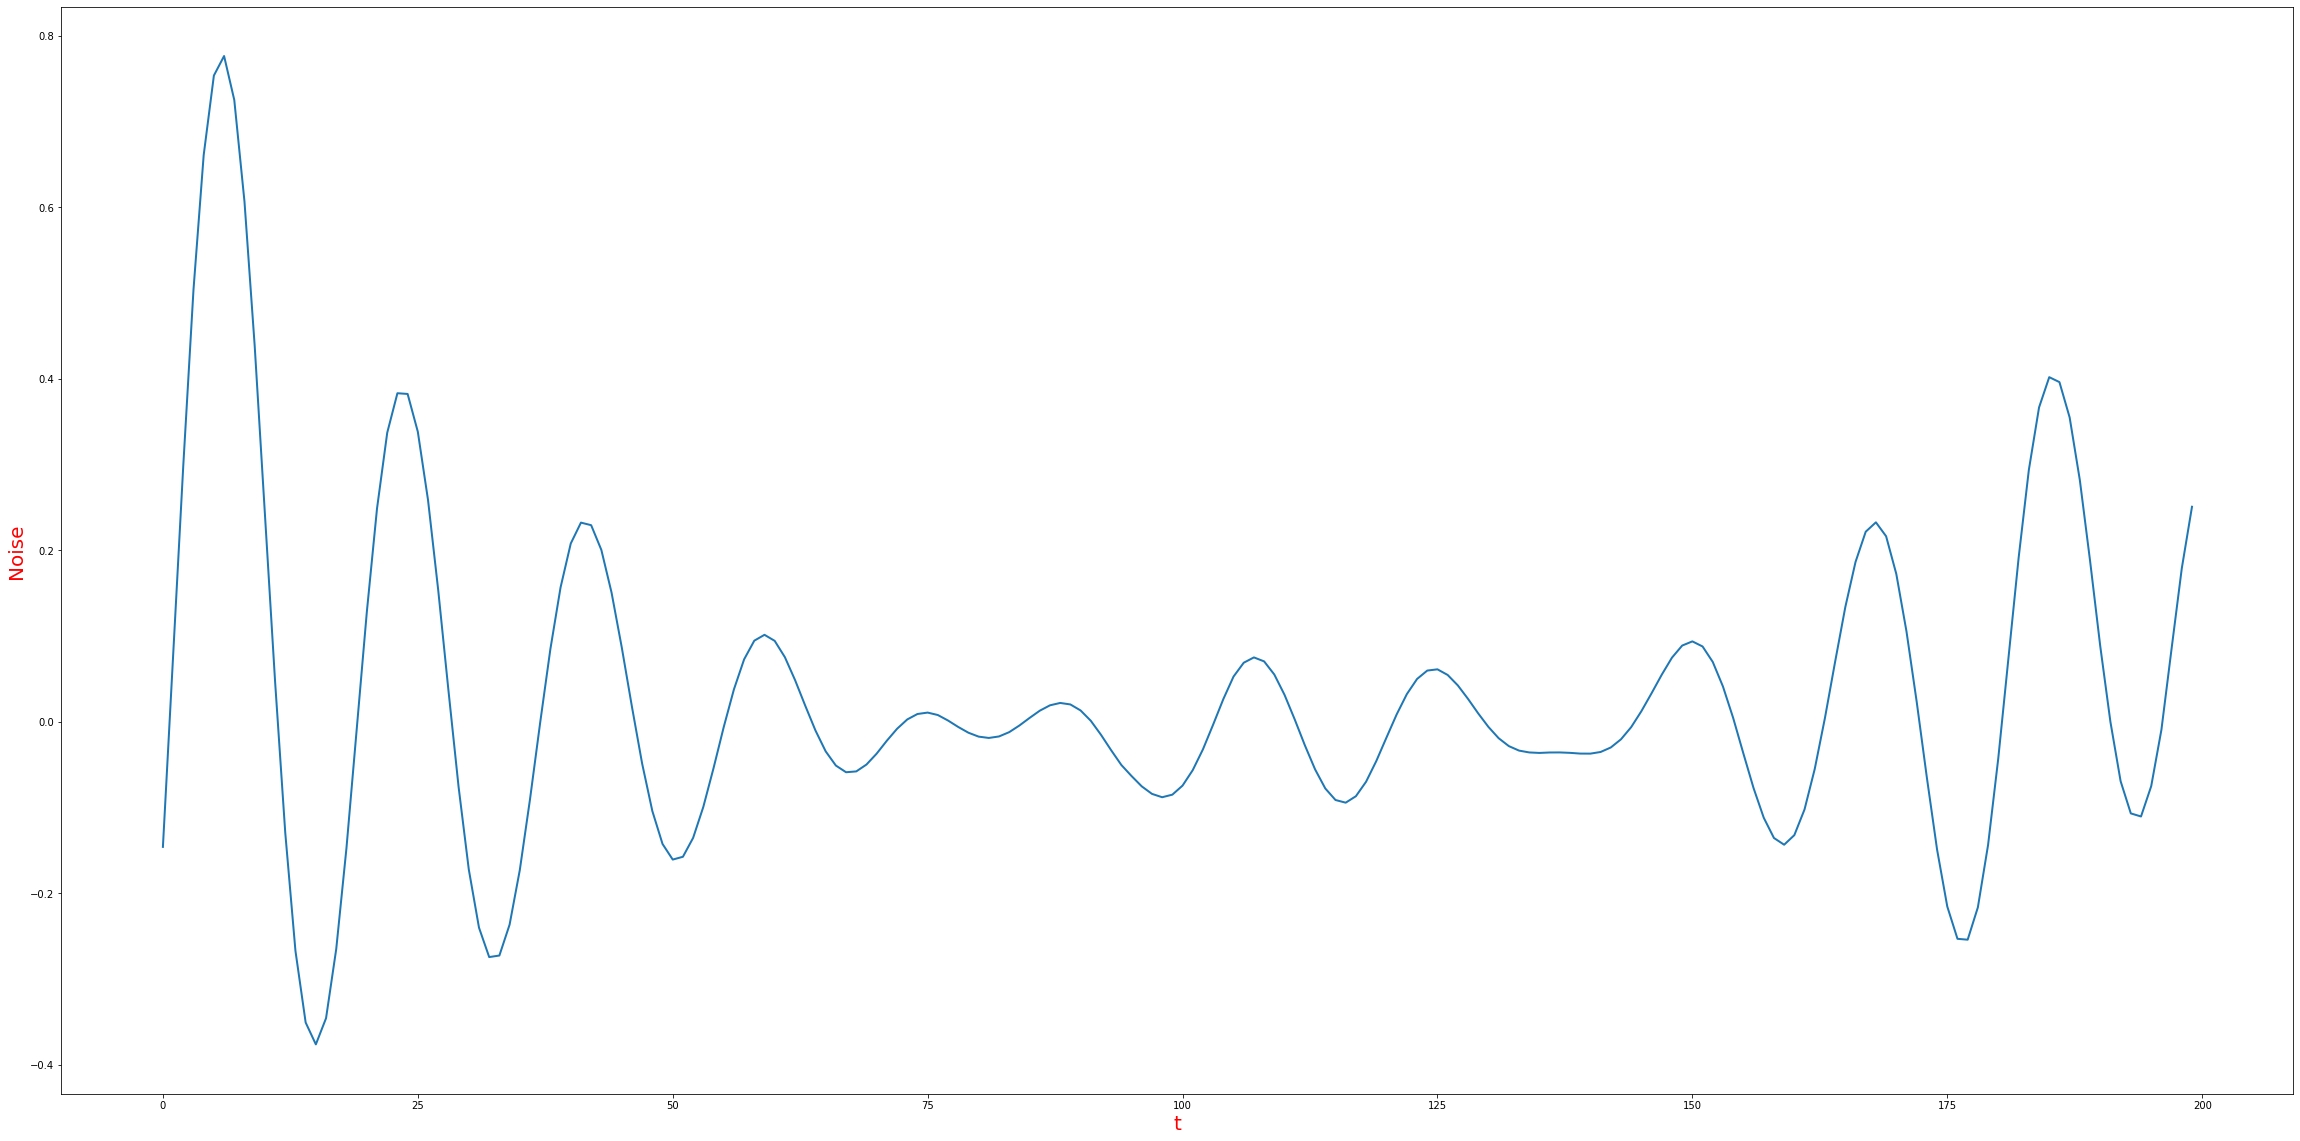

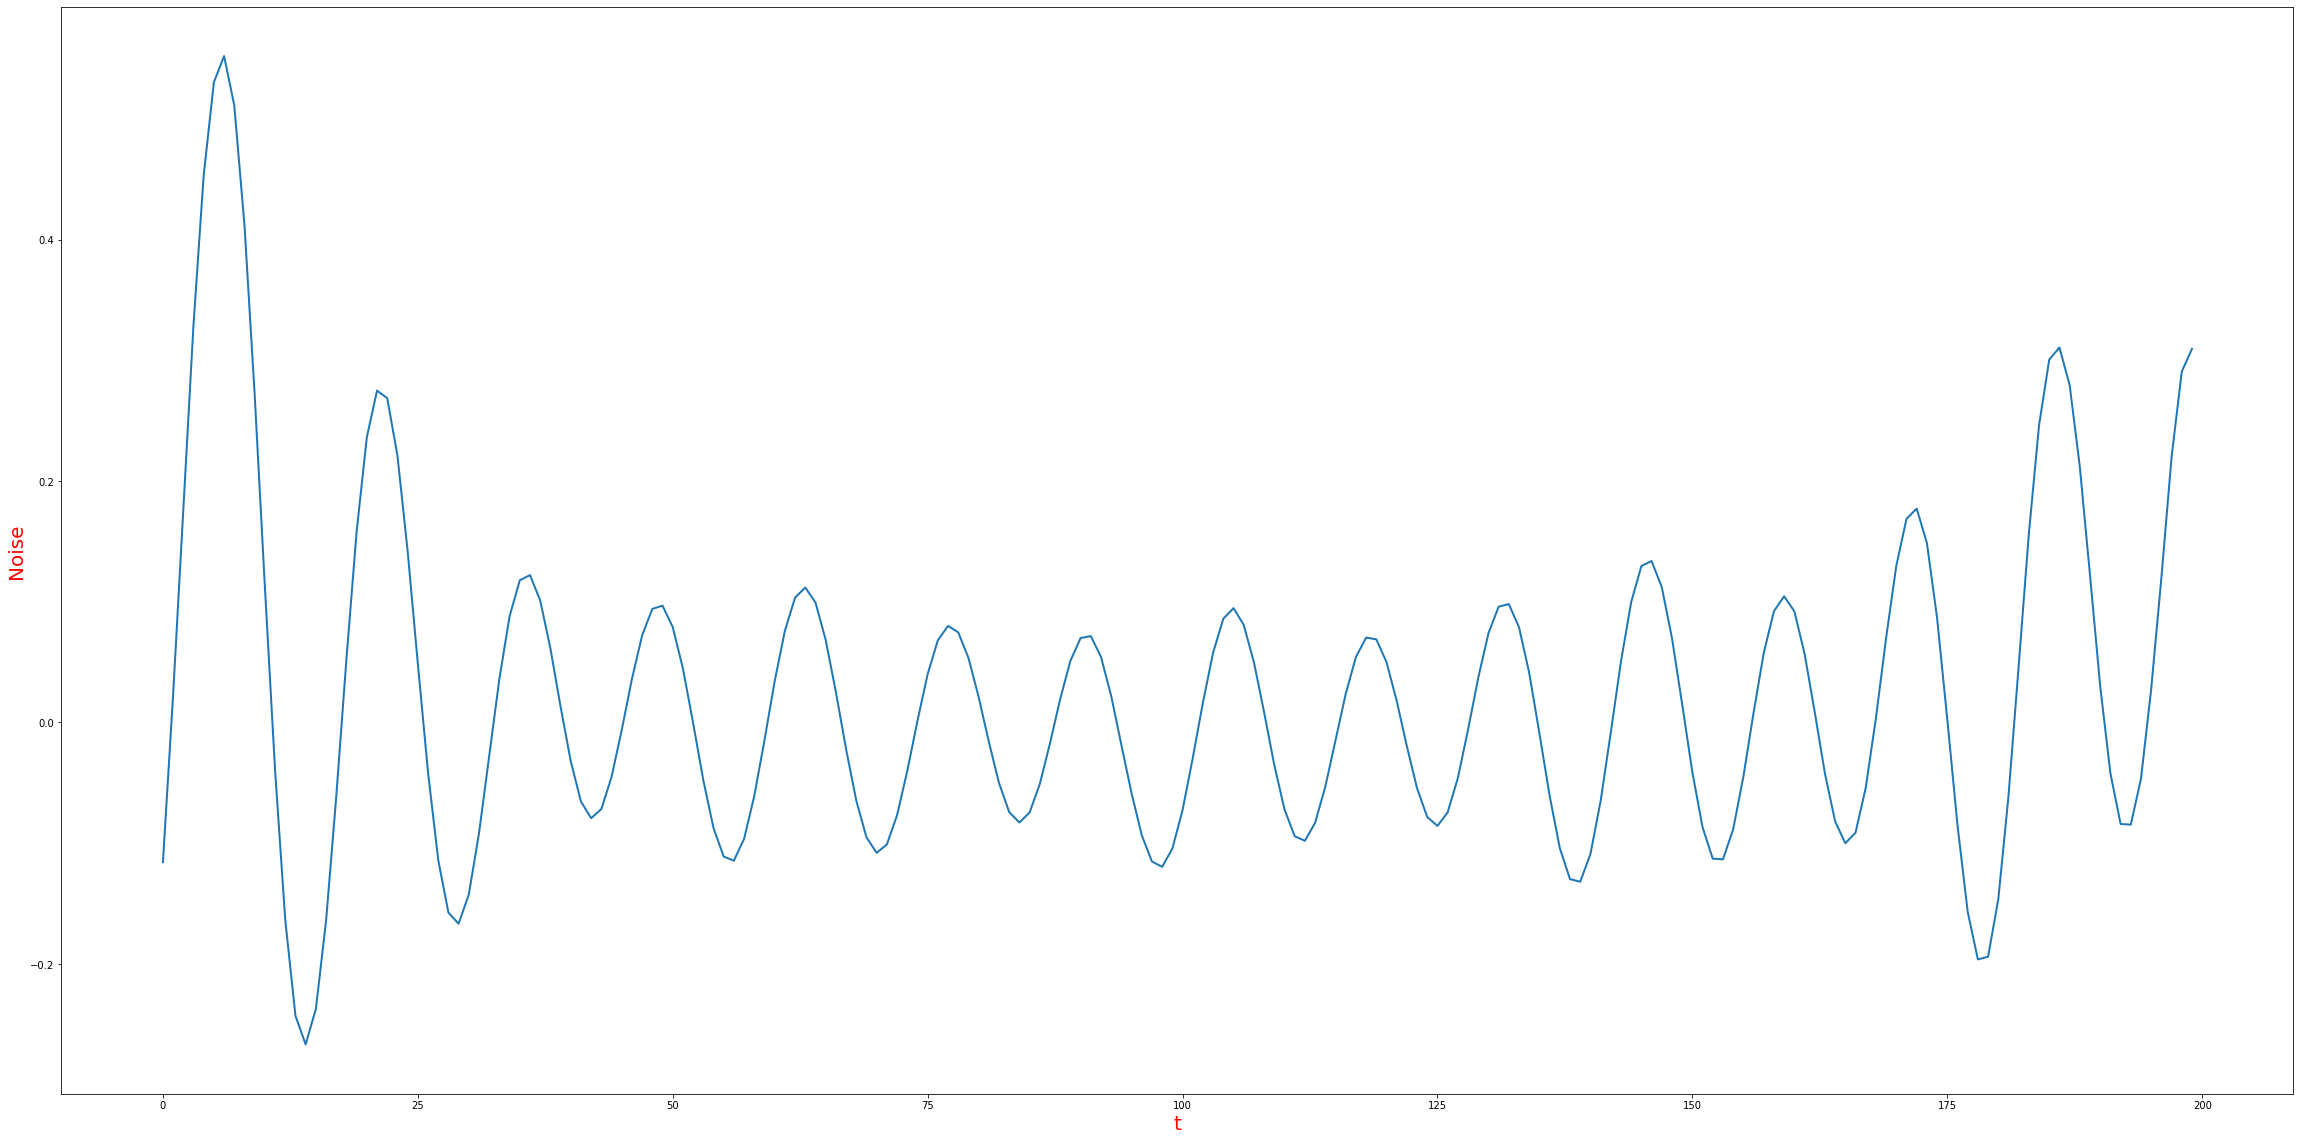

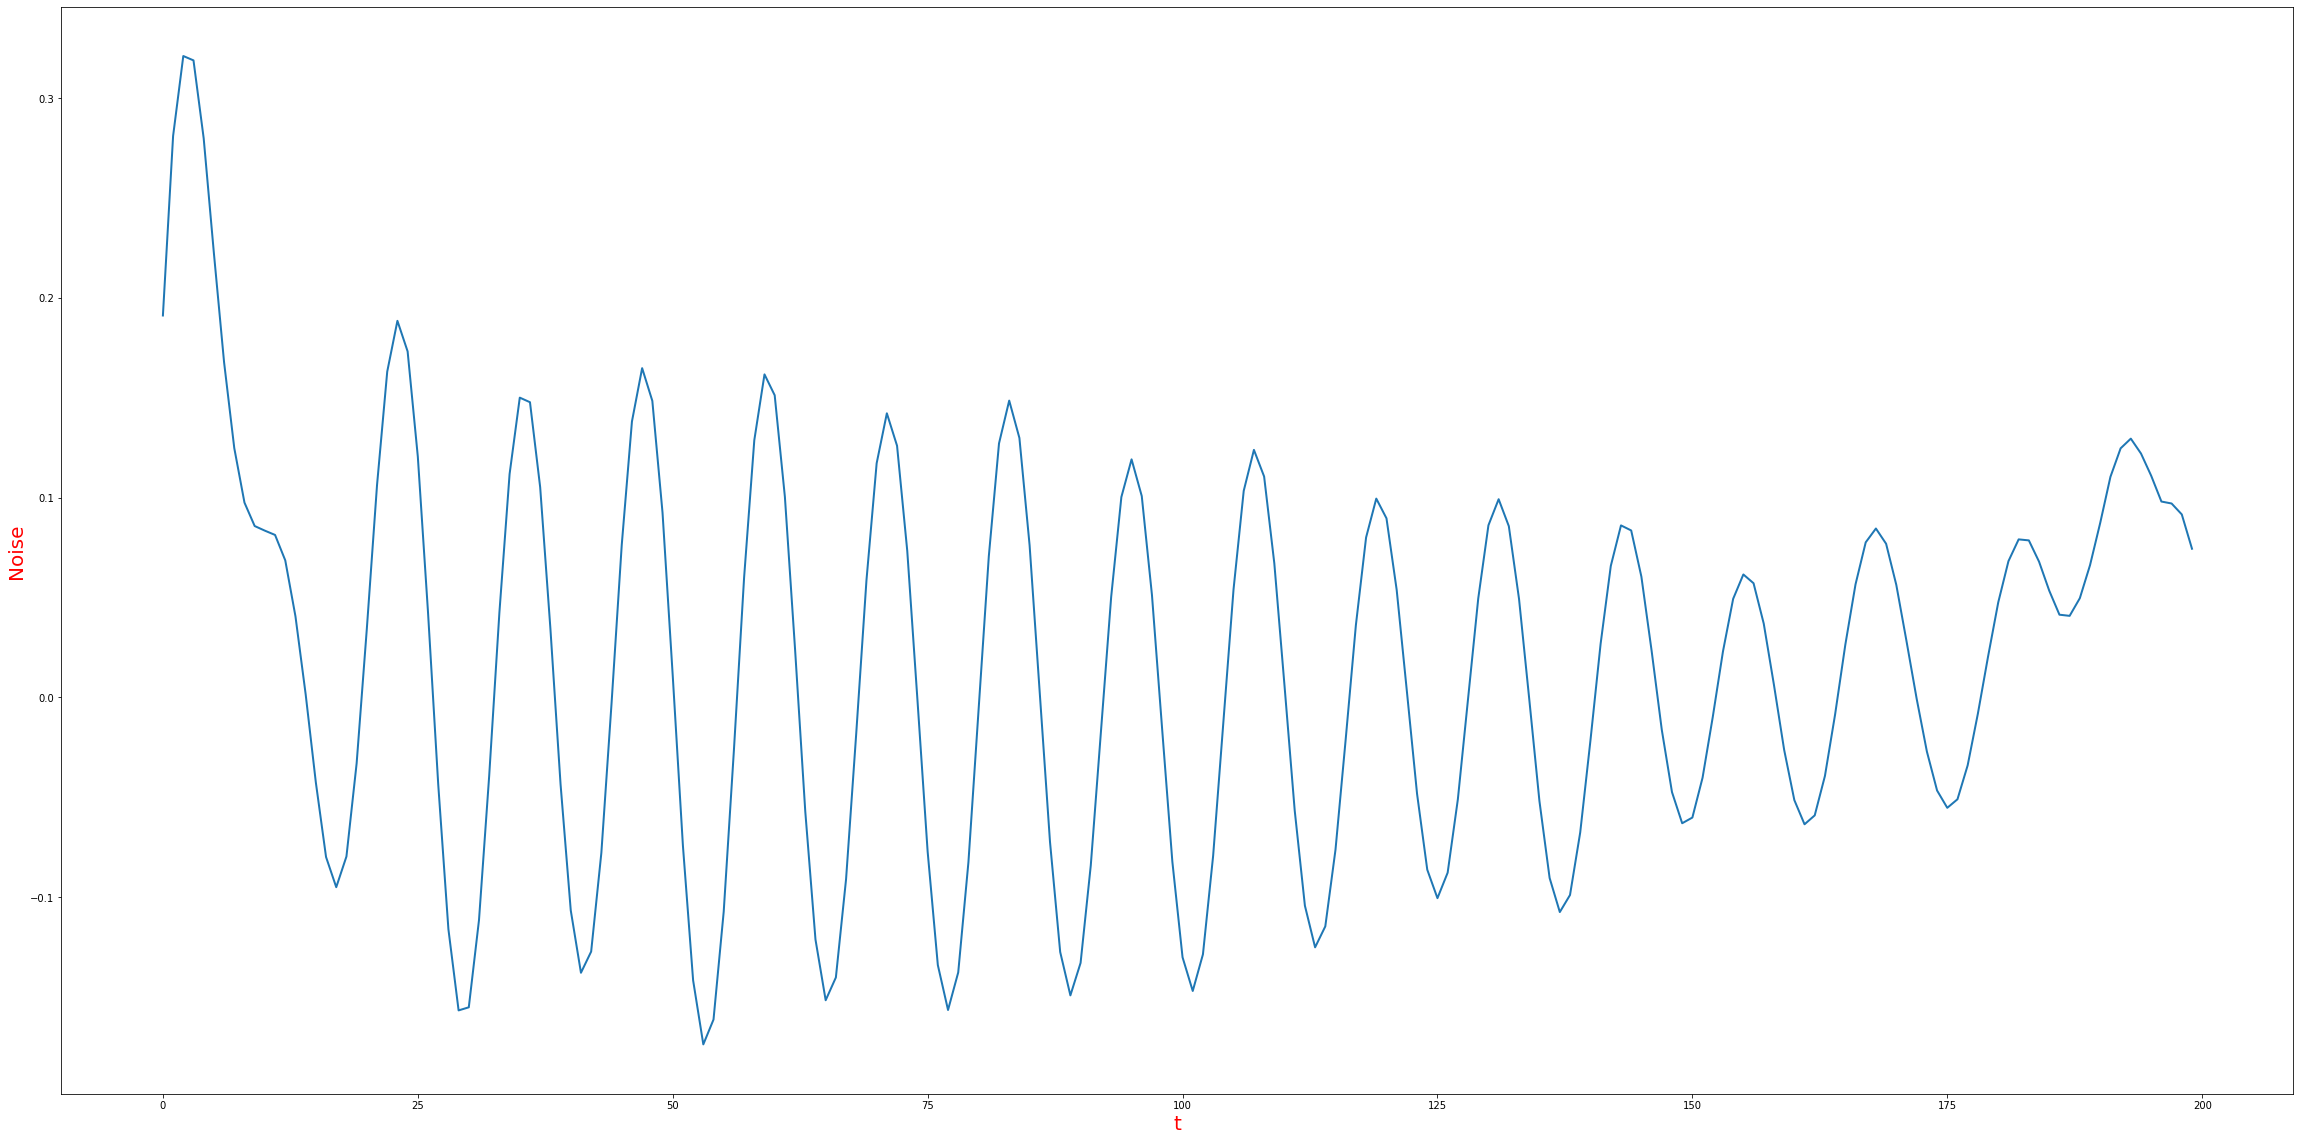

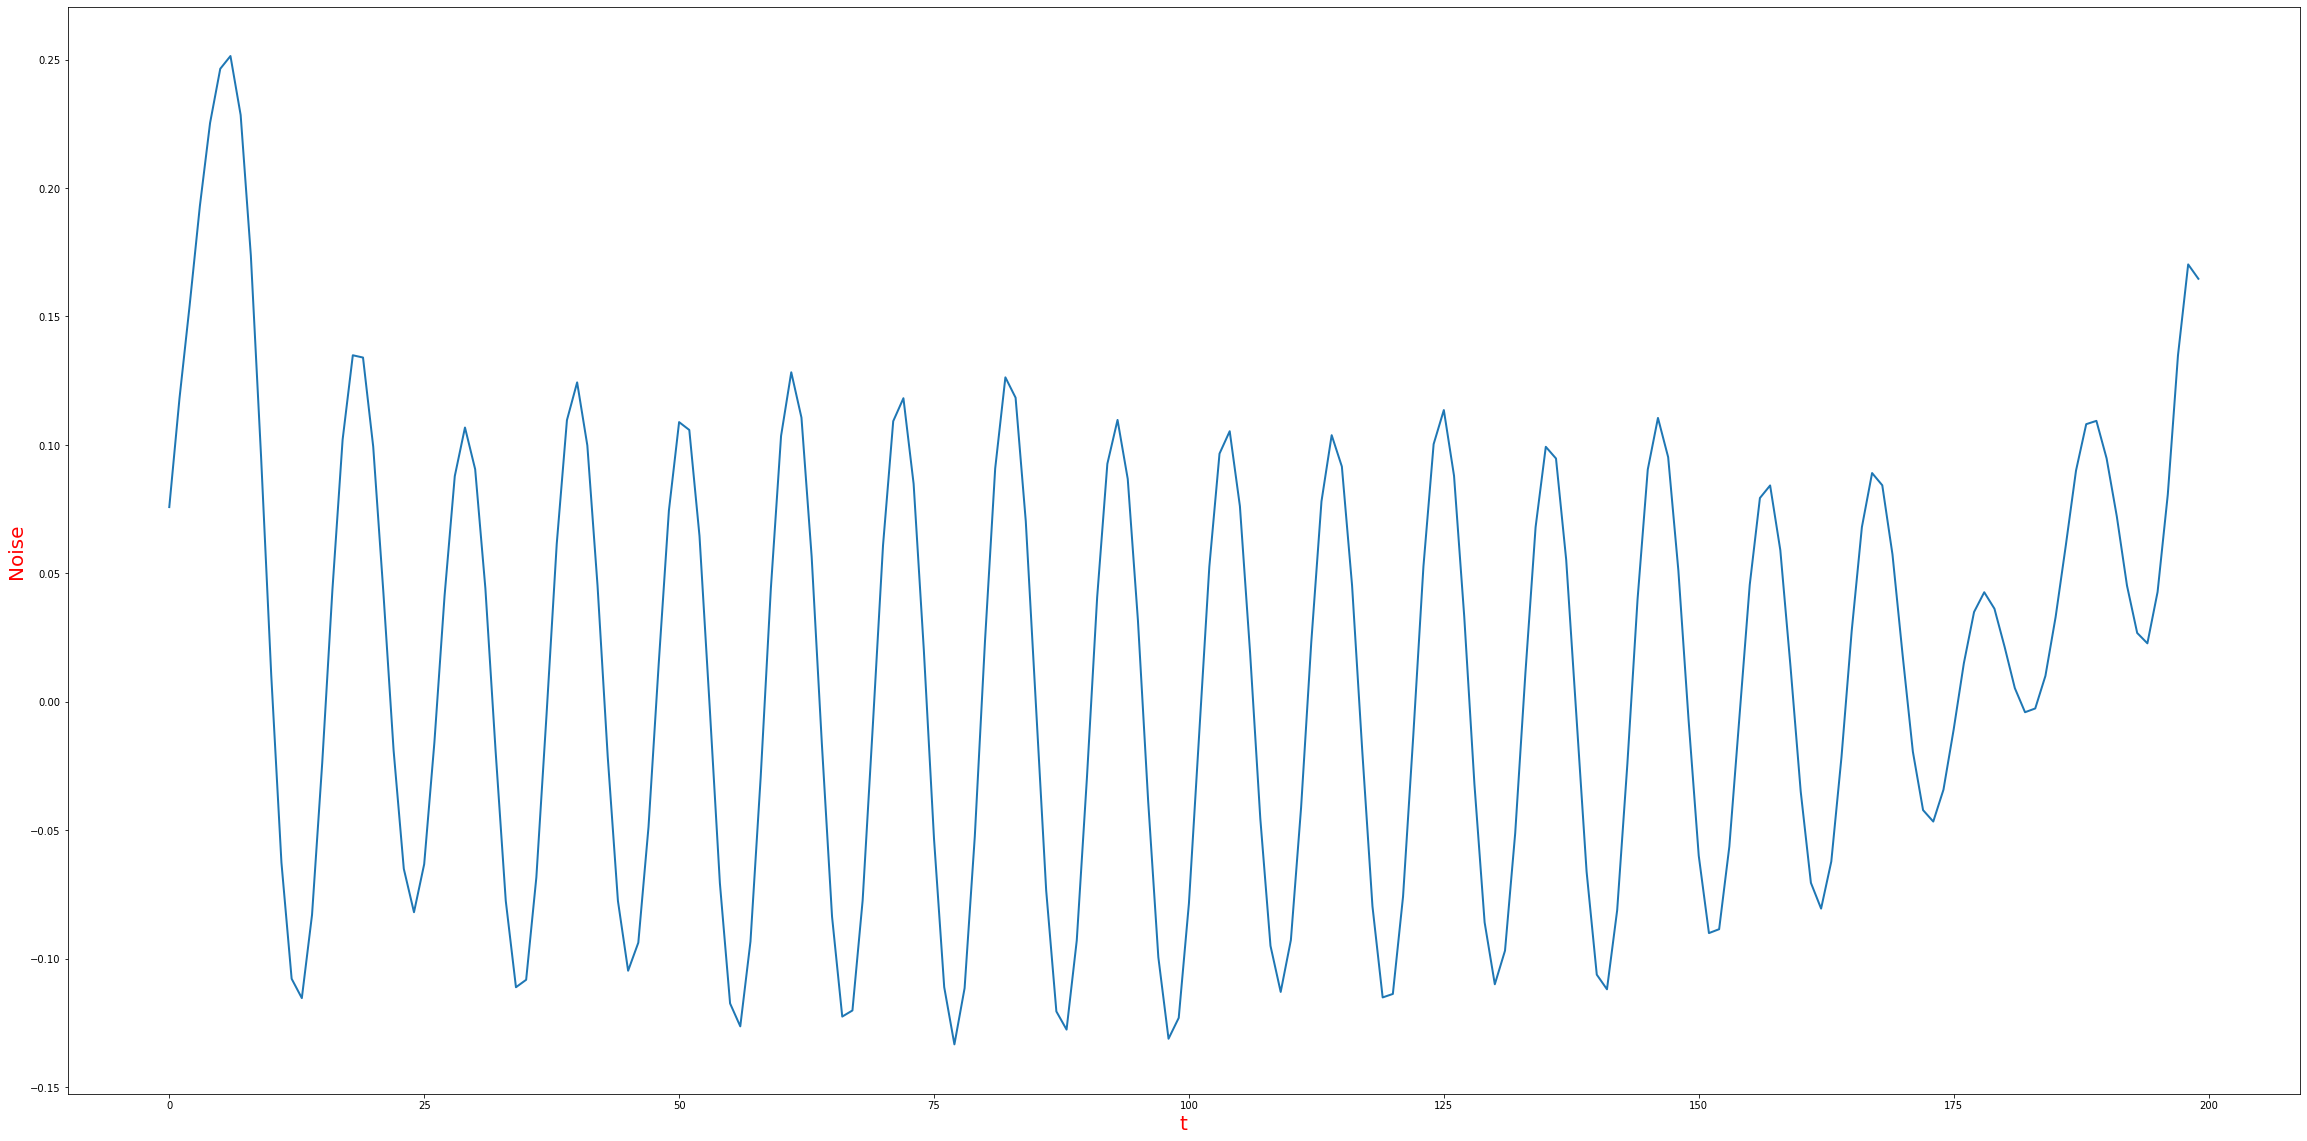

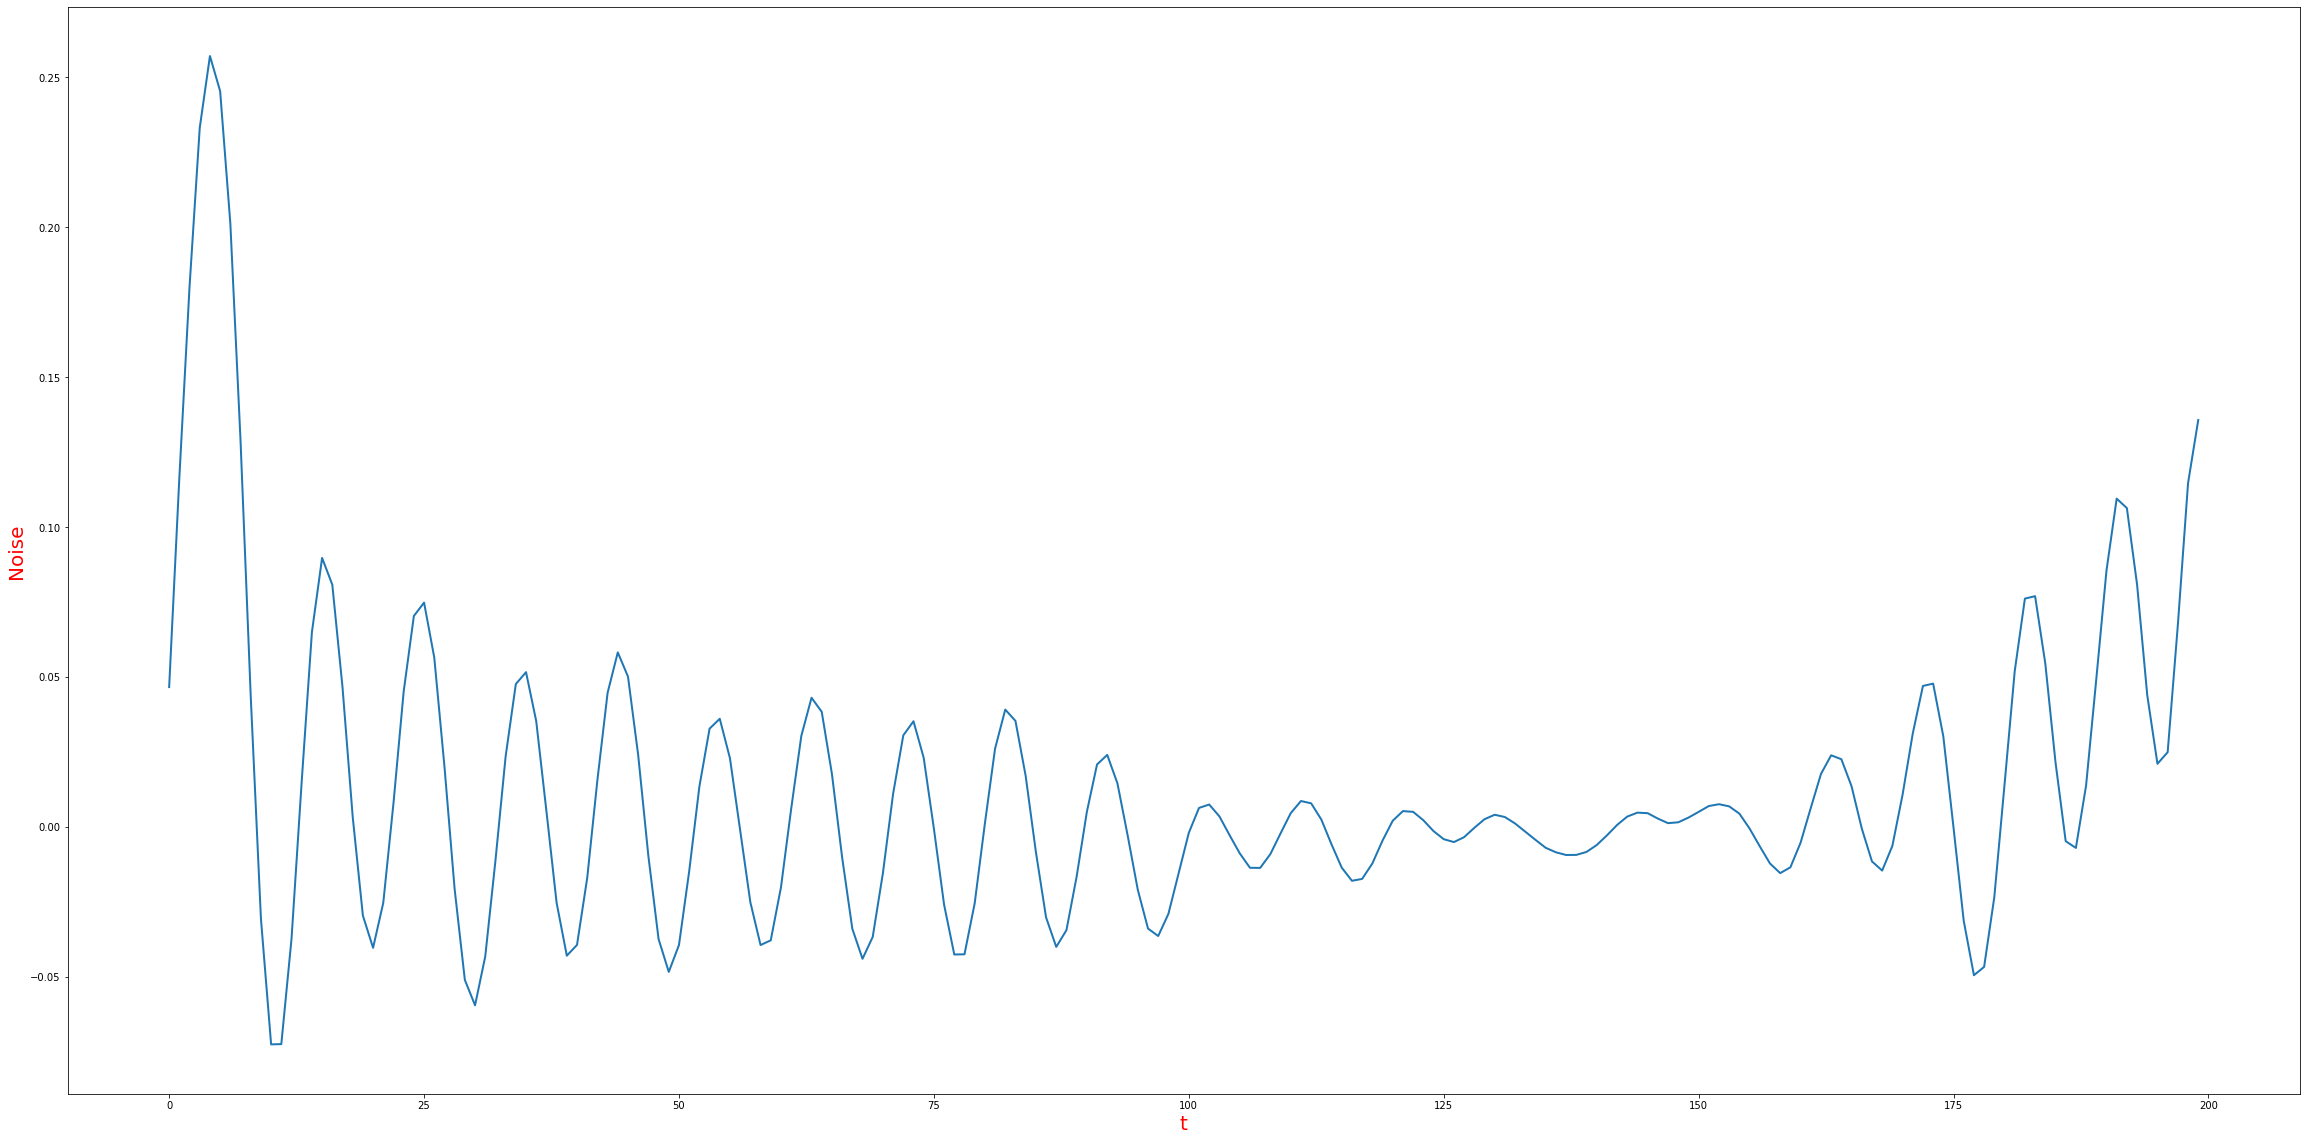

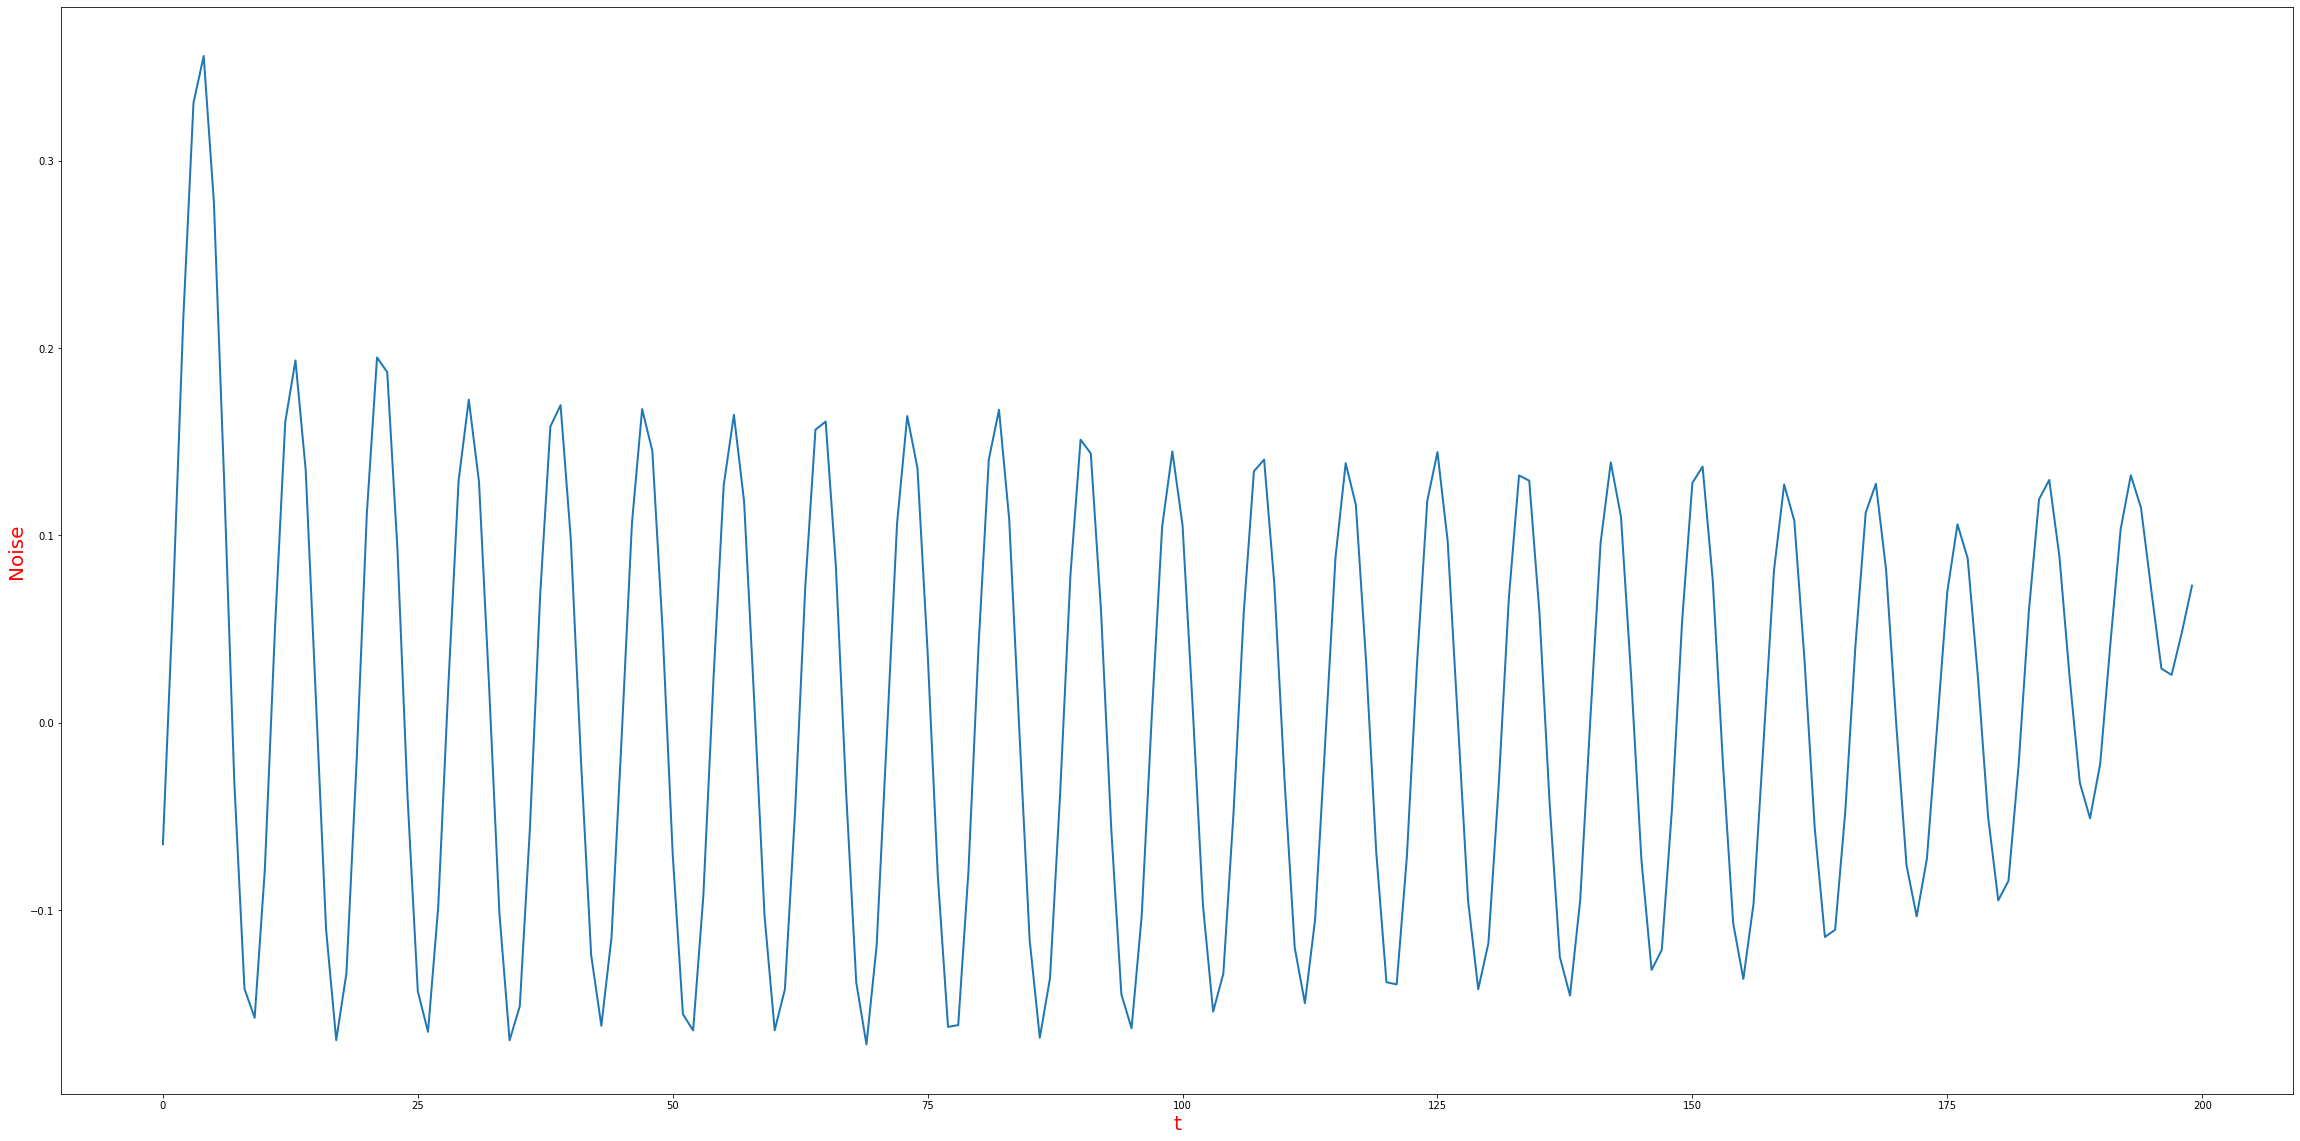

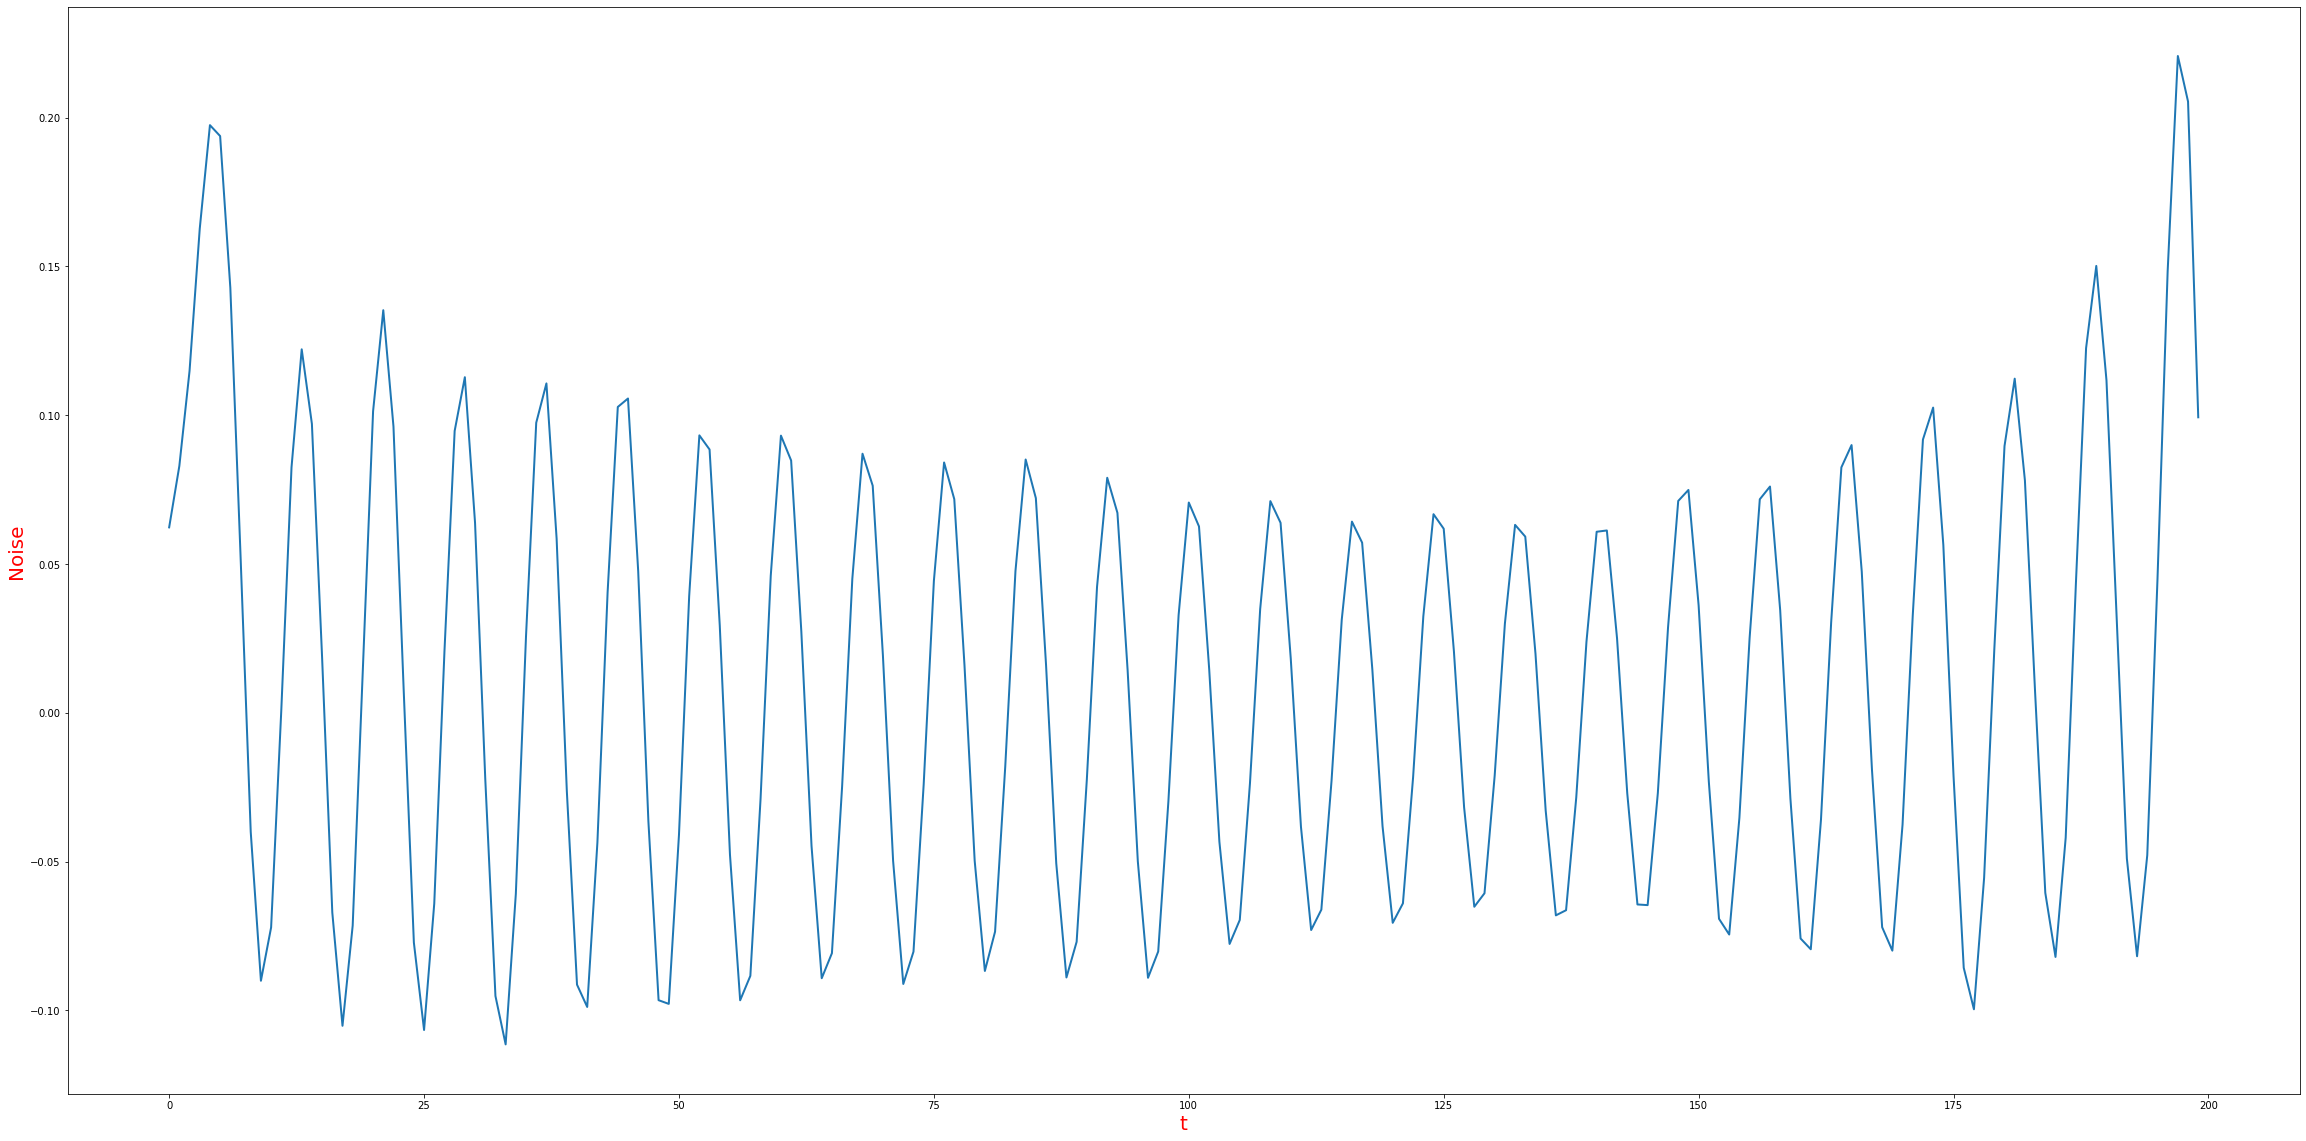

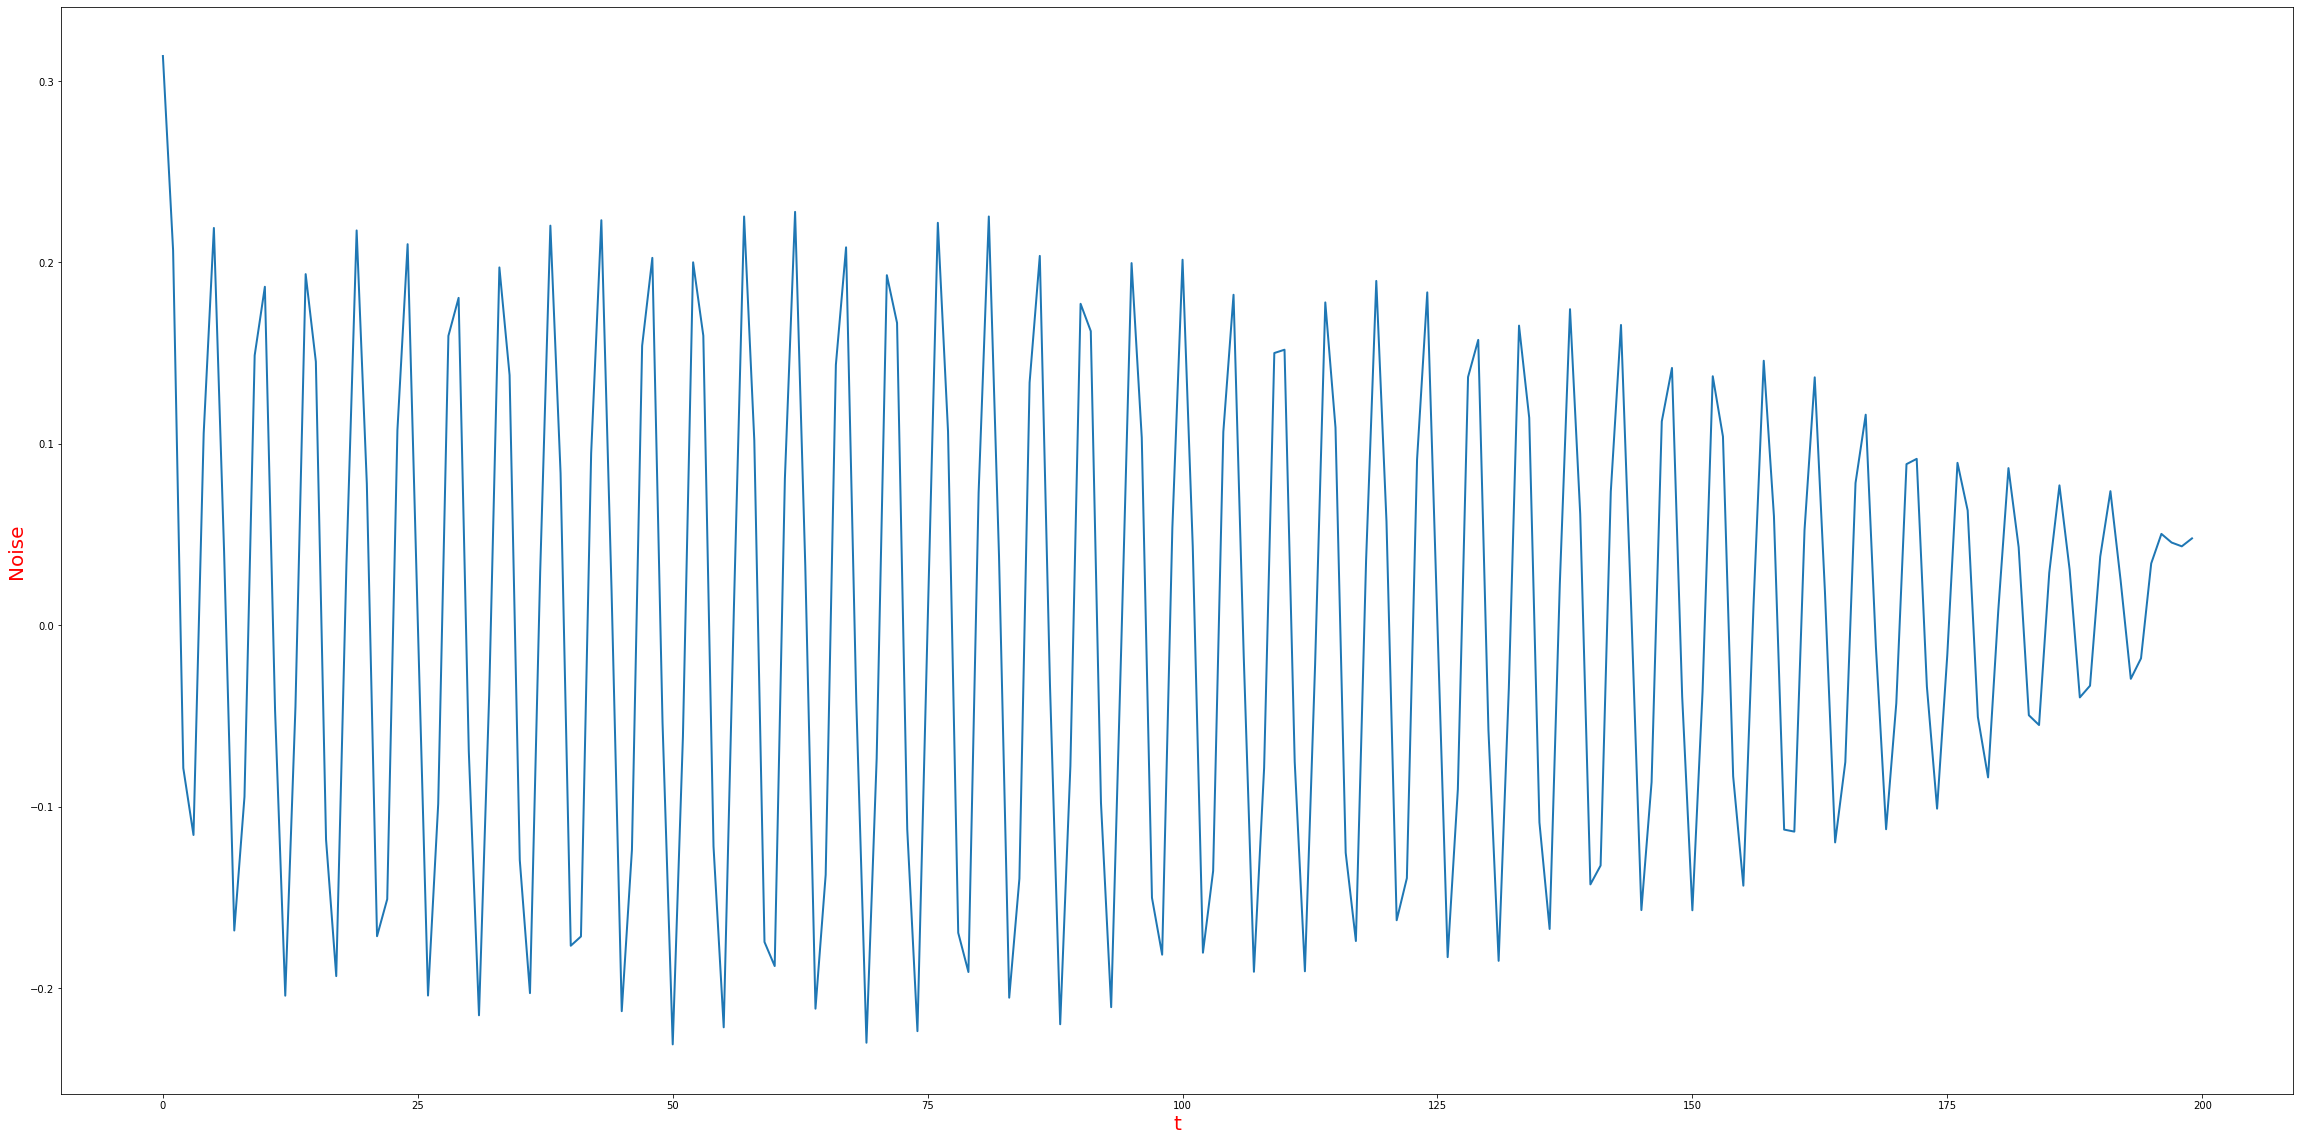

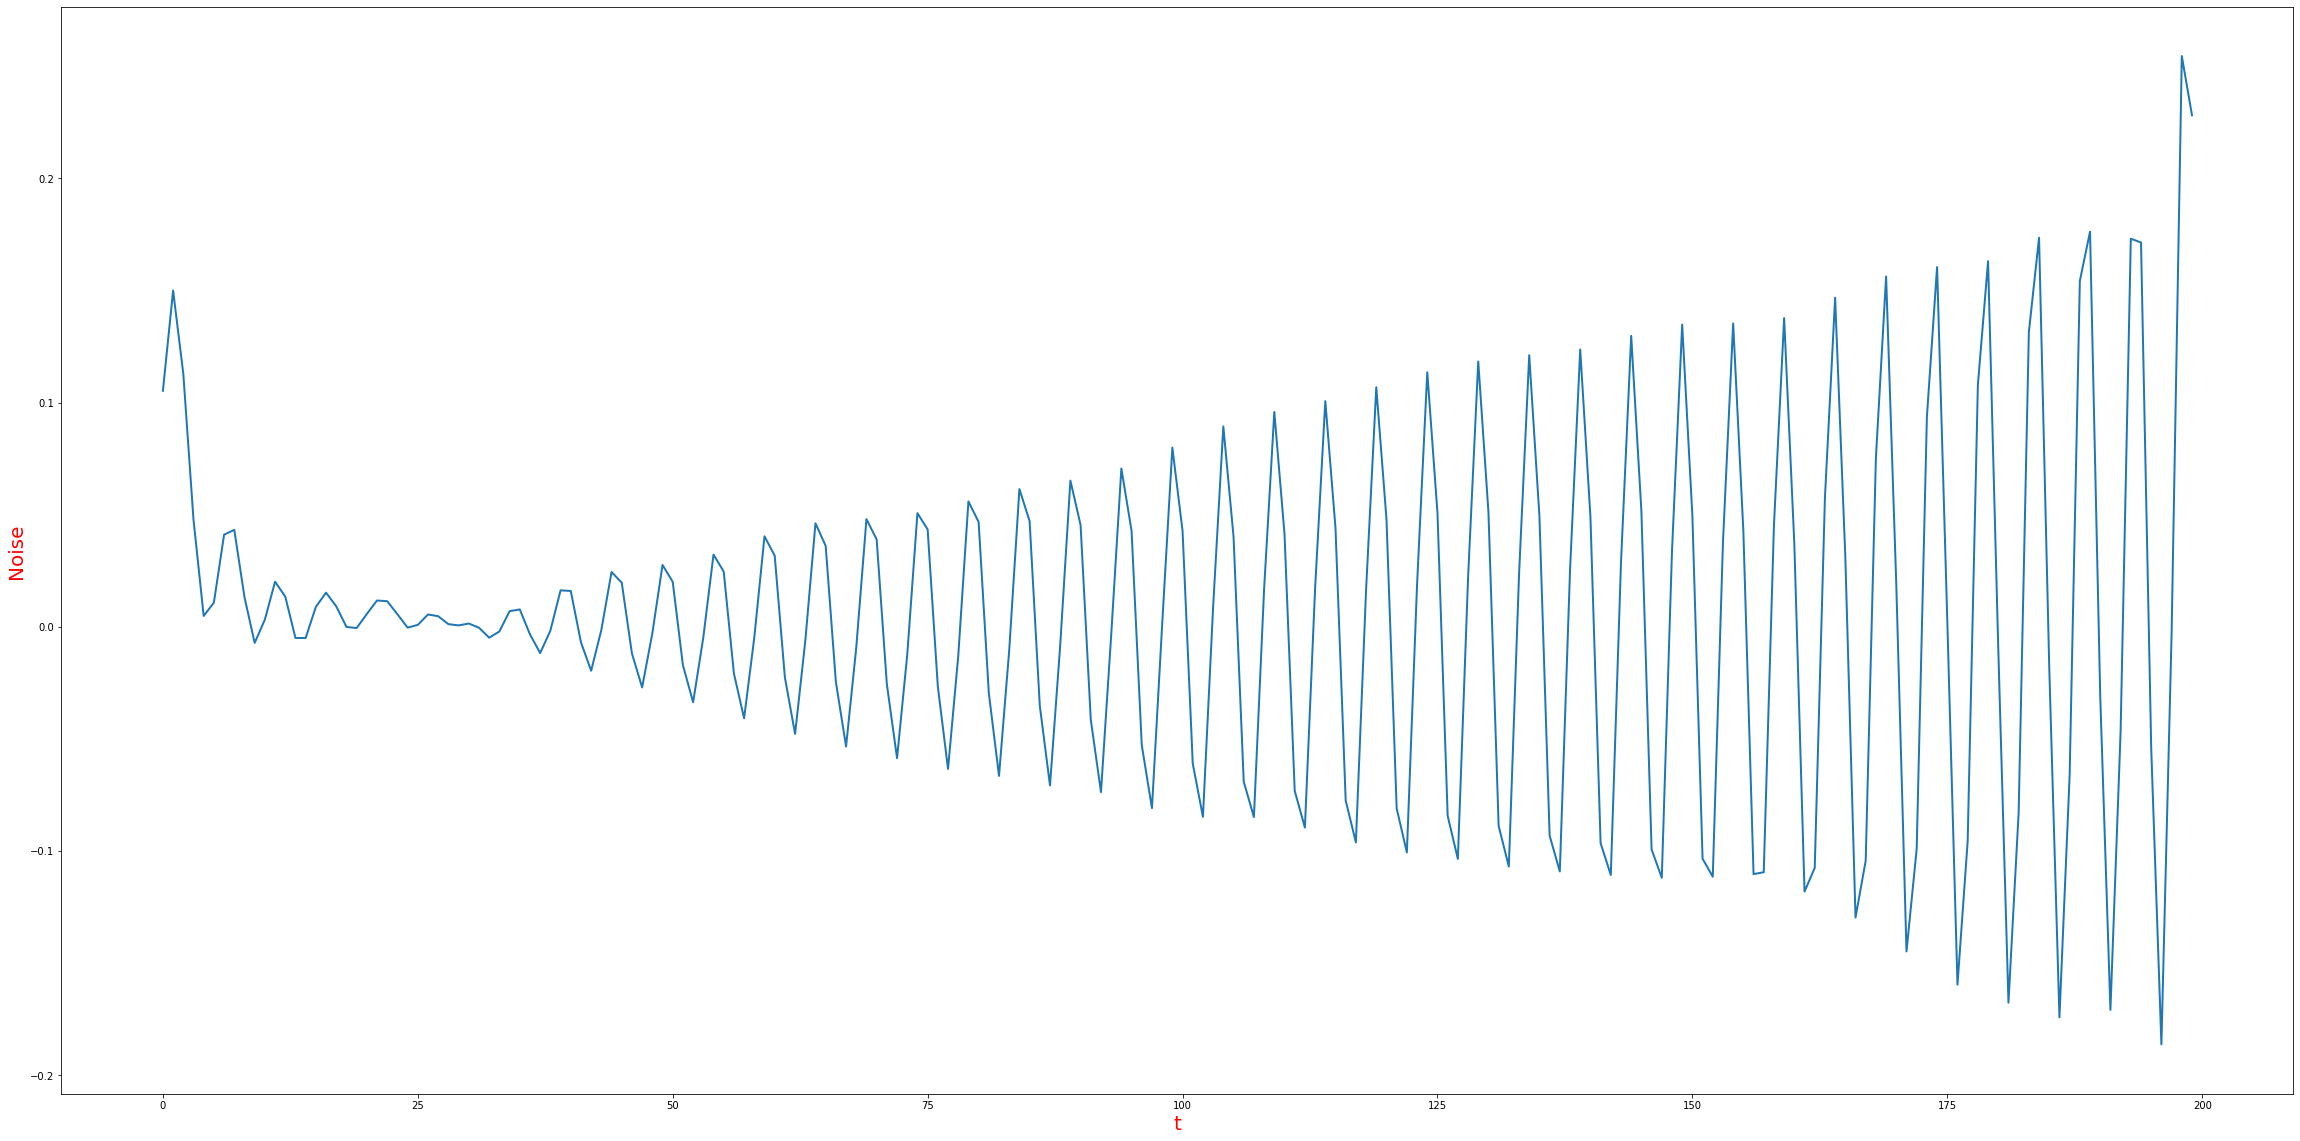

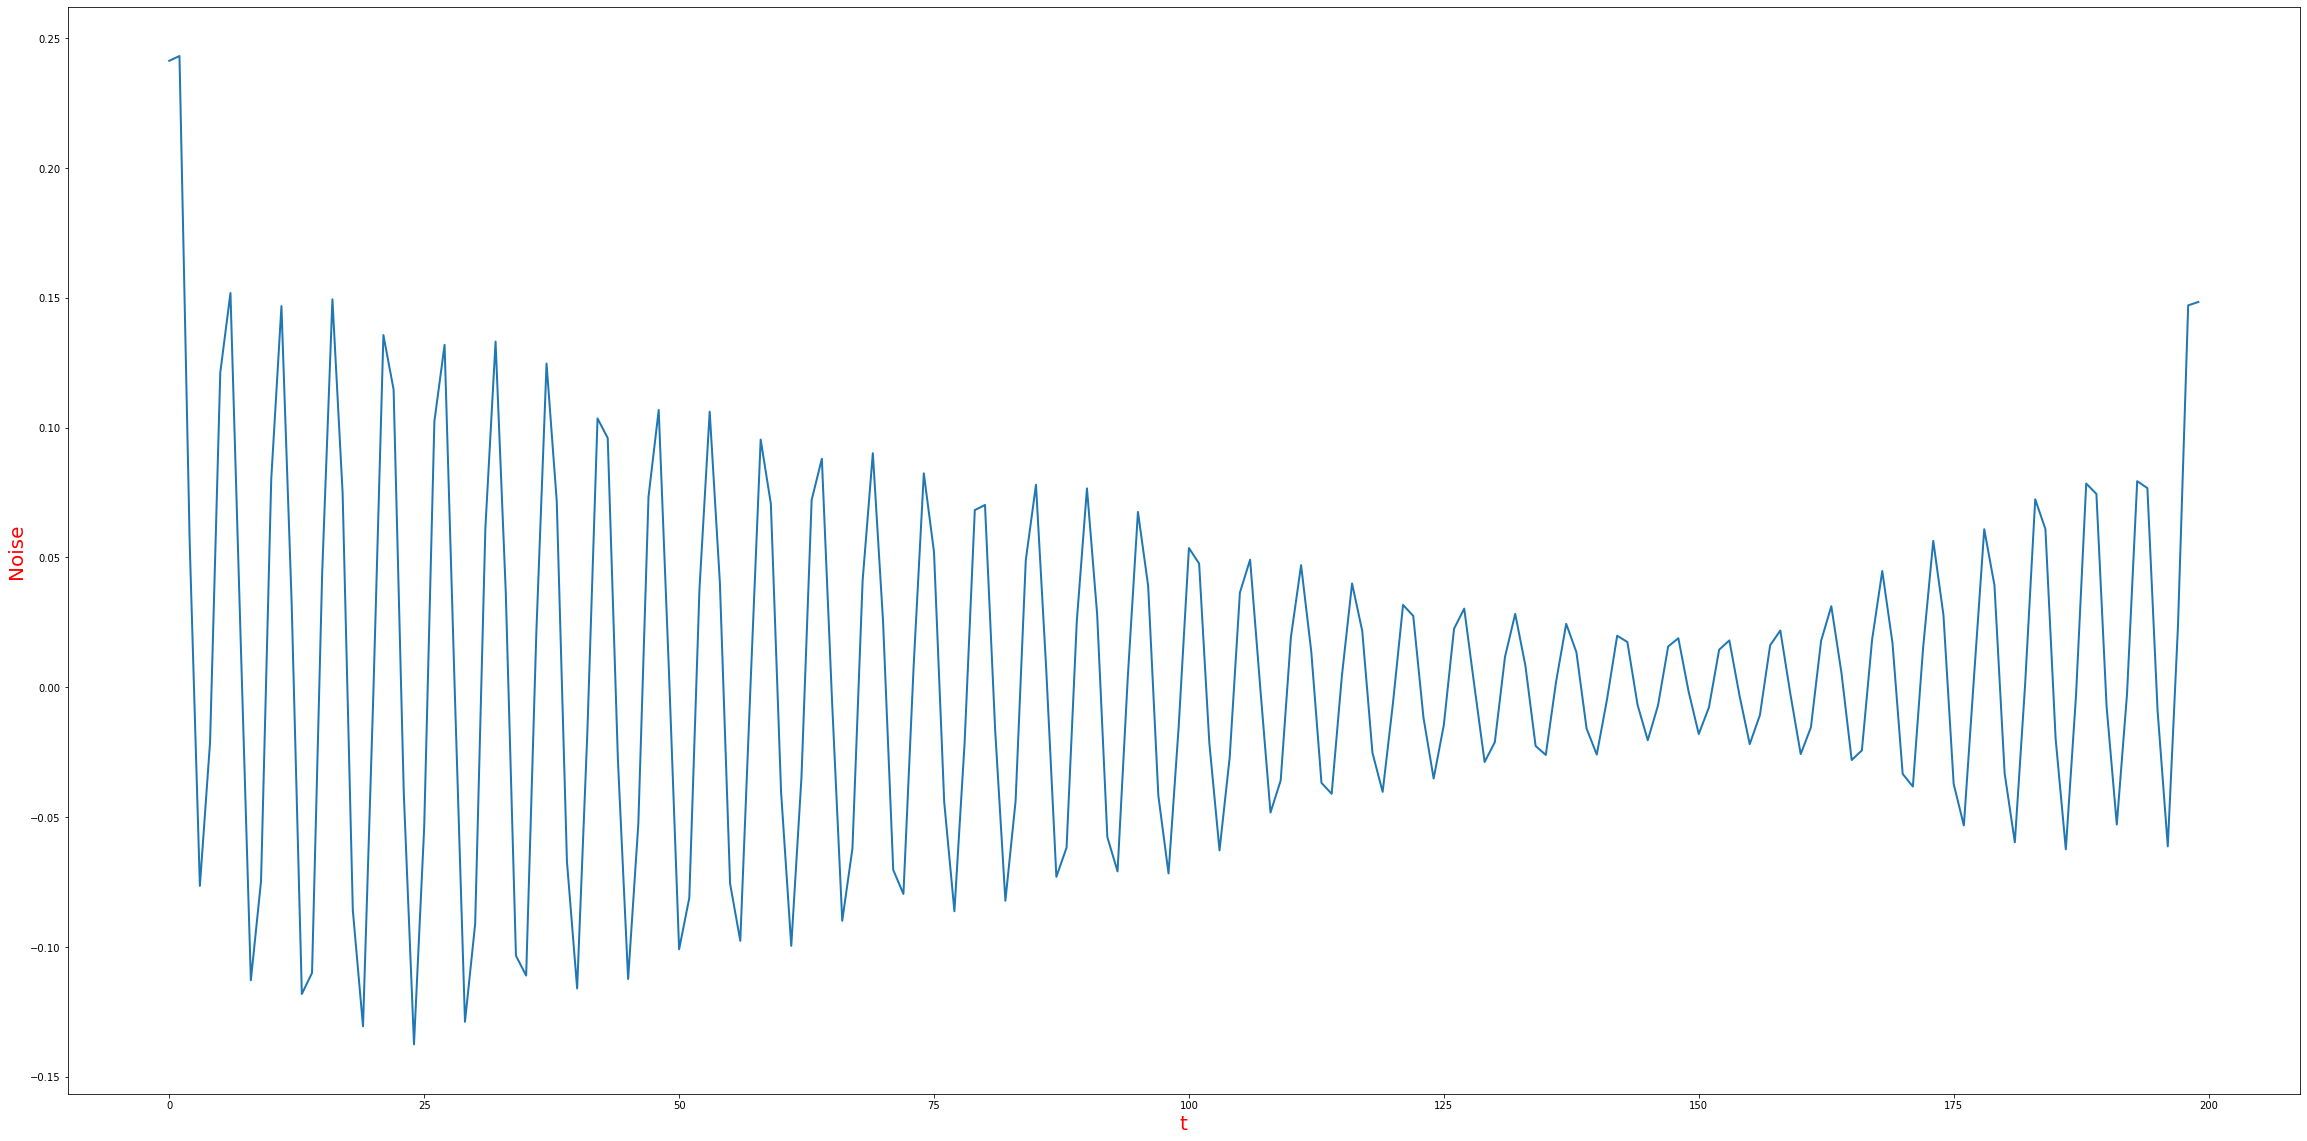

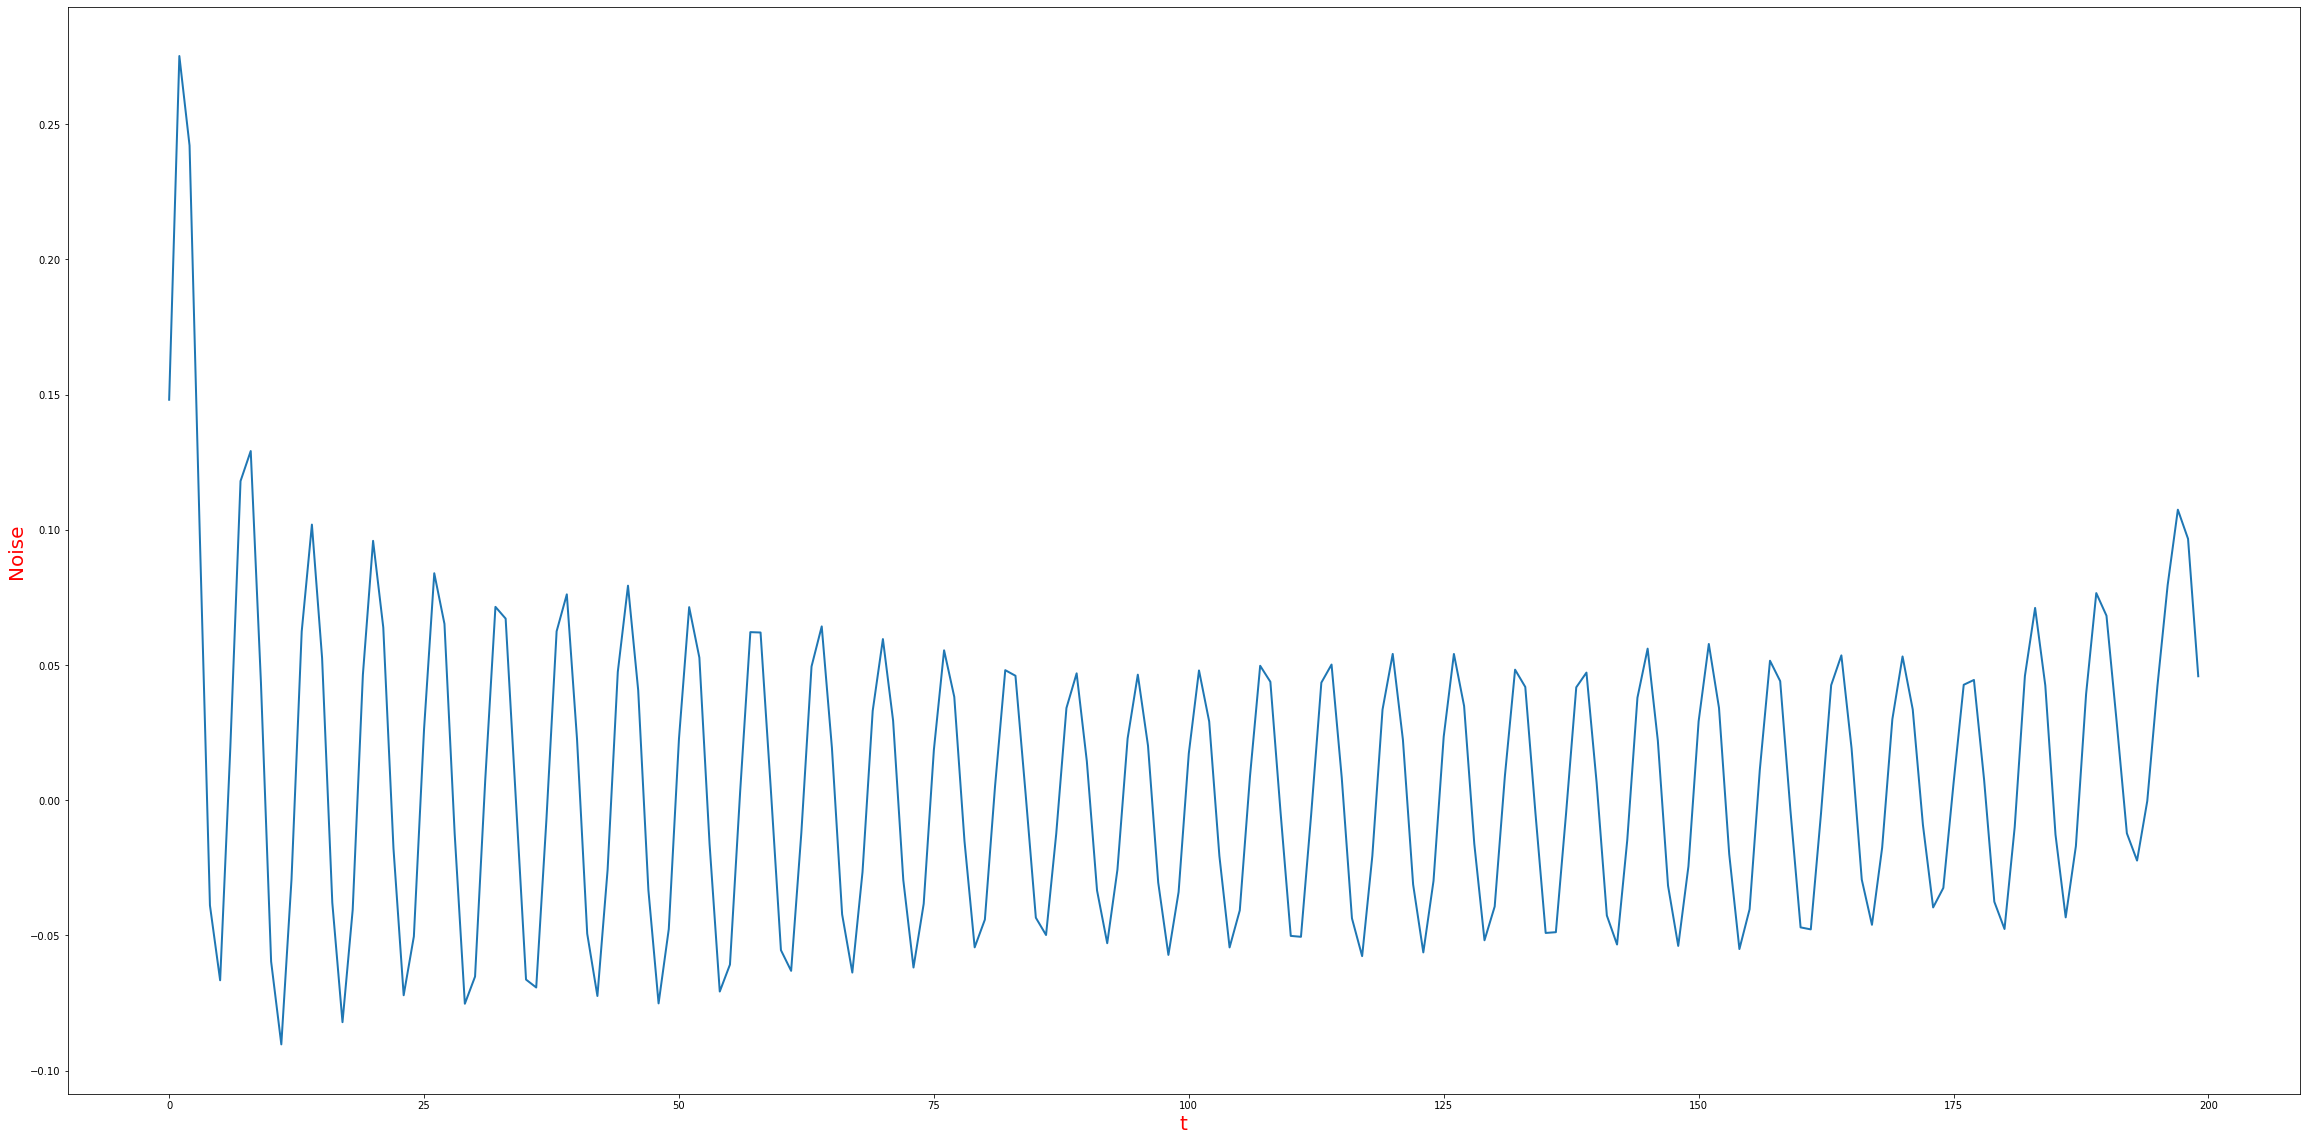

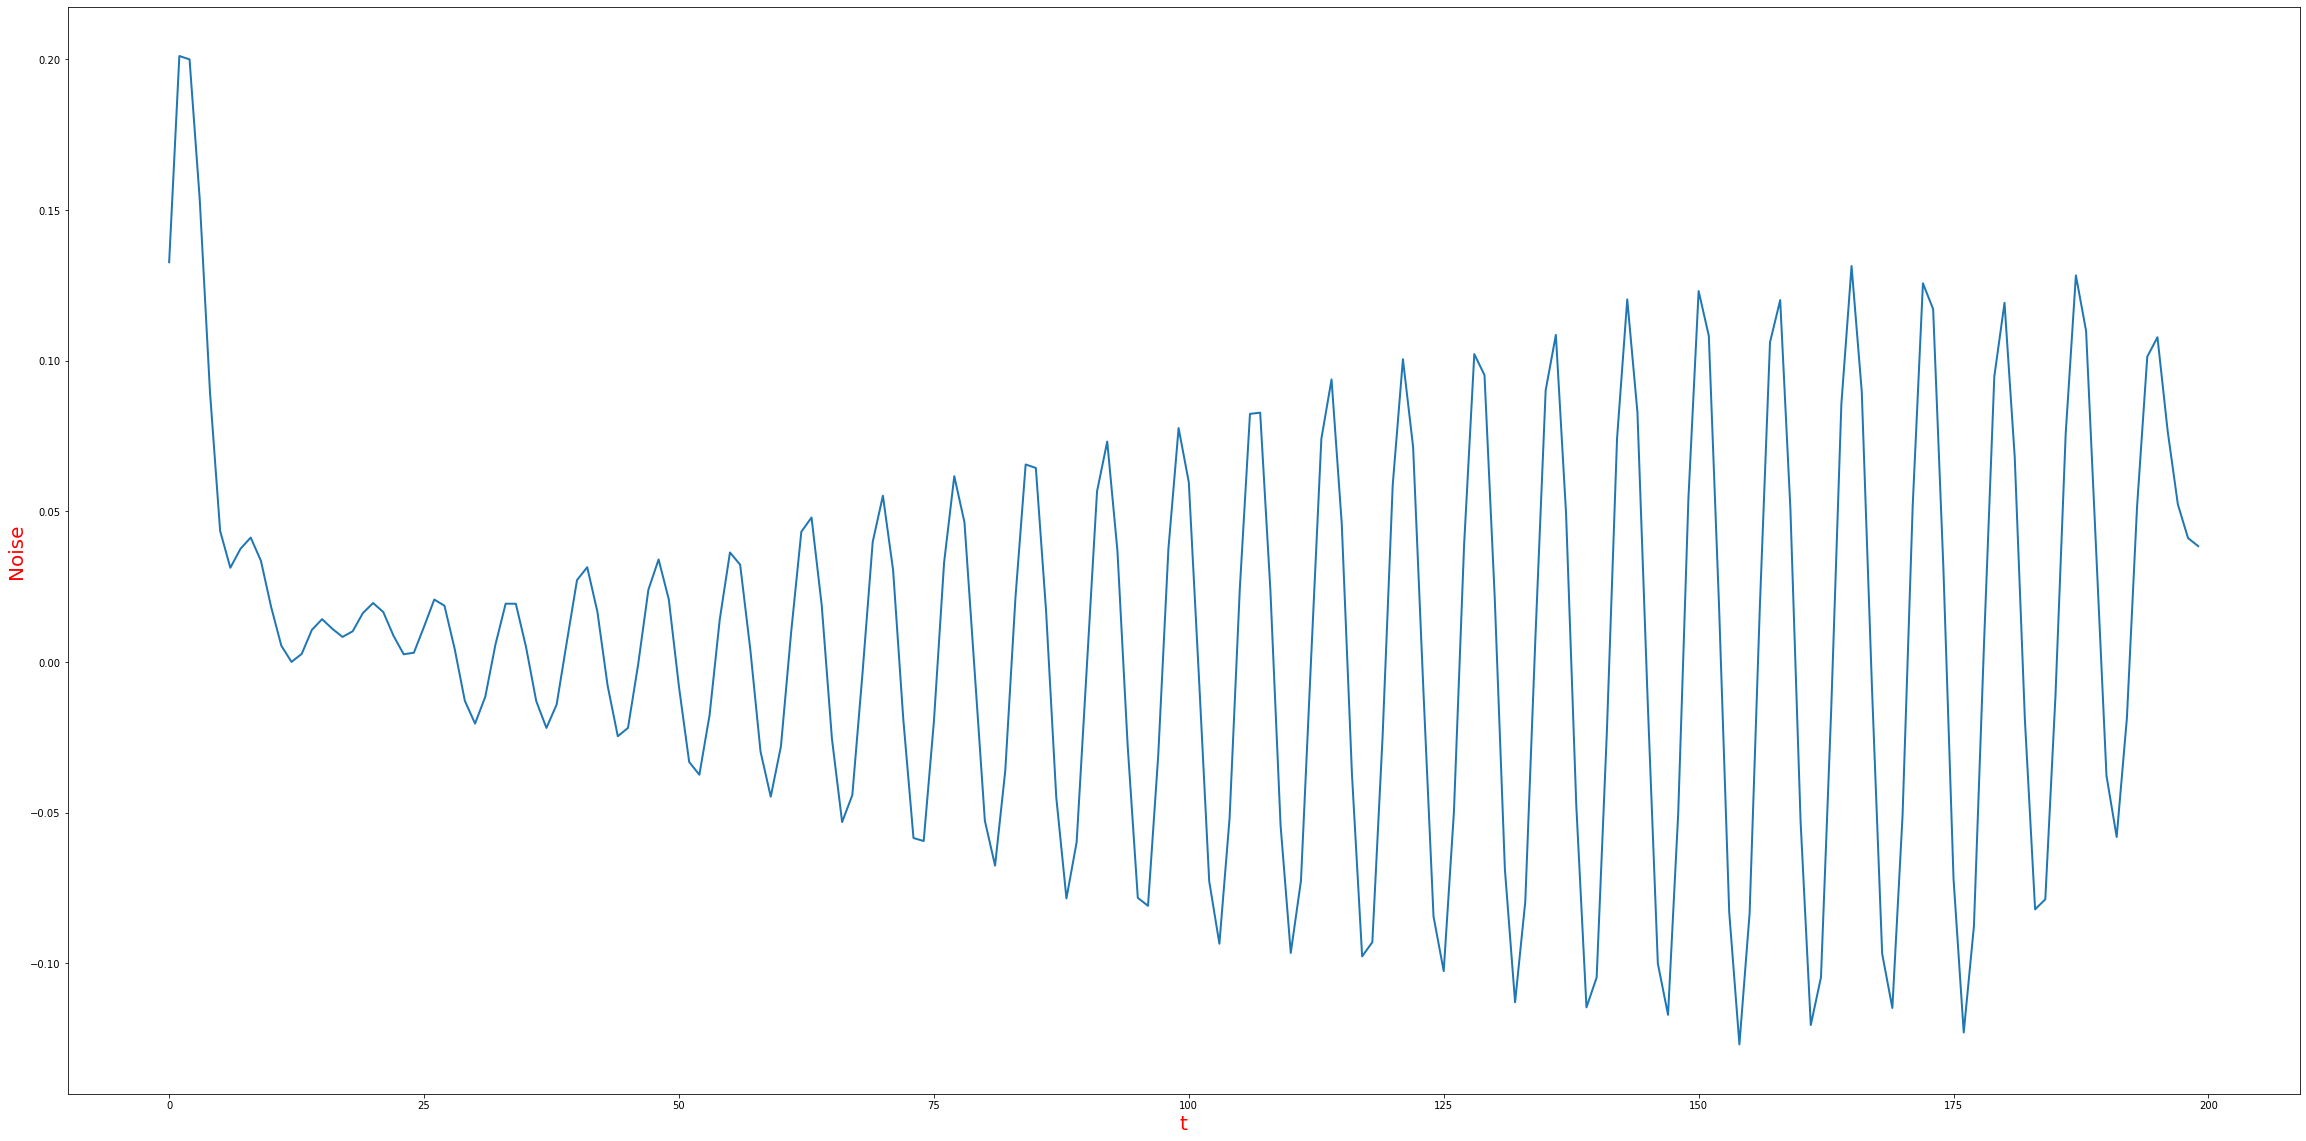

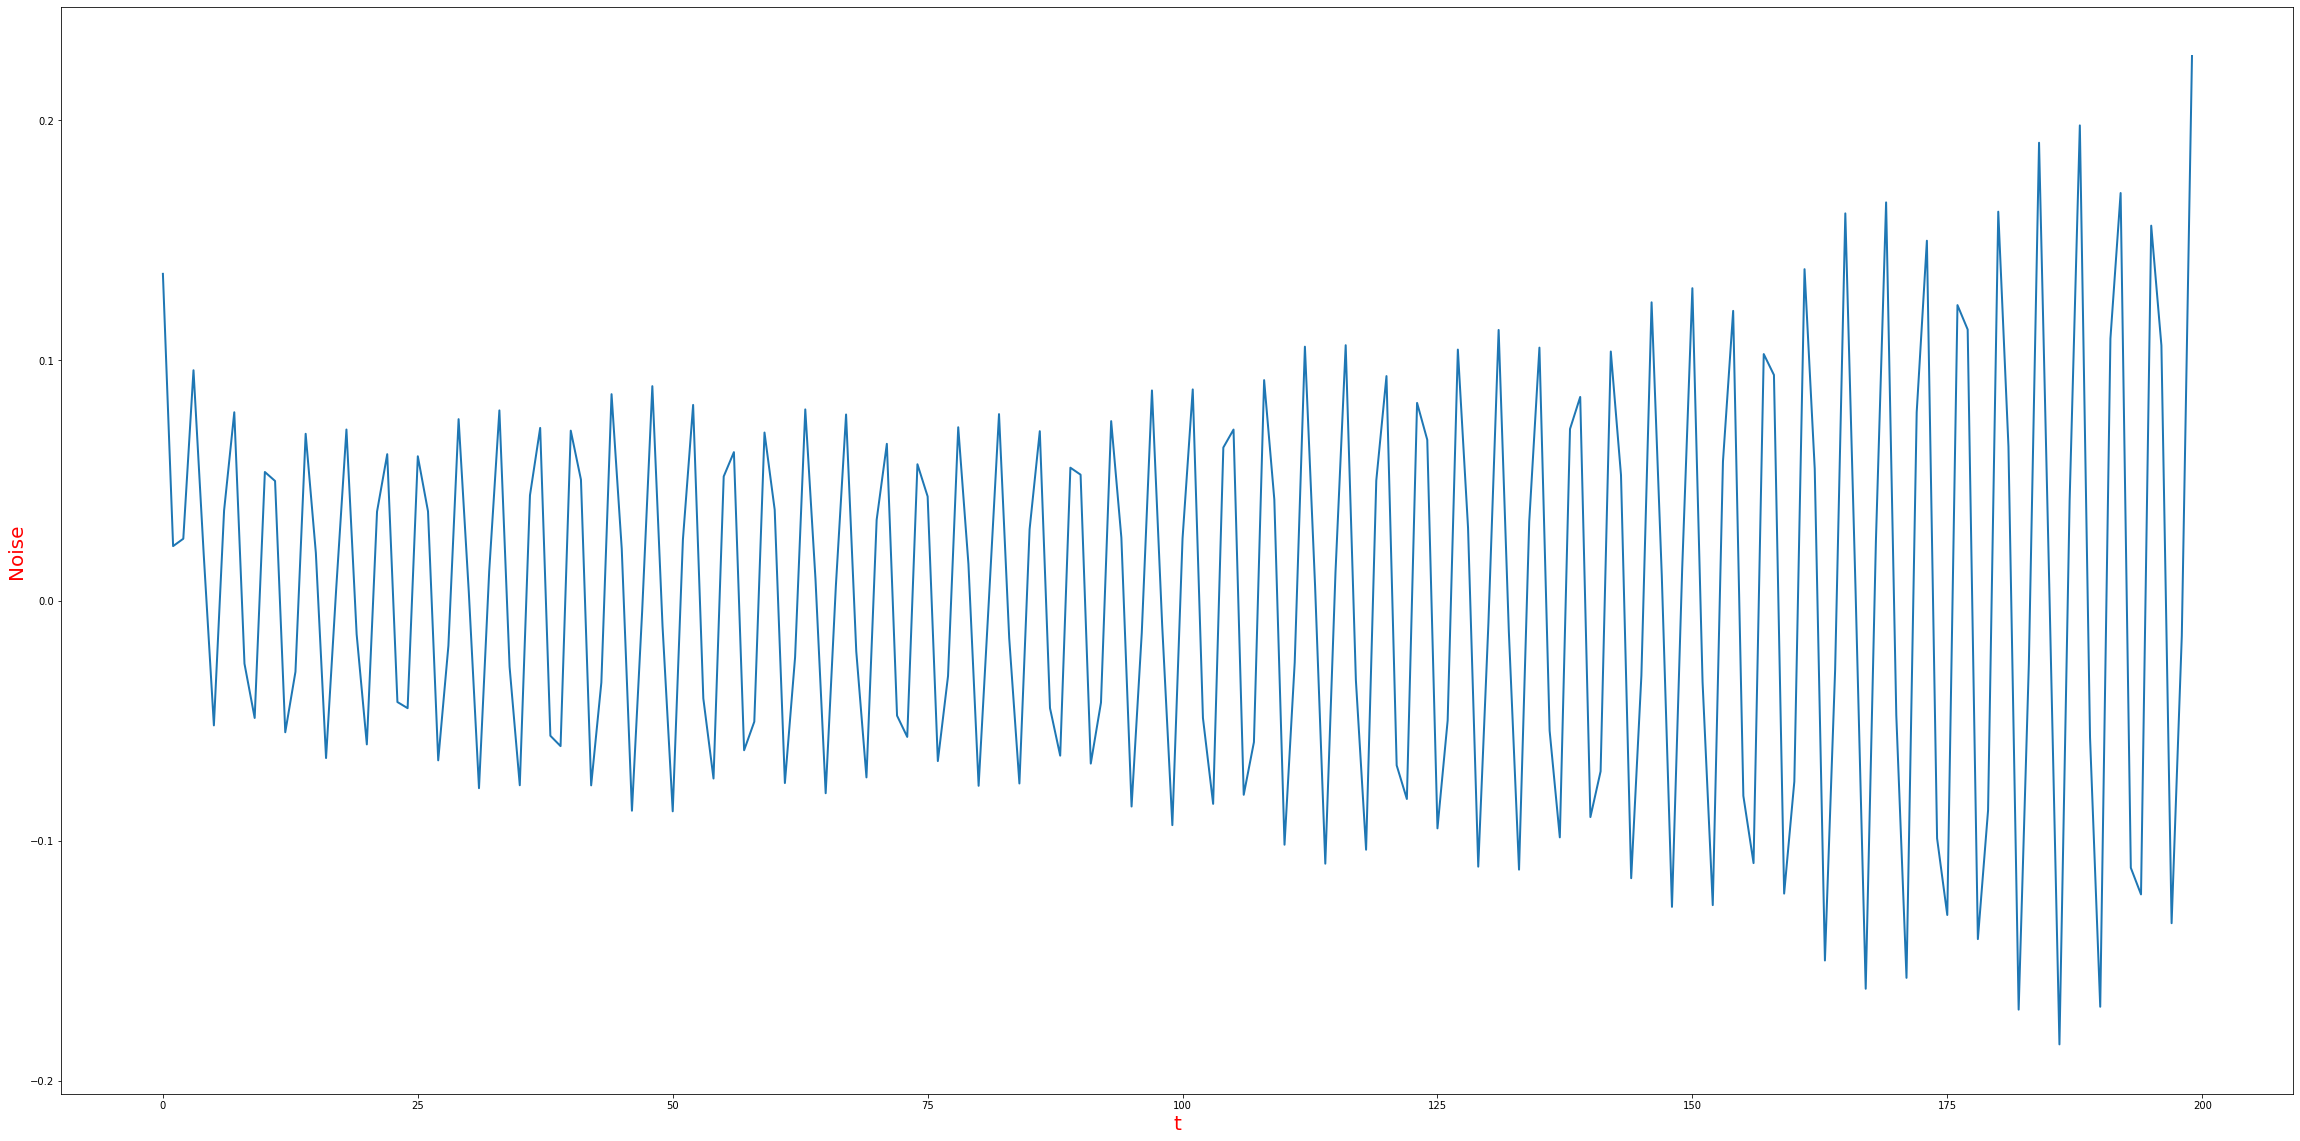

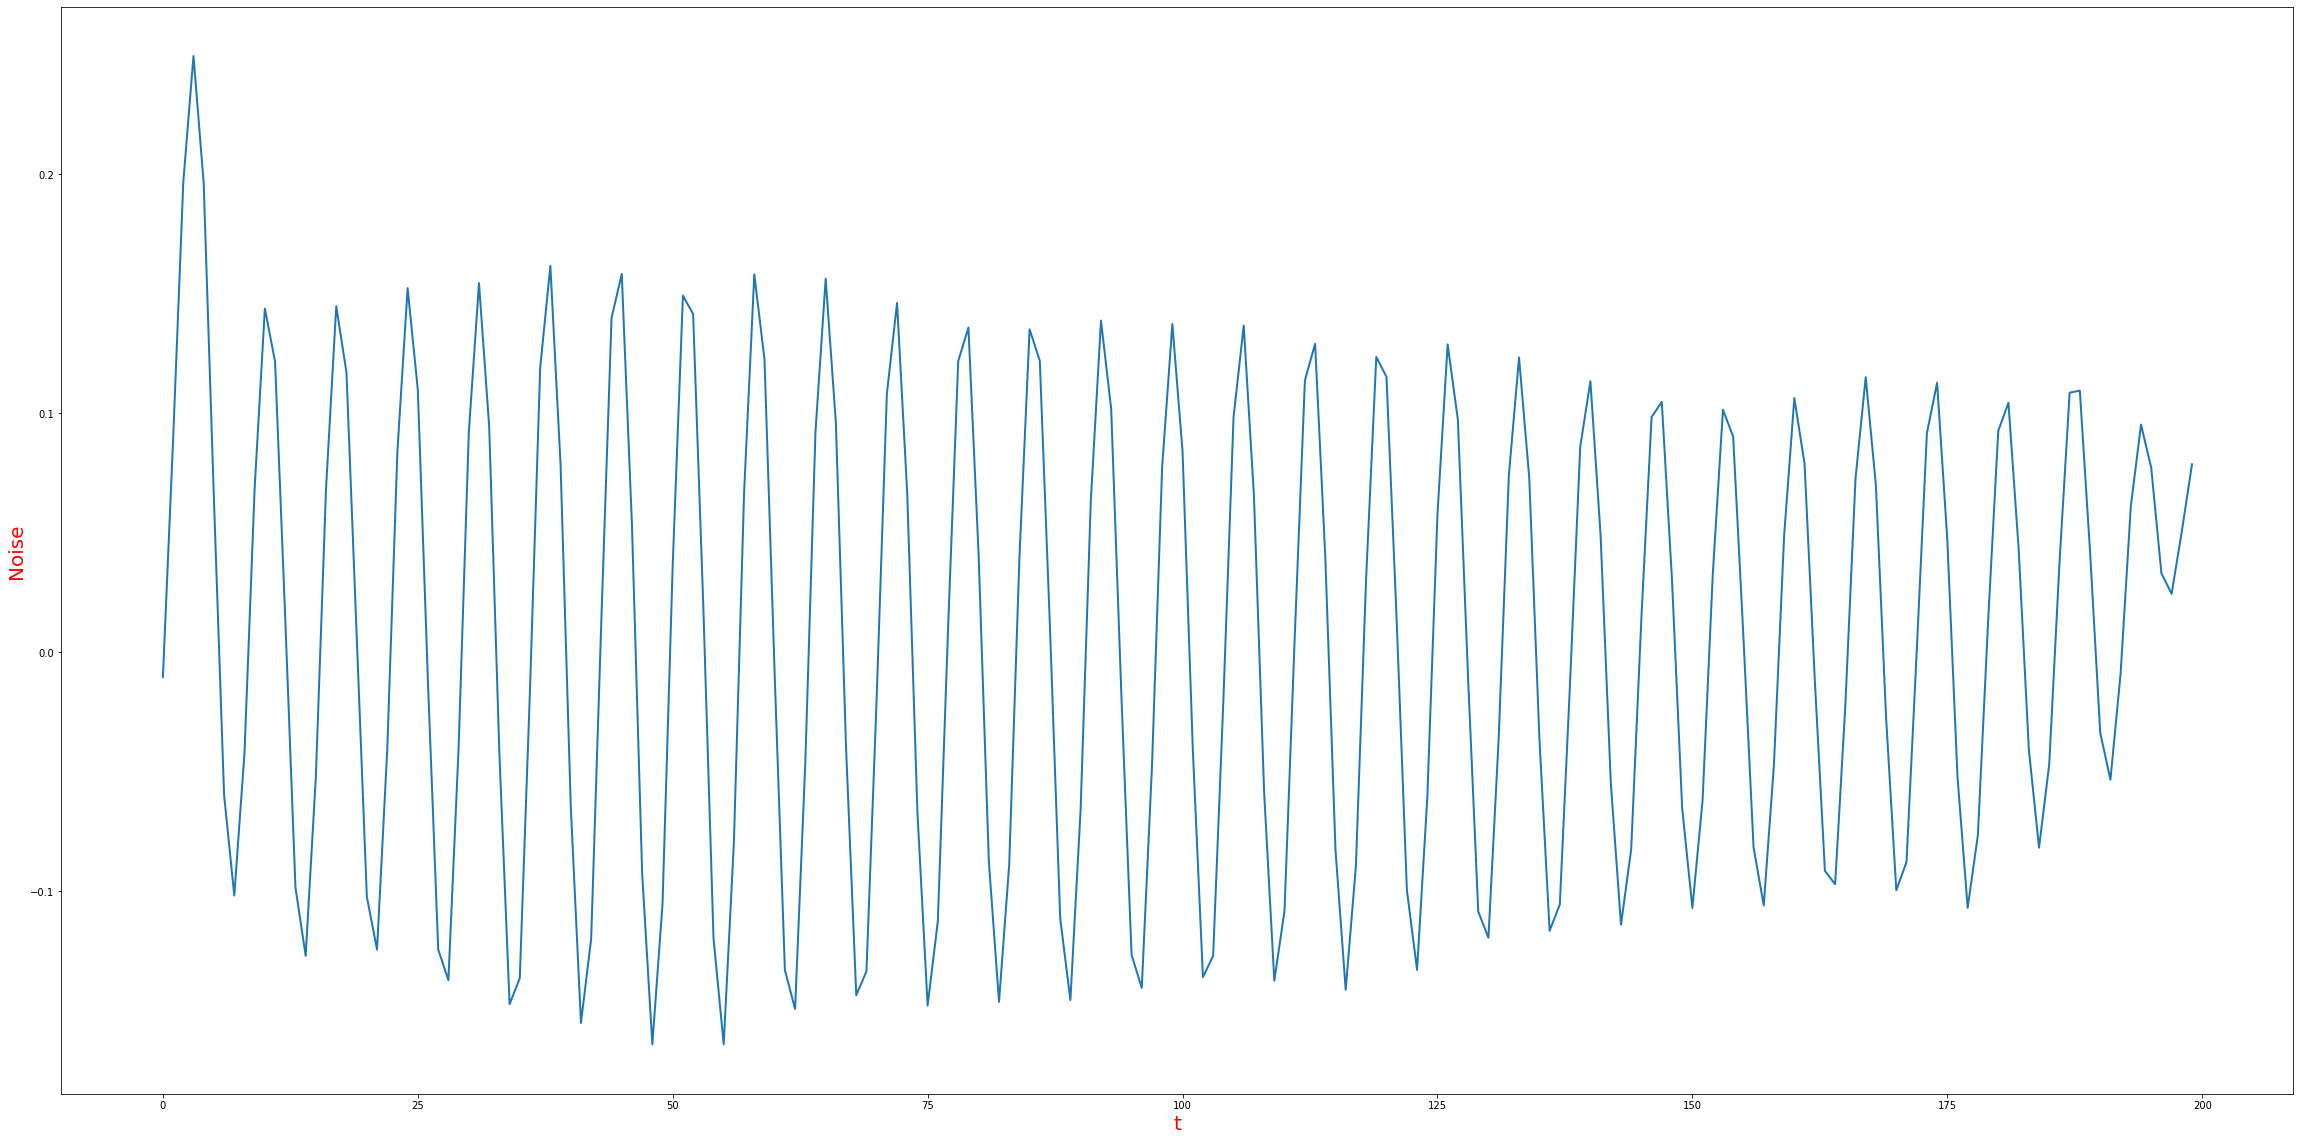

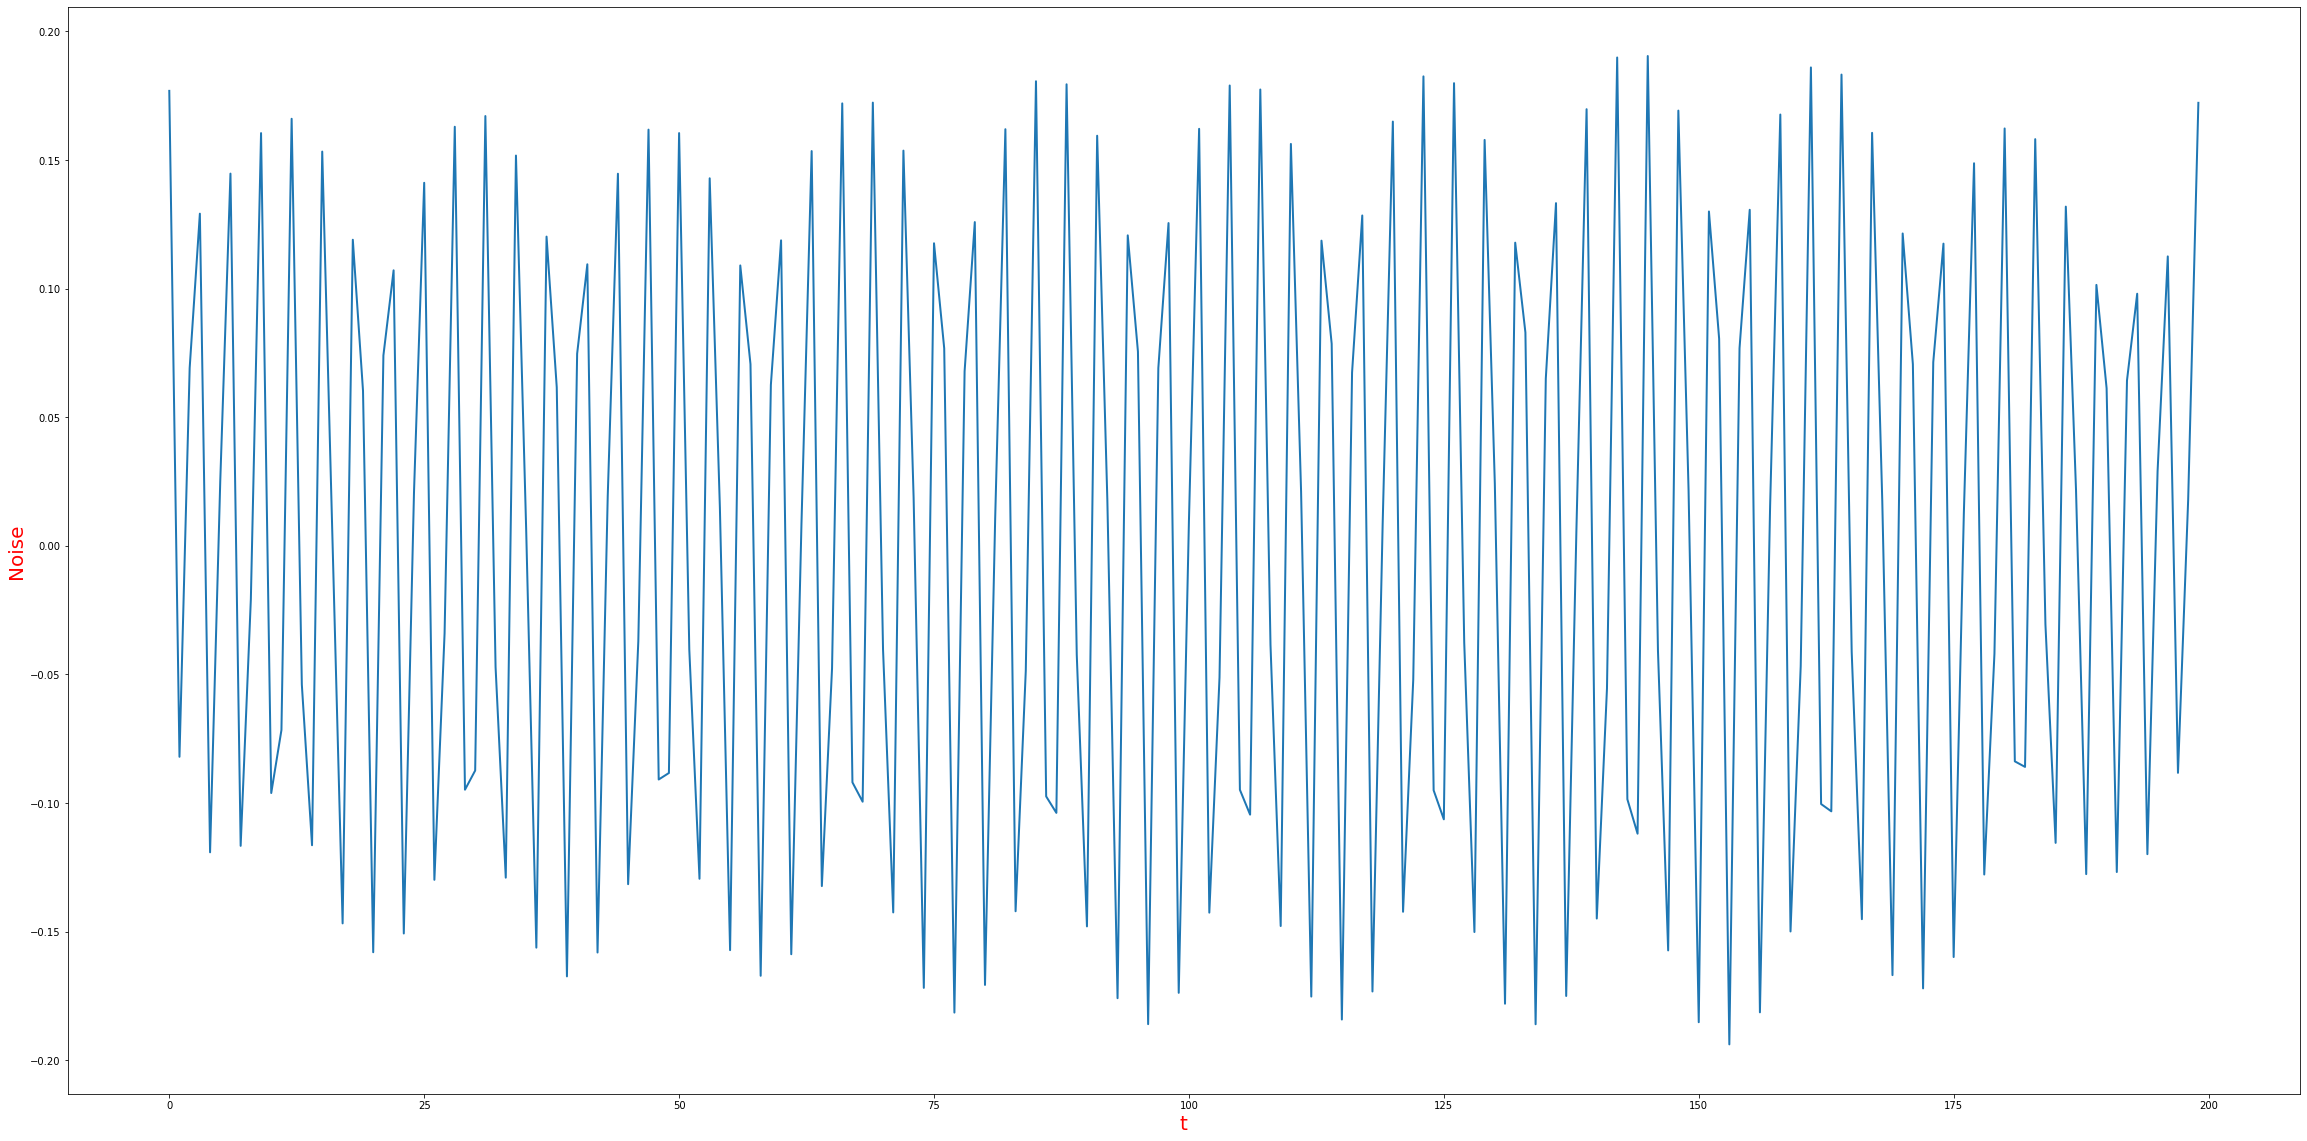

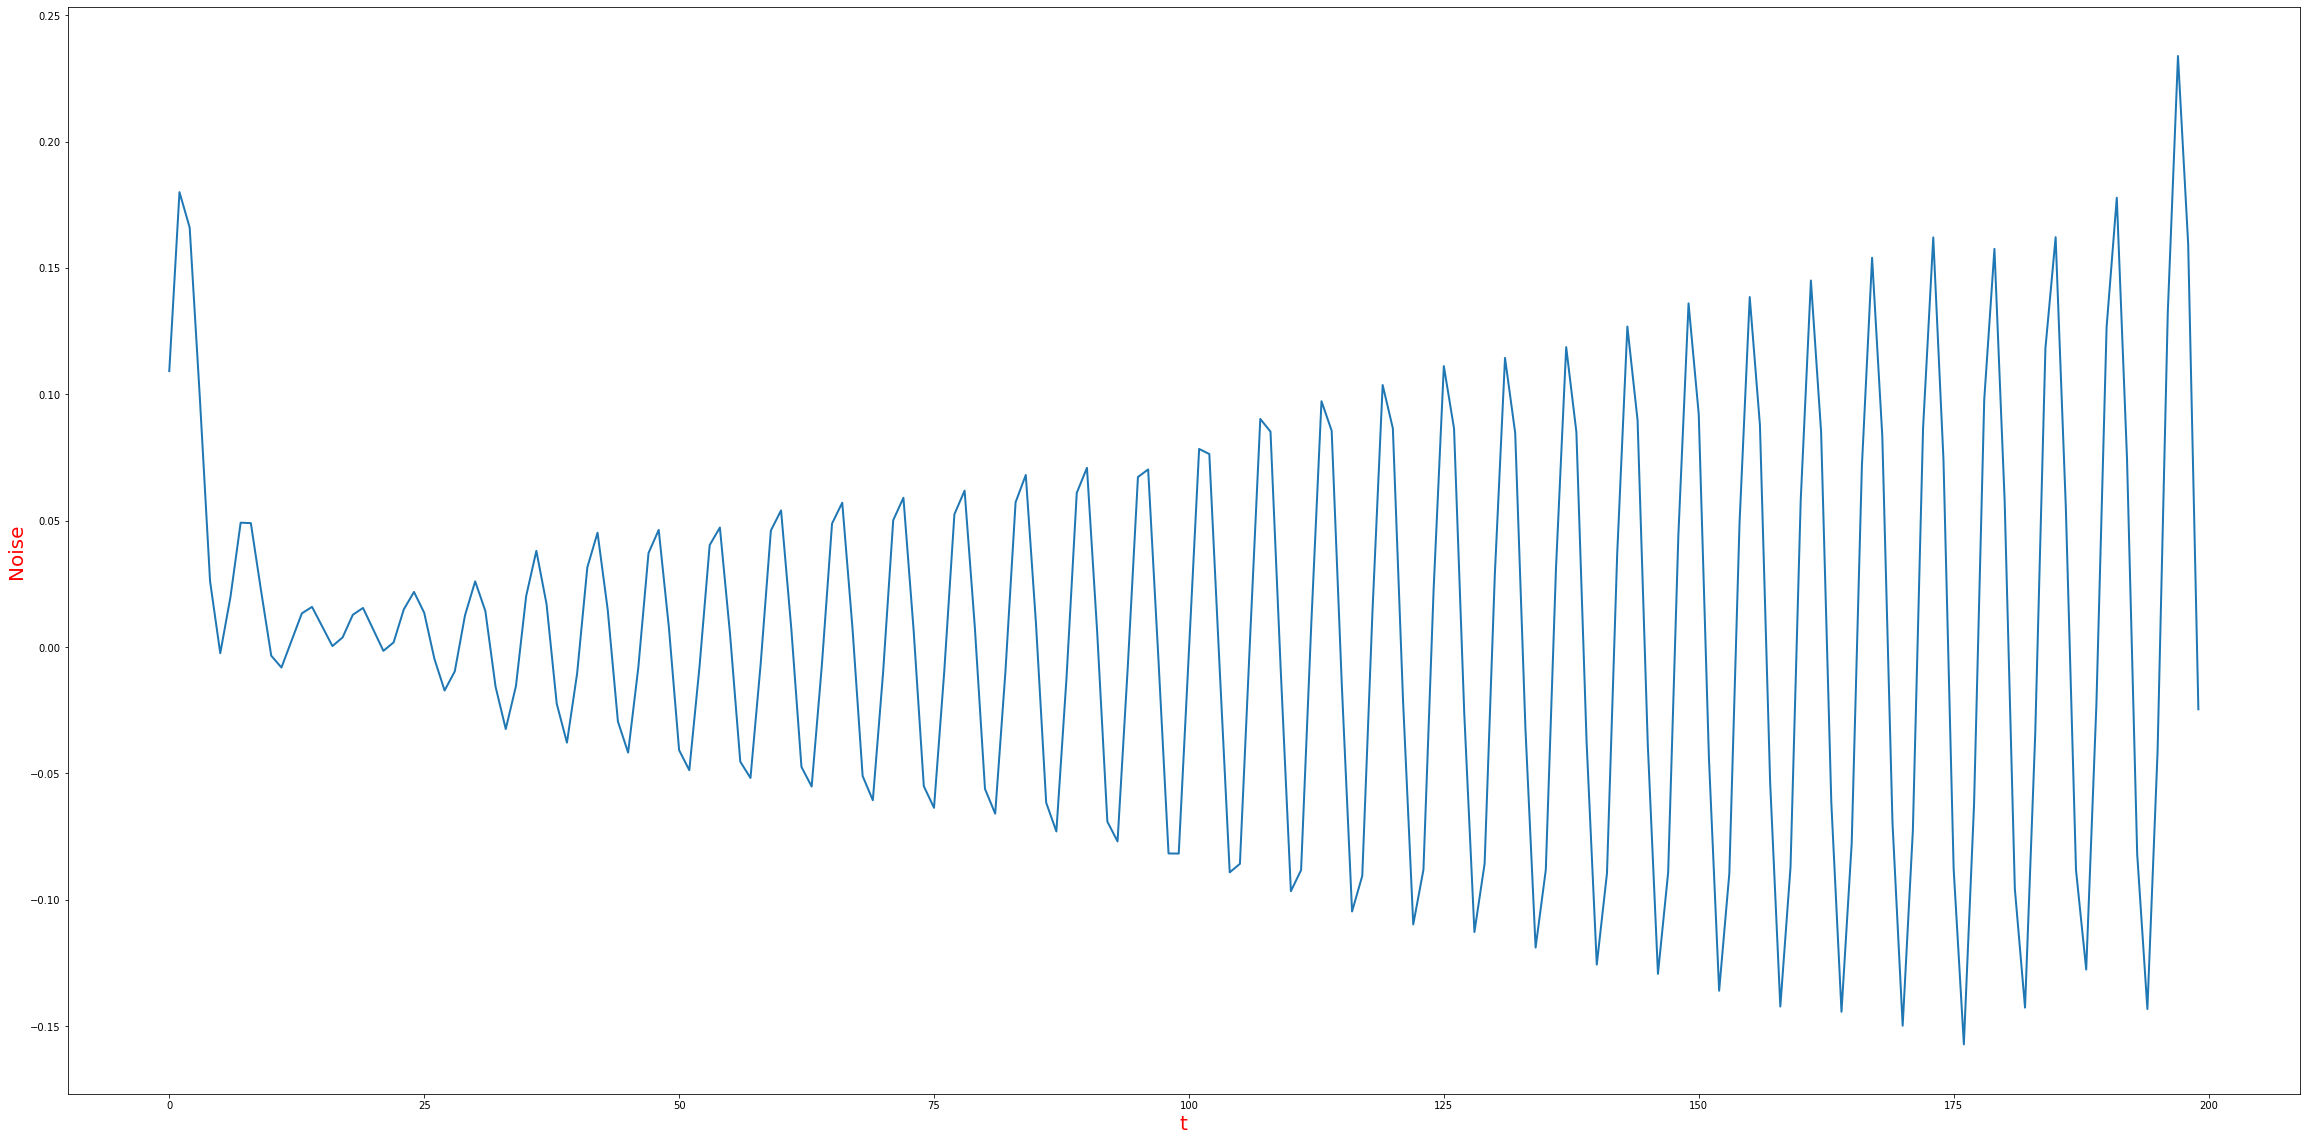

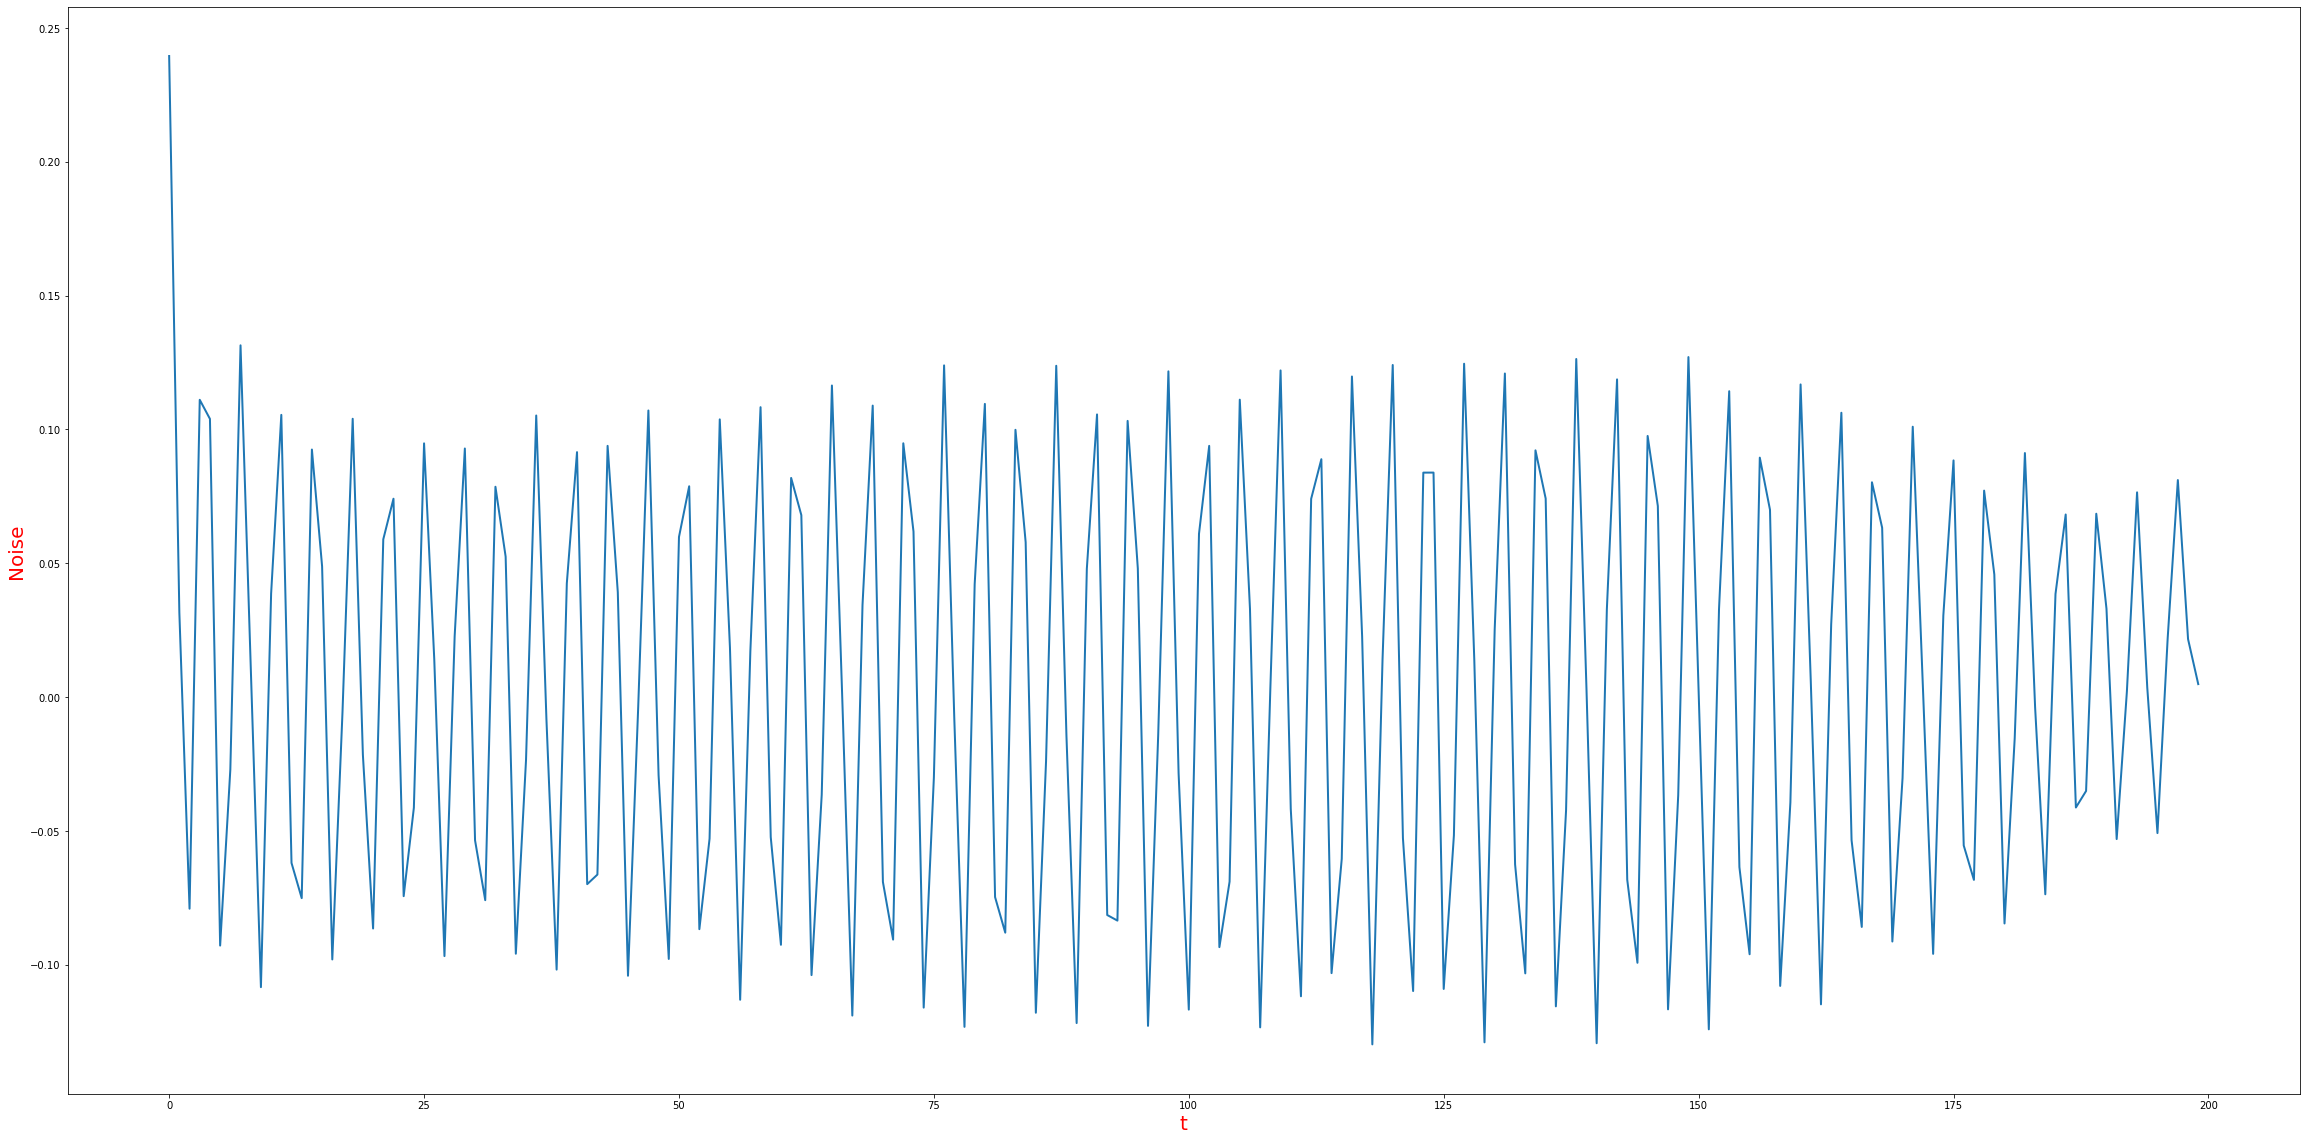

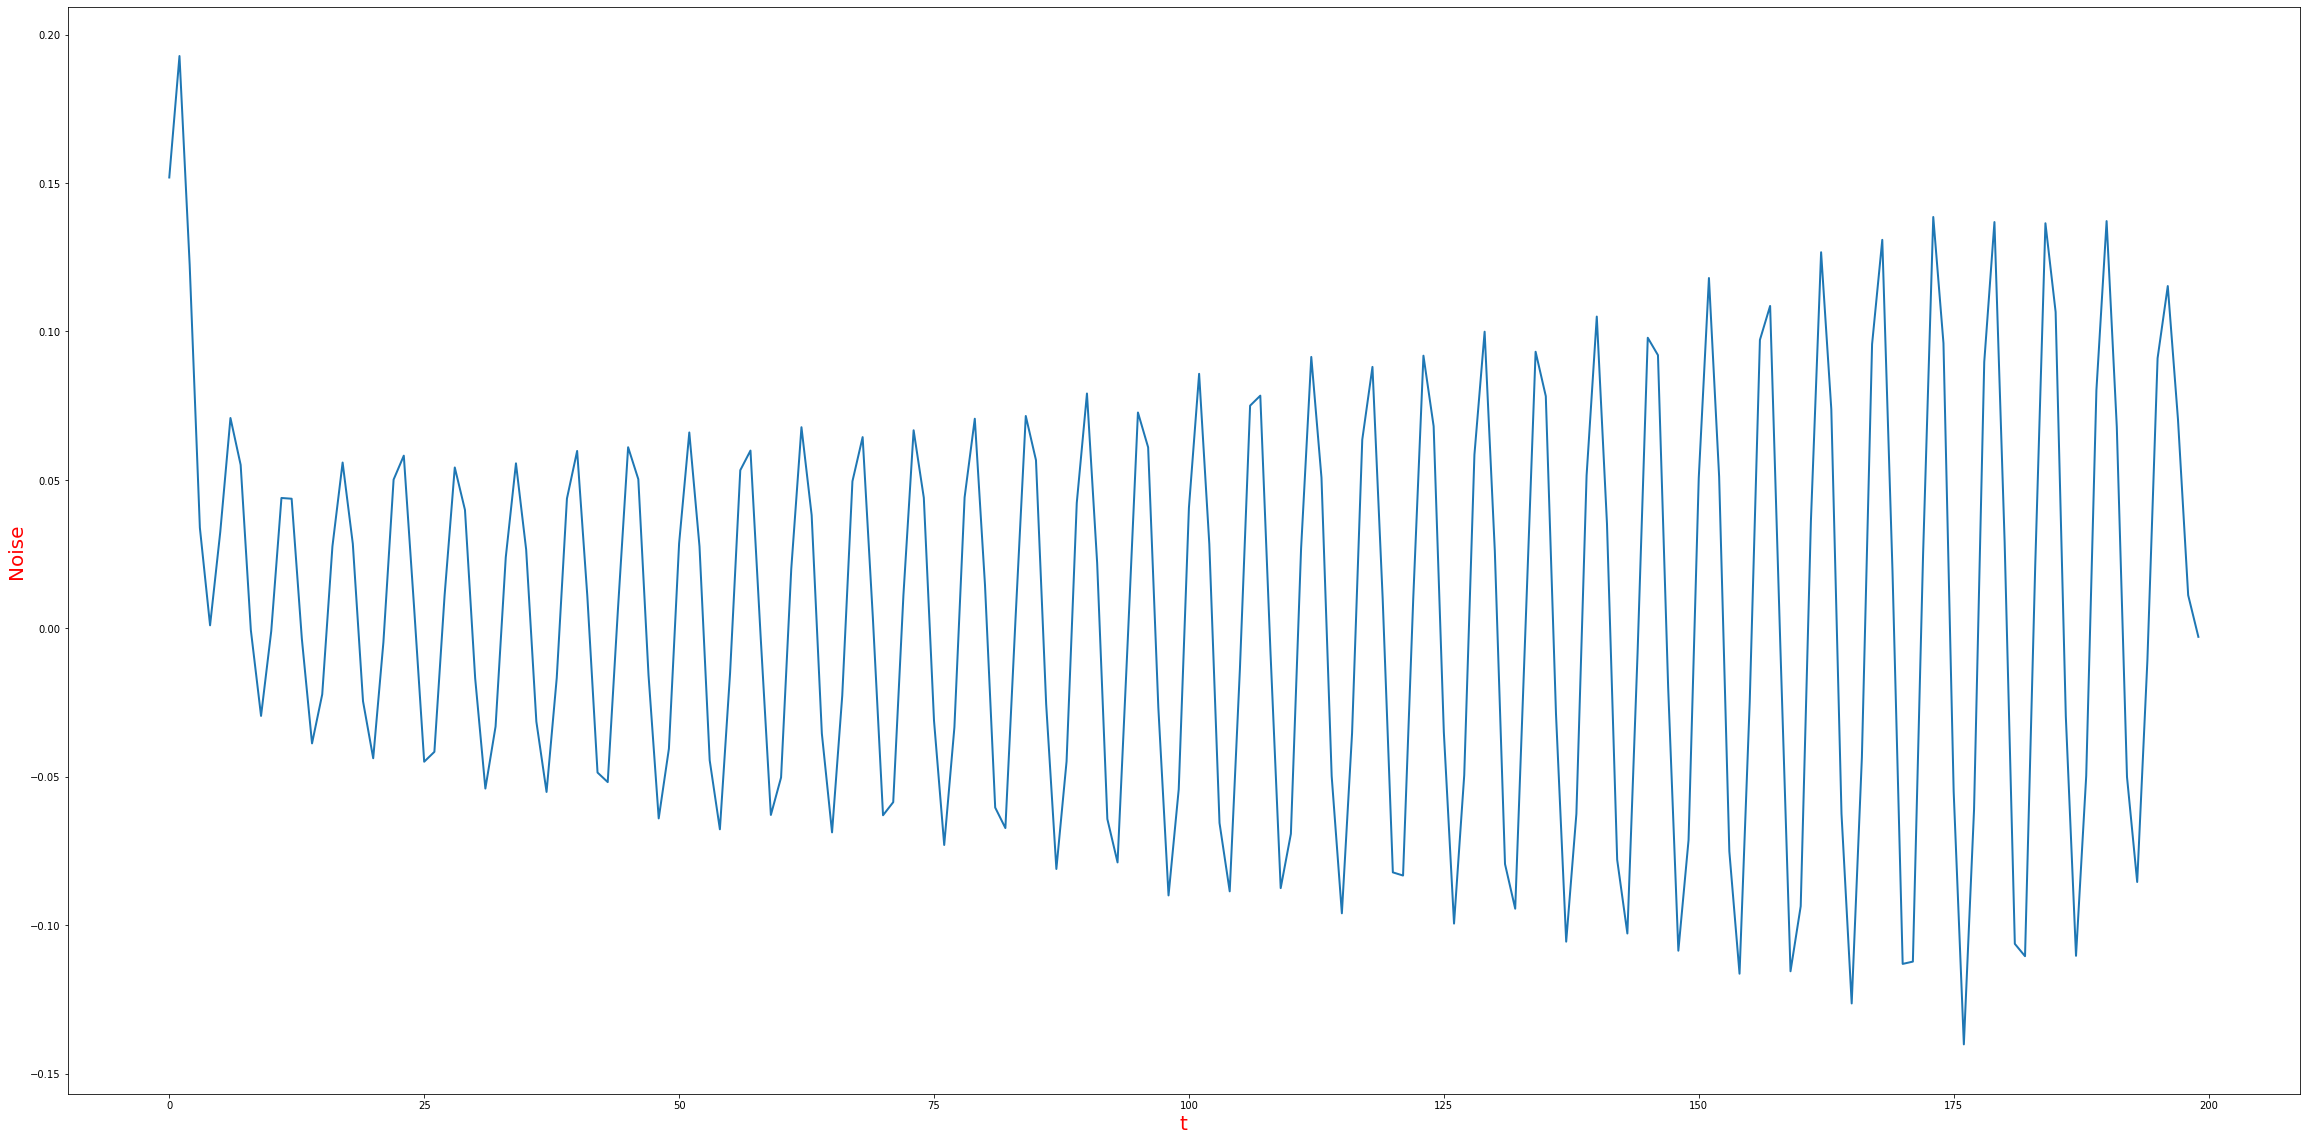

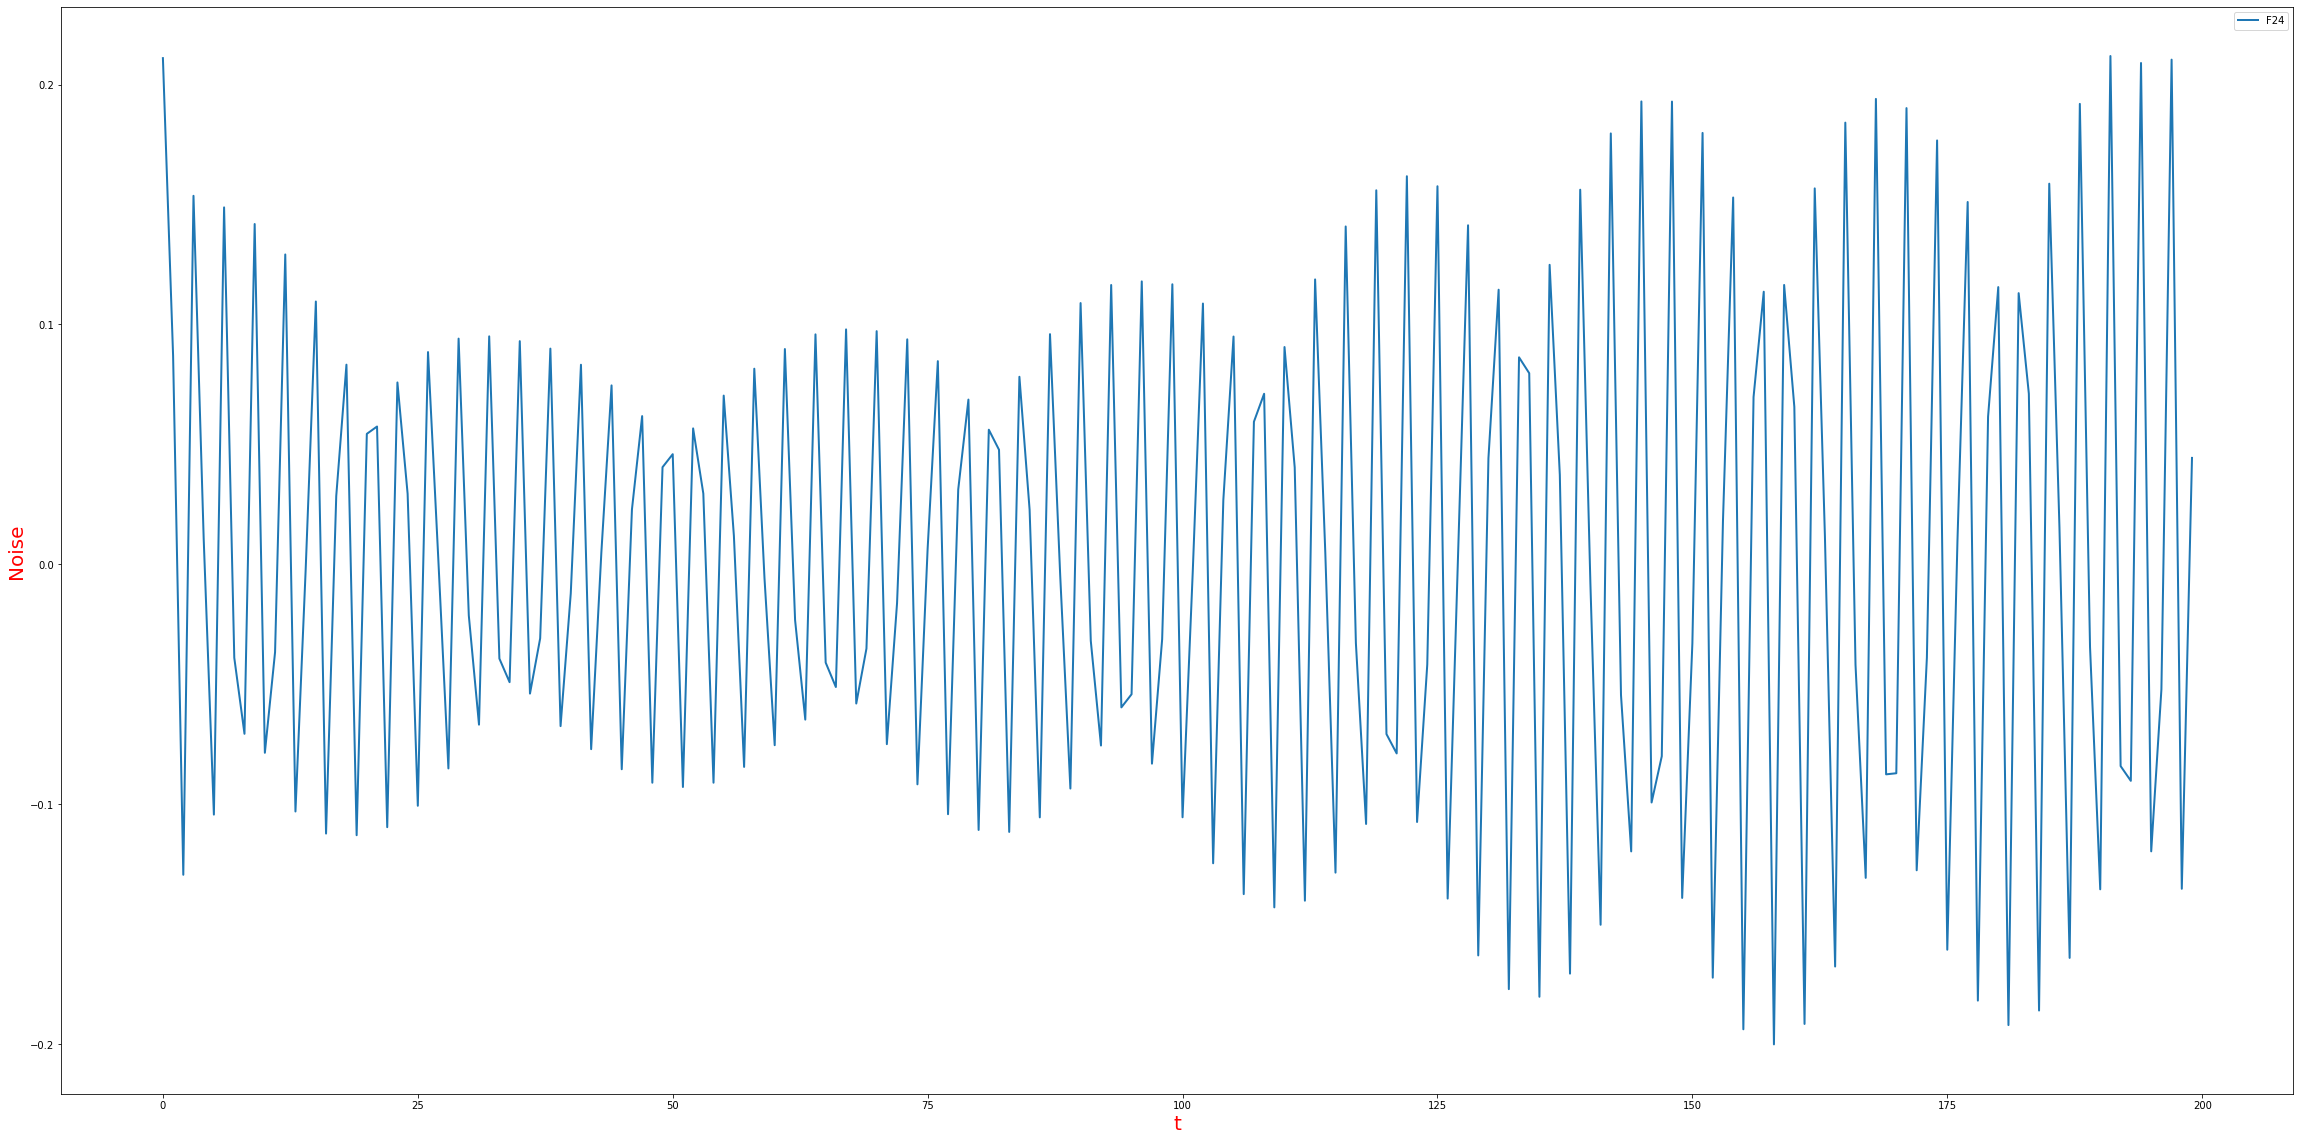

<Figure size 2880x1440 with 0 Axes>

In [ ]:
# plt.figure(figsize= (40,20))
for i in range(len(XB_real)):
    plt.figure(figsize= (40,20))
    m,n = np.shape(XB_real[i])
    F_i = X_to_TS(XB_real[i])
    plt.plot(range(K), F_i, lw=2, label = f'F{i}')
    plt.xlabel("t", fontsize = 20, color = 'r')
    plt.ylabel("Reconstructed component", fontsize = 20, color = 'r')
plt.legend()


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:829: ComplexWarning: Casting complex values to real discards the imaginary part
  y = float(self.convert_yunits(self._y))
/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:691: ComplexWarning: Casting complex values to real discards the imaginary part
  posy = float(textobj.convert_yunits(textobj._y))


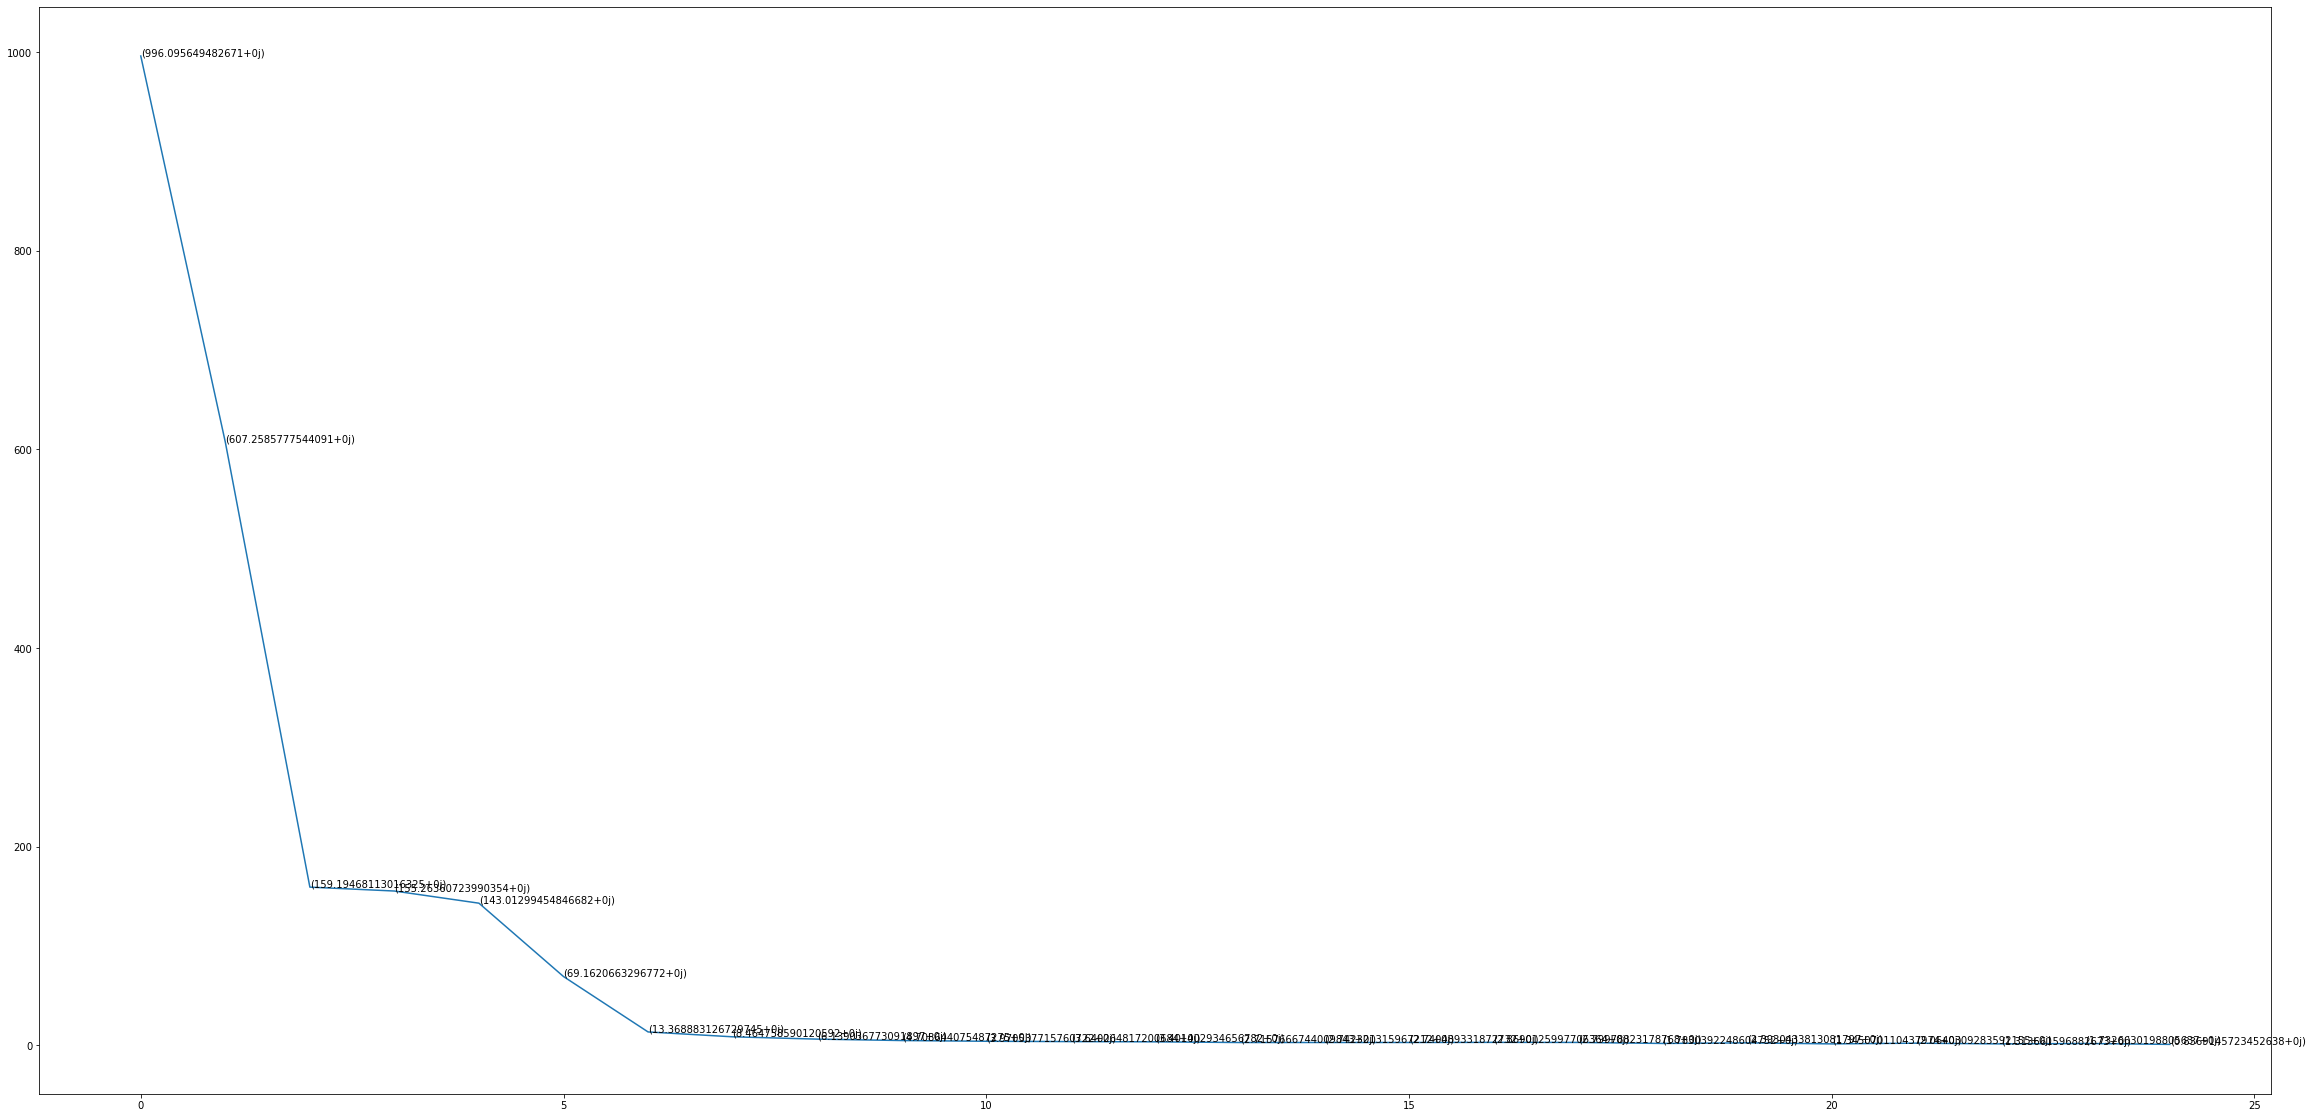

[(996.095649482671+0j),
 (607.2585777544091+0j),
 (159.19468113016325+0j),
 (155.26360723990354+0j),
 (143.01299454846682+0j),
 (69.1620663296772+0j),
 (13.368883126729745+0j),
 (8.464758590120592+0j),
 (6.139036773091897+0j),
 (4.708644075487275+0j),
 (3.970537715760722+0j),
 (3.640264817200684+0j),
 (3.401402934656782+0j),
 (2.7157666744009843+0j),
 (2.742321315967212+0j),
 (2.740489331872732+0j),
 (2.8690125997706364+0j),
 (2.79978823178768+0j),
 (1.7830392248604752+0j),
 (2.3930433813081797+0j),
 (1.345070110437974+0j),
 (2.0640309283592155+0j),
 (1.313661596882673+0j),
 (1.7326630198805637+0j),
 (0.8369145723452638+0j)]

In [ ]:
s = lam1
plt.figure(figsize=(40,20))
plt.plot(s)
for a,b in zip(range(len(s)),s):
    plt.text(a,b,str(b))
plt.show()
lam1

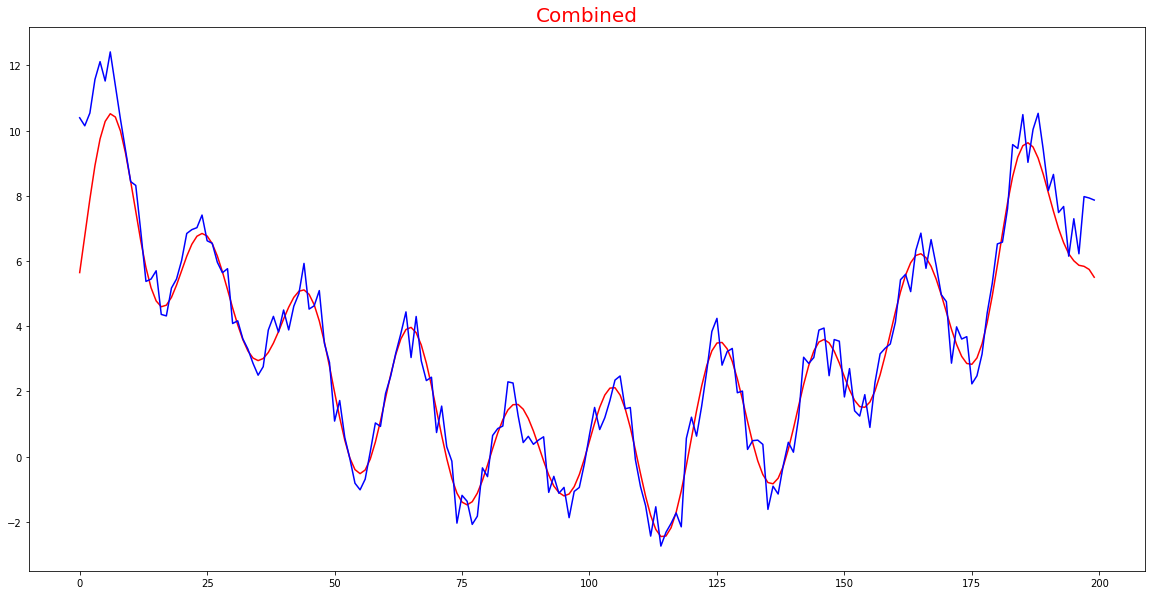

In [ ]:
'''
(0,1)
(2,3)
(4,5)
(6:)
'''
t = range(K)
F_combined = X_to_TS(XB_real[:8].sum(axis=0))
plt.figure(figsize=(20,10))
plt.plot(t, F_combined,color = 'red')
plt.title("Combined", fontsize = 20, color = 'Red')
plt.plot(t,ts, color = 'blue')
plt.show()


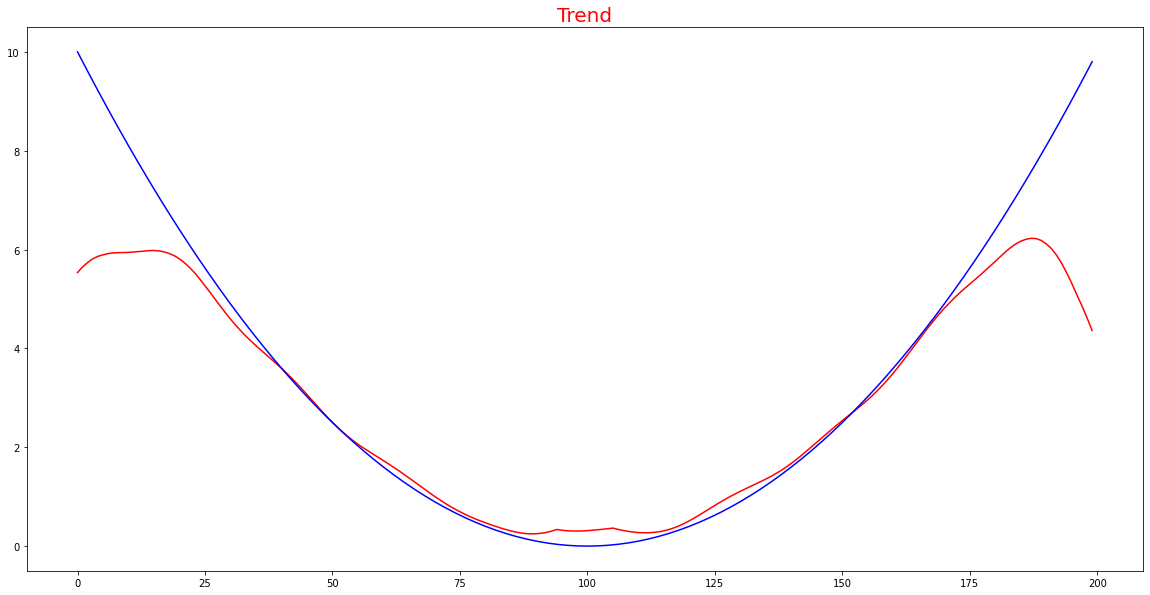

In [ ]:
t = range(K)
F_trend = X_to_TS(XB_real[[0,1,3]].sum(axis=0))
plt.figure(figsize=(20,10))
plt.plot(t, F_trend,color = 'red')
plt.title("Trend", fontsize = 20, color = 'Red')
plt.plot(t,trend, color = 'blue')
plt.show()

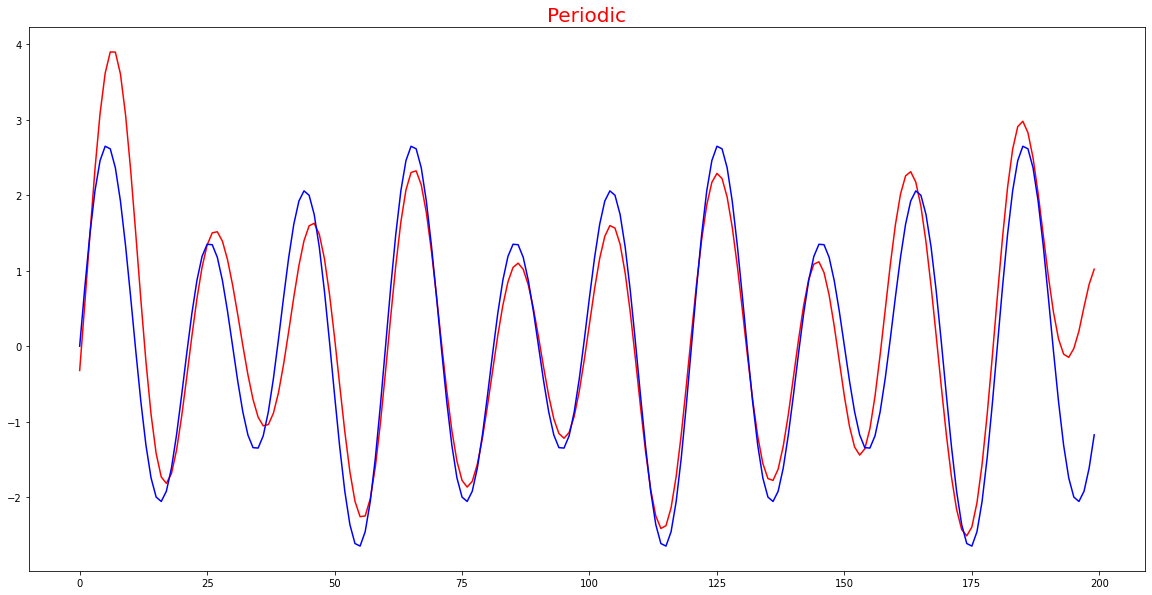

In [ ]:
t = range(K)
F_periodic = X_to_TS(XB_real[[2,4,7]].sum(axis=0))
plt.figure(figsize=(20,10))
plt.plot(t, F_periodic,color = 'red')
plt.title("Periodic", fontsize = 20, color = 'Red')
plt.plot(t,periodic1+periodic2,color = 'blue')
# plt.plot(t,periodic1,color= 'g')
plt.show()